# ***<span style="background-color:LIGHTGRAY; color:#333; padding:10px; text-decoration:underline;">AMAZON BUSINESS AND SALES ANALYTICS</span>***


### ***Let's Begin!!***

- <h3><b>Reading CSV File</h3></b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('C:\\Users\\Jeevika Sharma\\Desktop\\Amazon_sales_analysis\\Amazon-Products.csv')

In [3]:
data.sample(10)

Unnamed: 0                                               name  \
288720       17433  Great Choice Men's Cotton Shorts Boxer Night S...   
272048         761                            Jack & Jones Men Trunks   
417125         614  ACCOX Men's Half Sleeves Formal Regular Fit Co...   
33570          162       Fastrack 50 Ltrs Black Rucksack (A0779NBK01)   
437261        1550      inblu Casual Slipper Flip Flop for Women_WO06   
206073       11197  Avsar 18k (750) Yellow Gold and Diamond Ring f...   
374809         586   Buffway Brown Leather Men's Wallet (BW-WL-VC-BR)   
54637        17965  Little Loin Kids School Bag Soft Plush Backpac...   
465656       17417                   BEET LOOKS Running Shoes for Men   
246513        2725  AC Stand/Heavy Duty Air Conditioner Outdoor Un...   

         main_category                  sub_category  \
288720  men's clothing                     Innerwear   
272048  men's clothing                     Innerwear   
417125  men's clothing                        Shirts   
33570   bags & luggage                     Backpacks   
437261   women's shoes                         Shoes   
206073     accessories      Gold & Diamond Jewellery   
374809          stores                 Men's Fashion   
54637      accessories                Bags & Luggage   
465656     men's shoes                  Sports Shoes   
246513      appliances  Heating & Cooling Appliances   

                                                    image  \
288720  https://m.media-amazon.com/images/W/IMAGERENDE...   
272048  https://m.media-amazon.com/images/I/91KzIHD7Kp...   
417125  https://m.media-amazon.com/images/W/IMAGERENDE...   
33570   https://m.media-amazon.com/images/W/IMAGERENDE...   
437261  https://m.media-amazon.com/images/W/IMAGERENDE...   
206073  https://m.media-amazon.com/images/I/61Xa69c2AF...   
374809  https://m.media-amazon.com/images/I/81O7Z4L8yU...   
54637   https://m.media-amazon.com/images/W/IMAGERENDE...   
465656  https://m.media-amazon.com/images/W/IMAGERENDE...   
246513  https://m.media-amazon.com/images/I/11aetq2-yJ...   

                                                     link ratings  \
288720  https://www.amazon.in/Great-Choice-Cotton-Shor...     NaN   
272048  https://www.amazon.in/Jack-Jones-Regular-Trunk...     2.5   
417125  https://www.amazon.in/ACCOX-Sleeves-Formal-Reg...     3.9   
33570   https://www.amazon.in/Fastrack-Ltrs-Black-Ruck...     4.1   
437261  https://www.amazon.in/inblu-Casual-Slipper-Wom...     4.0   
206073  https://www.amazon.in/Avsar-Yellow-Gold-Diamon...     NaN   
374809  https://www.amazon.in/Minimalist-Pocket-Blocki...     4.6   
54637   https://www.amazon.in/Little-School-Plush-Back...     NaN   
465656  https://www.amazon.in/BEET-LOOKS-Running-Shoes...     NaN   
246513  https://www.amazon.in/Stand-Conditioner-Outdoo...     5.0   

       no_of_ratings discount_price actual_price  
288720           NaN           ₹149         ₹298  
272048             2           ₹400         ₹799  
417125           133           ₹499       ₹1,480  
33570             86      ₹2,429.20       ₹3,999  
437261             6           ₹329         ₹339  
206073           NaN        ₹23,371      ₹59,144  
374809        59,359           ₹389         ₹990  
54637            NaN           ₹229         ₹699  
465656           NaN           ₹499         ₹999  
246513             2           ₹599         ₹999

 - <h3><b>Data Cleaning</b></h3>

In [4]:
data.shape

(551585, 10)

In [5]:
#checking for  duplicates
data.duplicated().sum()

0

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(551585, 10)

In [8]:
data=data.loc[:,['name','main_category','sub_category','ratings','no_of_ratings','discount_price','actual_price']]

In [9]:
data.columns

Index(['name', 'main_category', 'sub_category', 'ratings', 'no_of_ratings',
       'discount_price', 'actual_price'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   ratings         375791 non-null  object
 4   no_of_ratings   375791 non-null  object
 5   discount_price  490422 non-null  object
 6   actual_price    533772 non-null  object
dtypes: object(7)
memory usage: 29.5+ MB


In [11]:

# Apply strip to all cells that are strings
data = data.map(lambda x: x.strip() if isinstance(x, str) else x)



In [12]:
data.shape

(551585, 7)

In [13]:
data.isnull().sum()

name                   0
main_category          0
sub_category           0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [14]:
#calculating %missing data

percent_miss=[]
for col in data.columns:
    percentage=(data[col].isnull().sum()/data.shape[0])*100
    print('{}-  {}%'.format(col,np.round(percentage,4)))

name-  0.0%
main_category-  0.0%
sub_category-  0.0%
ratings-  31.8707%
no_of_ratings-  31.8707%
discount_price-  11.0886%
actual_price-  3.2294%


In [15]:
# since actual_price column has less than 5% null values we can apply complete case analysis

In [16]:
#columns with missing data <5%
cols = [var for var in data.columns if data[var].isnull().mean()*100 < 5 and data[var].isnull().mean()*100 > 0]
cols

['actual_price']

In [17]:
data.dropna(subset=cols, inplace=True)

In [18]:
data.shape

(533772, 7)

In [19]:
data['ratings'].shape

(533772,)

In [20]:
data.dtypes

name              object
main_category     object
sub_category      object
ratings           object
no_of_ratings     object
discount_price    object
actual_price      object
dtype: object

In [21]:
# clearly apart from name, main_catefory, sub_category, rest all columns should be numerical


 - <h3><b>Preprocessing rating column</b></h3>

In [22]:
data['ratings'].value_counts()

ratings
4.0       36004
5.0       32129
3.9       26669
3.8       24935
4.1       24419
3.7       21850
4.2       21349
3.6       19173
3.5       17306
4.3       17281
4.4       13493
3.4       12828
4.5       12235
3.0       11598
3.3       10736
4.6        8101
3.2        8035
1.0        7902
3.1        6416
4.7        5211
Get        4852
2.9        4064
2.0        3059
2.8        2999
2.7        2467
2.5        2385
4.8        2281
2.6        1971
FREE       1357
2.4        1221
2.3         940
2.2         739
2.1         630
4.9         512
1.5         481
1.9         347
1.8         314
1.7         221
1.4         209
1.6         169
1.3          90
1.2          27
₹99          14
₹70           5
₹2.99         2
₹68.99        1
₹65           1
1.1           1
₹100          1
Name: count, dtype: int64

In [23]:
data['ratings'].unique()

array(['4.2', '4.0', '4.1', '4.3', '3.9', '3.8', '3.5', nan, '4.6', '3.3',
       '3.4', '3.7', '2.9', '5.0', '4.4', '3.6', '2.7', '4.5', '3.0',
       '3.1', '3.2', '4.8', '4.7', '2.5', '1.0', '2.6', '2.8', '1.7',
       'Get', '1.8', '2.4', '4.9', '2.2', '1.6', '1.9', '2.3', '2.0',
       '1.4', '2.1', 'FREE', '1.2', '1.3', '1.5', '₹68.99', '₹65', '1.1',
       '₹70', '₹100', '₹99', '₹2.99'], dtype=object)

In [24]:
pd.set_option('display.max_rows',None) 
data['no_of_ratings'].unique()

array(['2,255', '2,948', '1,206', ..., '3,329', '7,141', '4,406'],
      dtype=object)

In [25]:
# we can clearly see this rating column needs to be cleaned
# coulumn having ratings Get, Free, ₹99 ,₹70, ₹2.99,₹68.99,₹65, ₹100  will be filled with rating nan   

In [26]:
data['ratings']=data['ratings'].replace(to_replace=['Get','FREE','₹99','₹70','₹2.99','₹68.99','₹65','₹100'],value=np.nan)

In [27]:
data['ratings'].value_counts()

ratings
4.0    36004
5.0    32129
3.9    26669
3.8    24935
4.1    24419
3.7    21850
4.2    21349
3.6    19173
3.5    17306
4.3    17281
4.4    13493
3.4    12828
4.5    12235
3.0    11598
3.3    10736
4.6     8101
3.2     8035
1.0     7902
3.1     6416
4.7     5211
2.9     4064
2.0     3059
2.8     2999
2.7     2467
2.5     2385
4.8     2281
2.6     1971
2.4     1221
2.3      940
2.2      739
2.1      630
4.9      512
1.5      481
1.9      347
1.8      314
1.7      221
1.4      209
1.6      169
1.3       90
1.2       27
1.1        1
Name: count, dtype: int64

In [28]:
data['ratings']=data['ratings'].astype('float')

In [29]:
data['ratings']=data['ratings'].round(2)


 - <h3><b>Preprocessing main_category column</b></h3>

In [30]:
data['main_category'].value_counts()

main_category
accessories                111171
women's clothing            75812
men's clothing              73778
tv, audio & cameras         66357
men's shoes                 54863
stores                      32335
appliances                  31326
home & kitchen              14473
kids' fashion               13206
sports & fitness            12253
bags & luggage               9982
beauty & health              9908
car & motorbike              6987
toys & baby products         6098
women's shoes                5257
industrial supplies          4010
grocery & gourmet foods      3282
pet supplies                 1619
music                        1038
home, kitchen, pets            17
Name: count, dtype: int64


 - <h3><b>Preprocessing sub_category column</b></h3>

In [31]:
data['sub_category'].value_counts()

sub_category
Men's Fashion                               19044
Clothing                                    19033
Western Wear                                19015
Bags & Luggage                              19000
Lingerie & Nightwear                        18995
Innerwear                                   18917
Fashion & Silver Jewellery                  18886
Jewellery                                   18827
Handbags & Clutches                         18796
Ethnic Wear                                 18769
T-shirts & Polos                            18742
Watches                                     18680
Sports Shoes                                18482
Casual Shoes                                18385
Shirts                                      18337
Formal Shoes                                17996
Jeans                                       17782
Gold & Diamond Jewellery                    15743
All Electronics                              9530
Kitchen & Home Appliances            

In [32]:
# Adjust display options
pd.set_option('display.max_rows', None)  # Show all rows for value_counts()

# View all value counts for 'no_of_ratings'
print(data['sub_category'].value_counts())

sub_category
Men's Fashion                               19044
Clothing                                    19033
Western Wear                                19015
Bags & Luggage                              19000
Lingerie & Nightwear                        18995
Innerwear                                   18917
Fashion & Silver Jewellery                  18886
Jewellery                                   18827
Handbags & Clutches                         18796
Ethnic Wear                                 18769
T-shirts & Polos                            18742
Watches                                     18680
Sports Shoes                                18482
Casual Shoes                                18385
Shirts                                      18337
Formal Shoes                                17996
Jeans                                       17782
Gold & Diamond Jewellery                    15743
All Electronics                              9530
Kitchen & Home Appliances            

In [33]:
# Clean and normalize the subcategory column
data['sub_category'] = data['sub_category'].str.strip().str.lower()

In [34]:
data['sub_category'].nunique()

112

In [35]:
# we have so many subcategory so we are grouping this

In [36]:
counts=data['sub_category'].value_counts()
uncommon_category=counts[counts<1300].index
data['sub_category'] = np.where(data['sub_category'].isin(uncommon_category), 'uncommon mix category', data['sub_category'])


In [37]:
data['sub_category'] = np.where(data['sub_category'].str.contains('shoe|sandals|ballerinas|foot'), 'footwear', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('bag|backpack|sack'), 'bags', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('nightwear|lingerie|innerwear'), 'Innerwear', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('nightwear|camping|strength|lingerie|running|sports|football|cricket|badminton|fitness|diet|cycling|yoga'), 'Sports', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('toy|pram'), 'toys', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('speakers|headphones|appliances|televisions|system|electronics|camera|refrigerators|washing|machines|theater|air conditioners'), 'Electronics', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('home|kitchen|room|dine|house|indoor|furniture|sewing'), 'Home and Kitchen', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('kid|baby|diaper'), 'Kids', data['sub_category'])
data['sub_category'] = np.where(data['sub_category'].str.contains('beauty|make-up|personal care'), 'Cosmetics', data['sub_category'])

In [38]:
data['sub_category'].value_counts()

sub_category
Electronics                   94946
footwear                      60911
uncommon mix category         55701
bags                          44080
Innerwear                     37912
men's fashion                 19044
clothing                      19033
western wear                  19015
fashion & silver jewellery    18886
jewellery                     18827
ethnic wear                   18769
t-shirts & polos              18742
watches                       18680
shirts                        18337
jeans                         17782
gold & diamond jewellery      15743
Kids                           8930
Sports                         7115
Home and Kitchen               6007
Cosmetics                      2609
amazon fashion                 2341
women's fashion                2101
wallets                        1975
travel accessories             1802
the designer boutique          1690
test, measure & inspect        1403
car accessories                1391
Name: count, dt

In [39]:
data['sub_category'].nunique()

27

 - <h3><b>Preprocessing no_of_rating column</b></h3>

In [40]:
# Adjust display options
pd.set_option('display.max_rows', None)  # Show all rows for value_counts()

# View all value counts for 'no_of_ratings'
print(data['no_of_ratings'].sort_values(ascending=True).value_counts())

no_of_ratings
1                                                 38876
2                                                 24246
3                                                 17730
4                                                 14102
5                                                 11399
6                                                  9715
7                                                  8432
8                                                  7333
9                                                  6411
10                                                 5794
11                                                 5332
12                                                 4698
13                                                 4356
14                                                 3999
15                                                 3779
16                                                 3567
FREE Delivery by Amazon                            3296
17                                

In [41]:
#  Remove Commas
data['no_of_ratings'] = data['no_of_ratings'].str.replace(',', '', regex=False)

#removing invalid strings that are coming in between
data['no_of_ratings']=pd.to_numeric(data['no_of_ratings'],errors='coerce')

In [42]:
data['no_of_ratings'].skew()

33.70784021727613

In [43]:
# you can see that data is highly positively skewed

In [44]:
#data['no_of_ratings']=data['no_of_ratings'].astype('float')

 - <h3><b>Preprocessing discount price and actual price column</b></h3>

In [45]:
data['discount_price'].value_counts()

discount_price
₹499            18248
₹299            15337
₹399            14510
₹999            13000
₹599            11760
₹699             9173
₹349             7991
₹199             7355
₹799             7156
₹249             7072
₹449             6768
₹899             5881
₹549             4228
₹649             3932
₹1,499           3690
₹1,299           3412
₹1,199           3161
₹749             3065
₹2,999           3000
₹949             2751
₹1,999           2725
₹849             2703
₹379             2487
₹1,399           2465
₹279             2409
₹1,099           2240
₹329             2043
₹1,599           2027
₹149             2014
₹269             1972
₹359             1806
₹1,799           1744
₹289             1730
₹479             1676
₹2,499           1606
₹229             1594
₹389             1582
₹189             1535
₹369             1530
₹1,699           1506
₹339             1423
₹429             1419
₹489             1396
₹319             1372
₹219             

In [46]:
data['actual_price'].value_counts()

actual_price
₹999               48774
₹1,999             25795
₹1,499             18809
₹499               14406
₹1,299             14068
₹2,999             13835
₹799               13162
₹599               12996
₹1,599             12851
₹699               11000
₹2,499             10202
₹899                9931
₹4,999              8355
₹3,999              7621
₹1,199              7463
₹399                6645
₹1,699              5751
₹1,799              5303
₹2,599              5049
₹2,299              4535
₹2,199              4414
₹1,399              4351
₹1,099              4290
₹1,899              4205
₹299                3856
₹3,499              3620
₹5,999              3444
₹2,799              3106
₹6,999              2513
₹2,399              2406
₹1,500              2230
₹3,299              2087
₹4,499              2030
₹1,200              1969
₹2,699              1939
₹990                1883
₹1,000              1869
₹3,599              1847
₹2,000              1817
₹500        

In [47]:
#note the ₹ and , in both cols 

In [48]:
for col in ['actual_price','discount_price']:
    data[col]=data[col].str[1:]
    data[col]=data[col].str.replace(',','',regex=False)
    data[col]=data[col].astype('float')
    

In [49]:
data.dtypes

name               object
main_category      object
sub_category       object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object


##  <b>Let's explore each column one by one for further processing.</b>
#### <b>We'll see columns before and after imputation </b>

In [50]:
#%missing data before imputation

percent_miss=[]
for col in data.columns:
    percentage=(data[col].isnull().sum()/data.shape[0])*100
    print('{}-  {}%'.format(col,np.round(percentage,4)))

name-  0.0%
main_category-  0.0%
sub_category-  0.0%
ratings-  32.0315%
no_of_ratings-  32.0315%
discount_price-  8.1214%
actual_price-  0.0%


In [51]:
data.replace(['', 'NaN','None', 'missing'], np.nan, inplace=True)

In [52]:
# Reset the index
data = data.reset_index()

In [53]:
from scipy import stats

#### Creating Important Functions For Analysis

In [54]:
def col_analysis(data,column):
    print(f"{column} statistics:\n", np.round(data[column].describe(),2))
    print("-"*50)
    
    plt.figure(figsize=(12,10))
    
    plt.subplot(2,2,1)
    sns.kdeplot(data[column])
    plt.title(f"{column} ")
    
    plt.subplot(2,2,2)
    sns.kdeplot(data[column].notna())
    plt.title(f"{column} (non null)")

    
    plt.subplot(2,2,3)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"qqplot of {column}")
    plt.show()

In [55]:

def col_analysis_before_after_imputation(data,column,data_imputed,col):
    print(f"{column} statistics before imputation:\n", np.round(data[column].describe(),2))

    print(f"{col} statistics after imputation:\n", np.round(data_imputed[col].describe(),2))
    print("-"*50)
    
    print(f"{column} skewness before imputation:\n", np.round(data[column].skew(),2))

    print(f"{col} skewness after imputation:\n", np.round(data_imputed[col].skew(),2))
    print("-"*50)

    
    plt.figure(figsize=(24,18))
    
    plt.subplot(2,2,1)
    sns.kdeplot(data[column])
    plt.title(f"{column} before imputation ")

    
    plt.subplot(2,2,2)
    sns.kdeplot(data_imputed[col])
    plt.title(f"{column} after imputation")

    plt.subplot(2,2,3)
    stats.probplot(data[column], dist="norm", plot=plt)
    plt.title(f"qqplot of {column} before imputation")


    plt.subplot(2,2,4)
    stats.probplot(data_imputed[col], dist="norm", plot=plt)
    plt.title(f"qqplot of {column} after imputation")
    plt.show()

In [56]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,SimpleImputer

def apply_all_strategies(data, column,data_imputed):

    
    print("\n\n\n\n\n","--"*20,"1) APPLYING ITERATIVE IMPUTER","--"*20,"\n\n\n\n\n")
    data = data.reset_index()
    imputer = IterativeImputer(max_iter=20, random_state=0)
    # Fit and transform the data and flatten the result
    imputed_data = imputer.fit_transform(data[[column]]).flatten()
    data_imputed[f'{column}_itr_repl'] = imputed_data
    col_analysis_before_after_imputation(data, column, data_imputed, f'{column}_itr_repl')

    
    
    print("\n\n\n\n\n","--"*25,"2a)  FILLING BY MEAN(SIMPLE IMPUTER METHOD)","--"*25,"\n\n\n\n\n")
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_mean.fit(data[[column]])
    print("Mean is", imputer_mean.statistics_[0])
    data_imputed[f'{column}_SI_mean_repl'] = imputer_mean.transform(data[[column]]).flatten()
    col_analysis_before_after_imputation(data, column, data_imputed, f'{column}_SI_mean_repl')

    
    print("\n\n\n\n\n","--"*25,"2b) FILLING BY MEAN(fillna METHOD)","--"*25,"\n\n\n\n\n")

    data_imputed[f'{column}_mean_repl']=data[column].fillna(np.mean(data[column]))
    col_analysis_before_after_imputation(data,column,data_imputed,f'{column}_mean_repl')


    
    print("\n\n\n\n\n","--"*25,"3a) FILLING BY MEDIAN (SIMPLE IMPUTER METHOD)","--"*25,"\n\n\n\n\n")

    imputer_median = SimpleImputer(strategy='median')
    imputer_median.fit(data[[column]])
    print("Median is", imputer_median.statistics_[0])
    data_imputed[f'{column}_SI_median_repl'] = imputer_median.transform(data[[column]]).flatten()
    col_analysis_before_after_imputation(data, column, data_imputed, f'{column}_SI_median_repl')

    print("\n\n\n\n\n","--"*25,"3b) FILLING BY MEDIAN (fillna METHOD)","--"*25,"\n\n\n\n\n")
   
    data_imputed[f'{column}_median_repl']=data[column].fillna(np.nanmedian(data[column]))
    col_analysis_before_after_imputation(data,column,data_imputed,f'{column}_median_repl')


    print("\n\n\n\n\n","--"*20,"4) FORWARD FILLING METHOD","--"*20,"\n\n\n\n\n")

    data_imputed[f'{column}_ffill_repl'] = data[column].ffill()
    col_analysis_before_after_imputation(data, column, data_imputed, f'{column}_ffill_repl')



    
    print("\n\n\n\n\n","--"*20,"5) BACKWARD FILLING METHOD","--"*20,"\n\n\n\n\n")

    data_imputed[f'{column}_bfill_repl'] = data[column].bfill()
    col_analysis_before_after_imputation(data, column, data_imputed, f'{column}_bfill_repl')



In [57]:
data_imputed=pd.DataFrame()

## <i> Now, let's handle null values by univariate approach. 
## We'll apply different strategies on each column one by one and will see which strategy will bring least change in statistics. </i>

>
### We'll find missing strategy for ratings column 

#### -> Before Imputation

ratings statistics:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
--------------------------------------------------


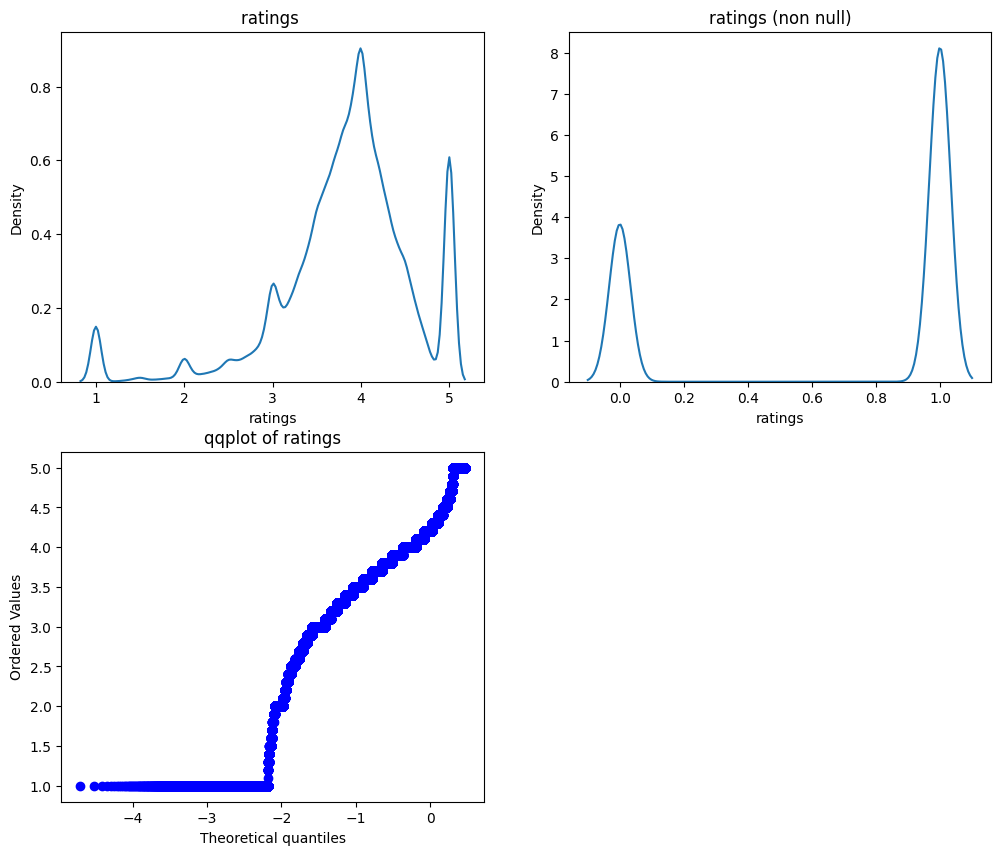

In [58]:
col_analysis(data,'ratings')

#### -> After Imputation






 ---------------------------------------- 1) APPLYING ITERATIVE IMPUTER ---------------------------------------- 





ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_itr_repl statistics after imputation:
 count    533772.00
mean          3.83
std           0.62
min           1.00
25%           3.70
50%           3.83
75%           4.10
max           5.00
Name: ratings_itr_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_itr_repl skewness after imputation:
 -1.52
--------------------------------------------------


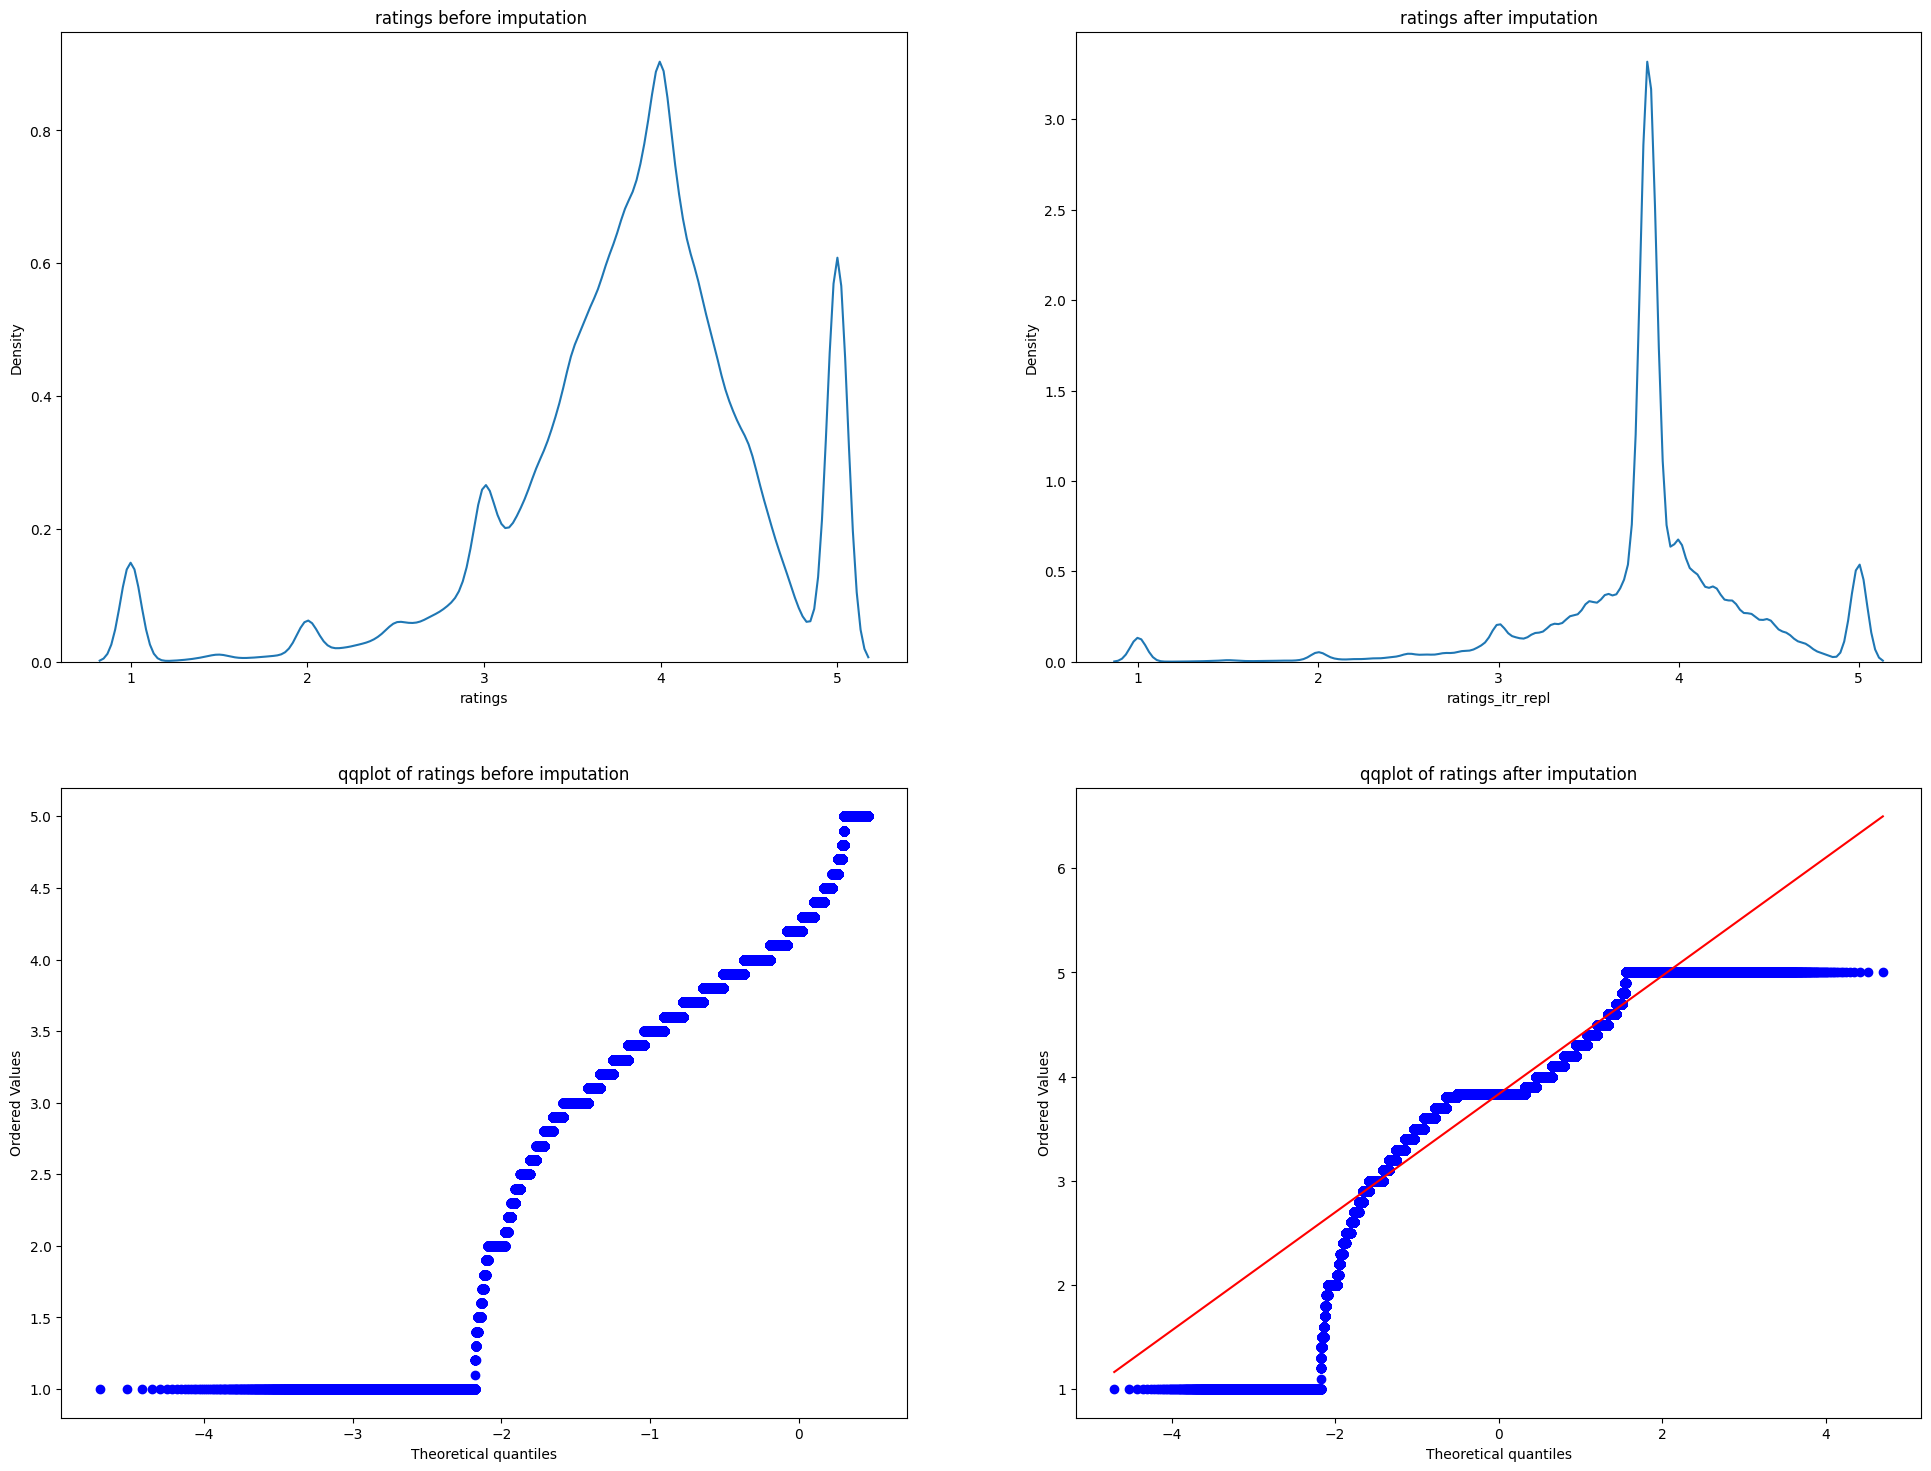






 -------------------------------------------------- 2a)  FILLING BY MEAN(SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Mean is 3.831512664106924
ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_SI_mean_repl statistics after imputation:
 count    533772.00
mean          3.83
std           0.62
min           1.00
25%           3.70
50%           3.83
75%           4.10
max           5.00
Name: ratings_SI_mean_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_SI_mean_repl skewness after imputation:
 -1.52
--------------------------------------------------


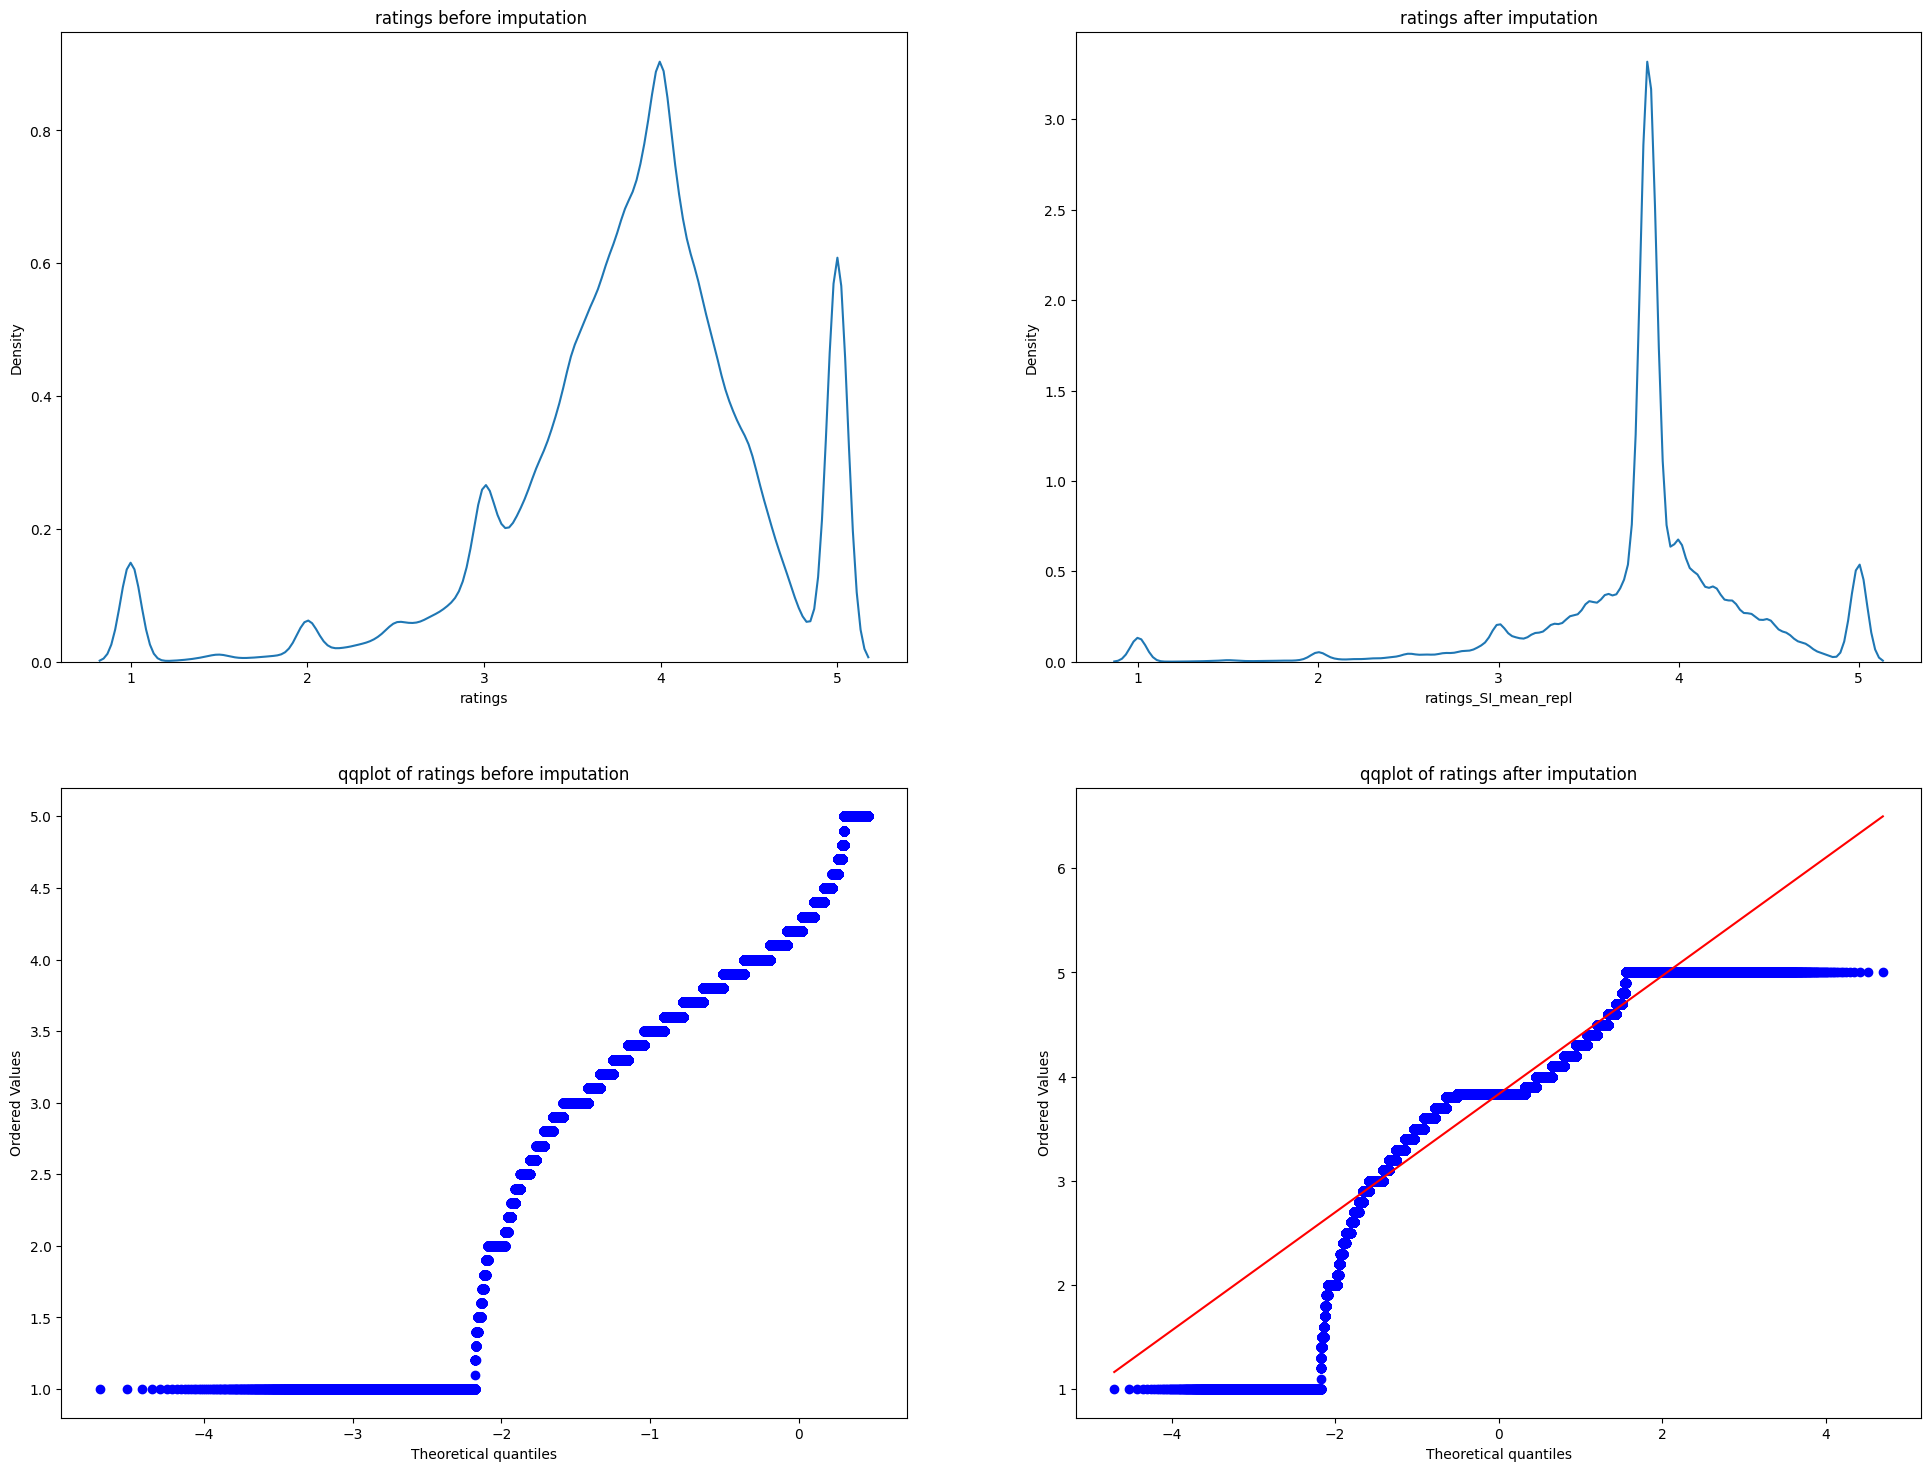






 -------------------------------------------------- 2b) FILLING BY MEAN(fillna METHOD) -------------------------------------------------- 





ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_mean_repl statistics after imputation:
 count    533772.00
mean          3.83
std           0.62
min           1.00
25%           3.70
50%           3.83
75%           4.10
max           5.00
Name: ratings_mean_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_mean_repl skewness after imputation:
 -1.52
--------------------------------------------------


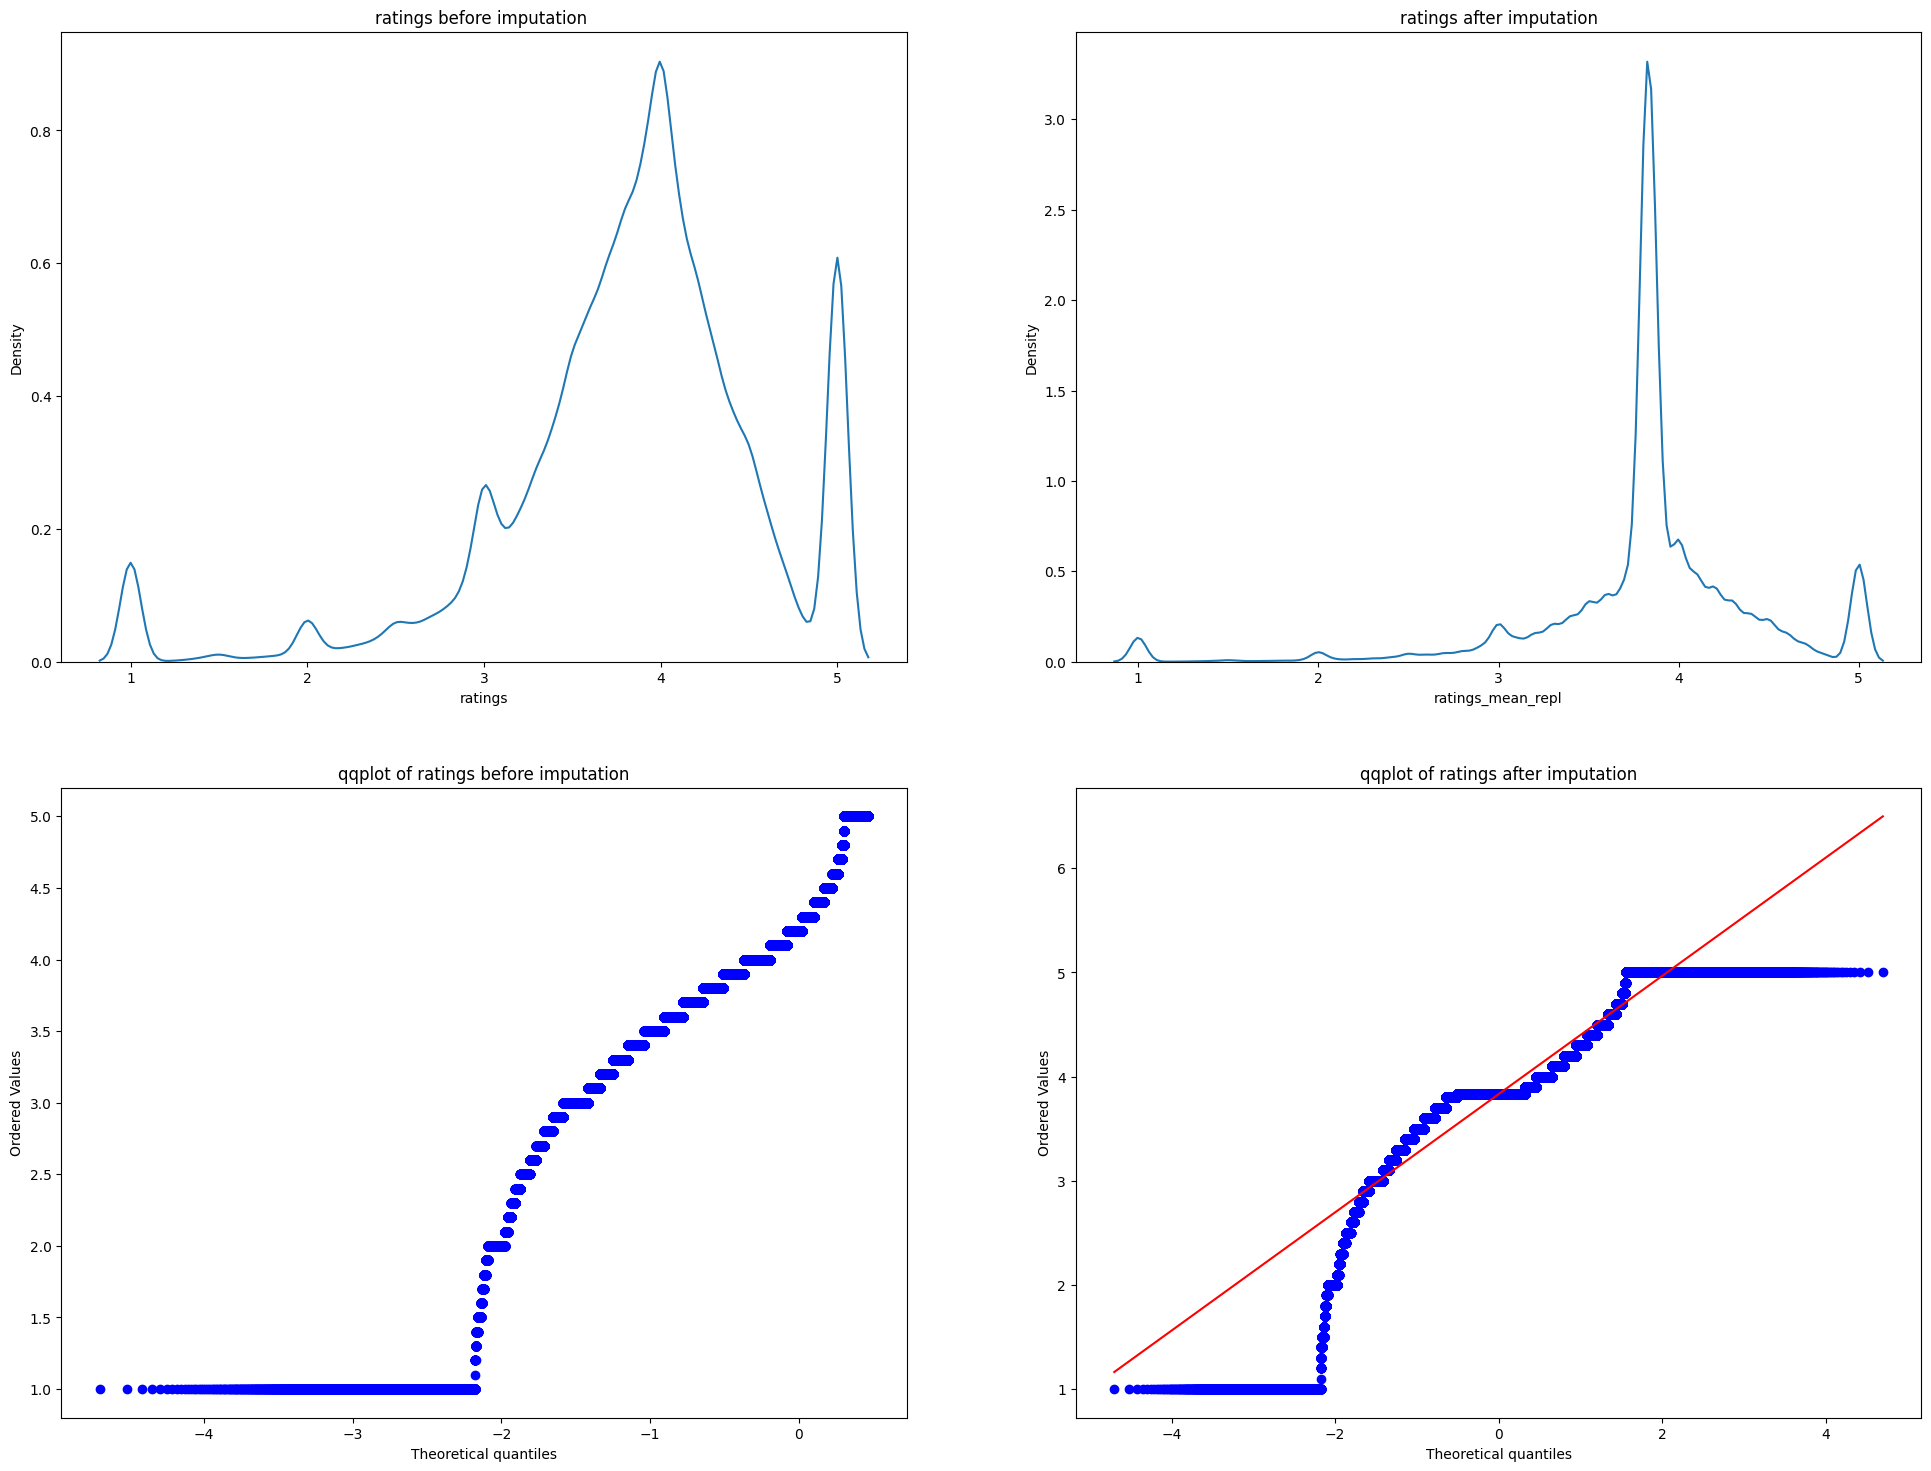






 -------------------------------------------------- 3a) FILLING BY MEDIAN (SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Median is 3.9
ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_SI_median_repl statistics after imputation:
 count    533772.00
mean          3.85
std           0.62
min           1.00
25%           3.70
50%           3.90
75%           4.10
max           5.00
Name: ratings_SI_median_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_SI_median_repl skewness after imputation:
 -1.62
--------------------------------------------------


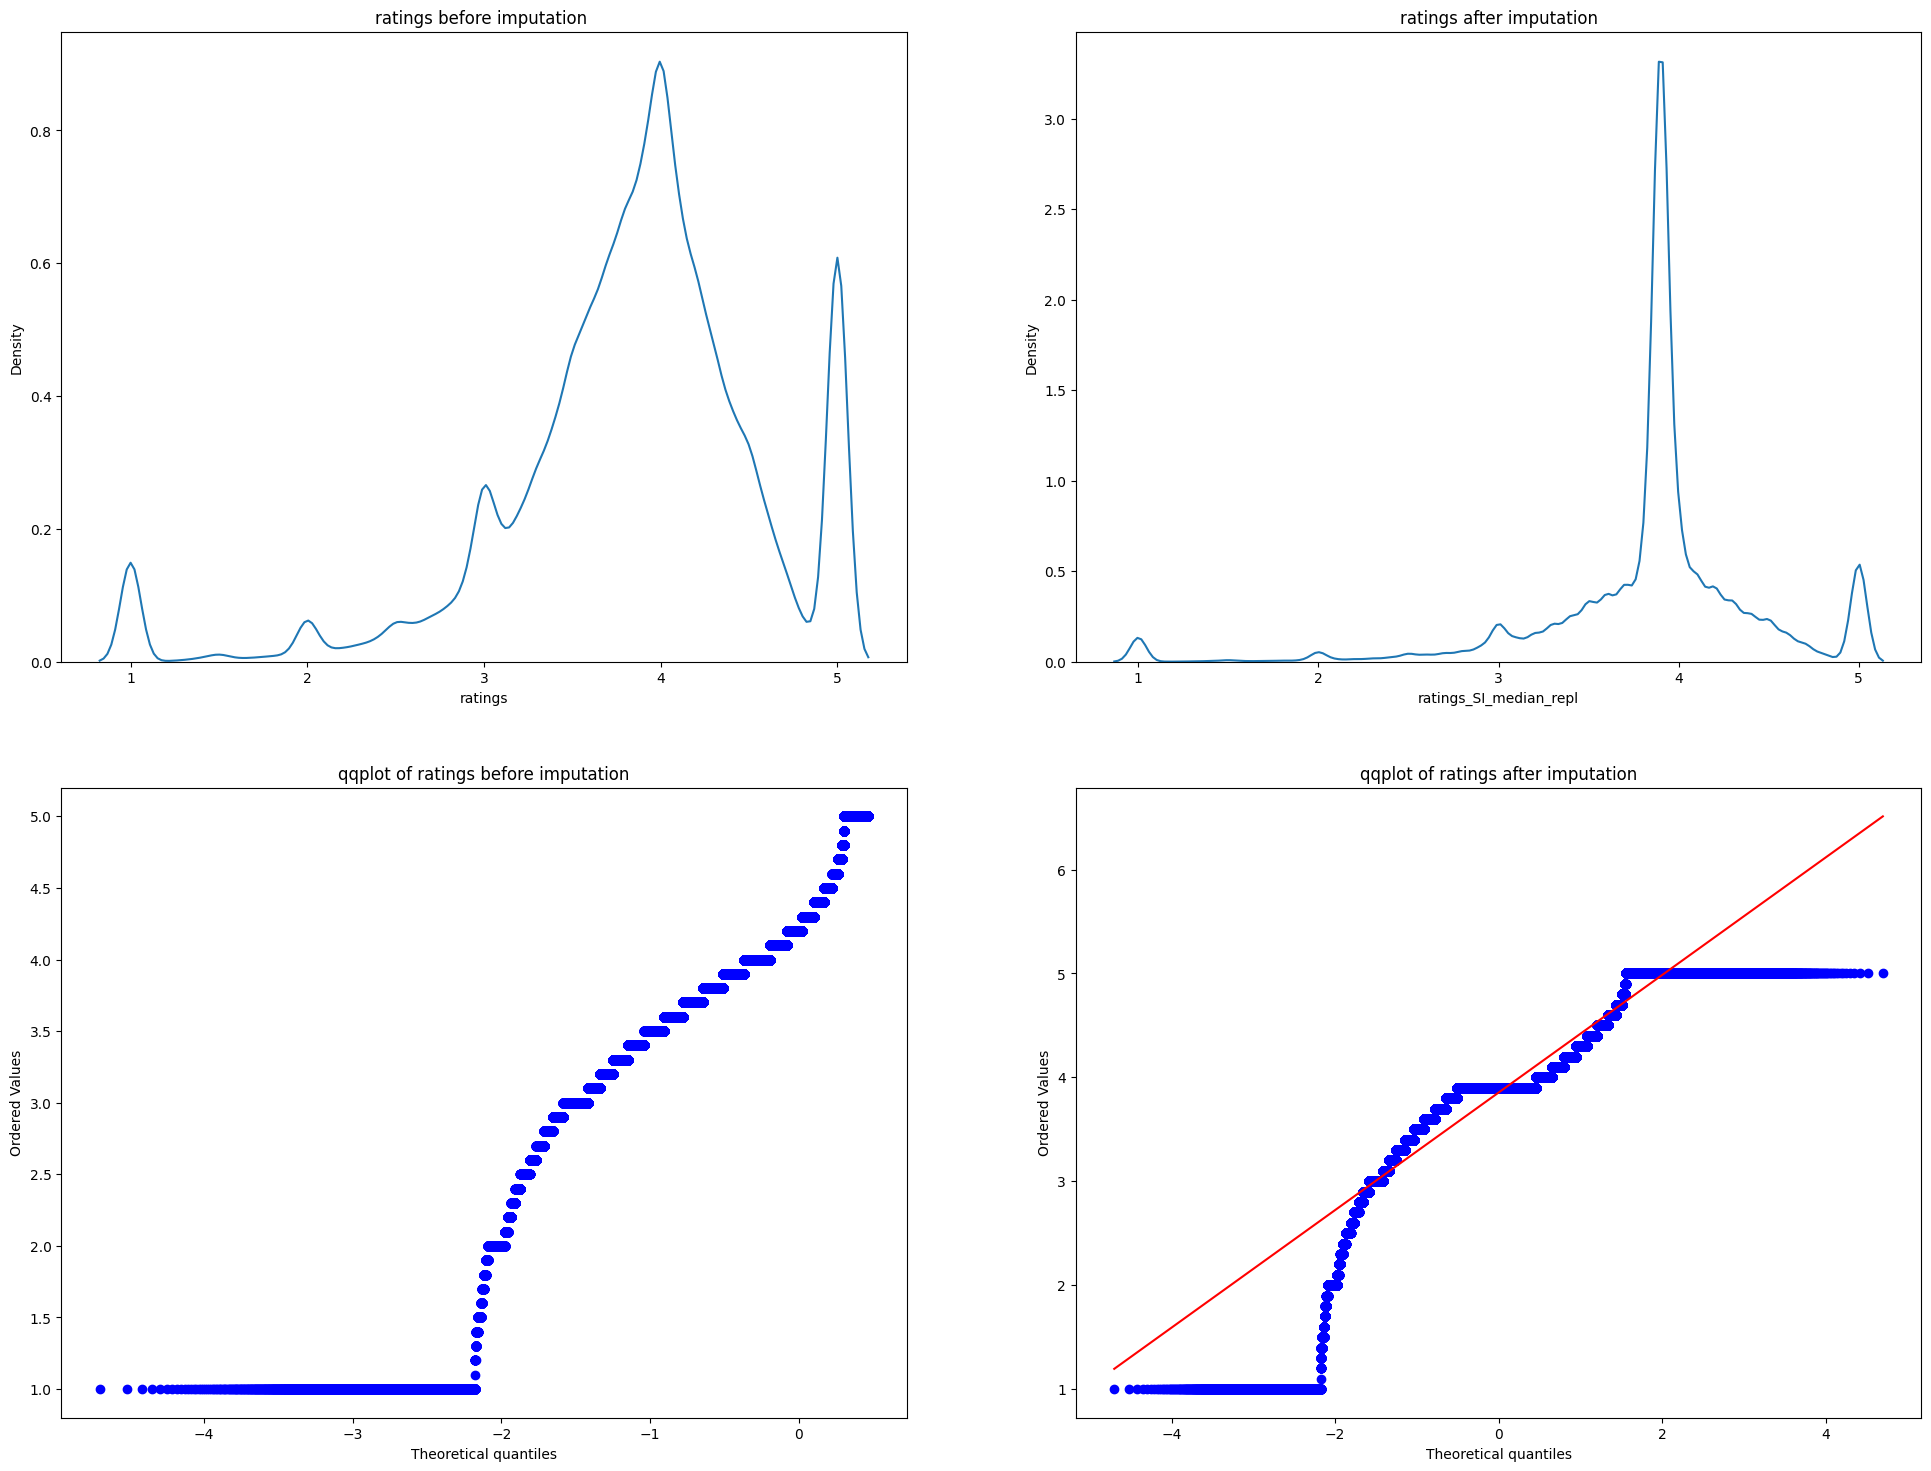






 -------------------------------------------------- 3b) FILLING BY MEDIAN (fillna METHOD) -------------------------------------------------- 





ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_median_repl statistics after imputation:
 count    533772.00
mean          3.85
std           0.62
min           1.00
25%           3.70
50%           3.90
75%           4.10
max           5.00
Name: ratings_median_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_median_repl skewness after imputation:
 -1.62
--------------------------------------------------


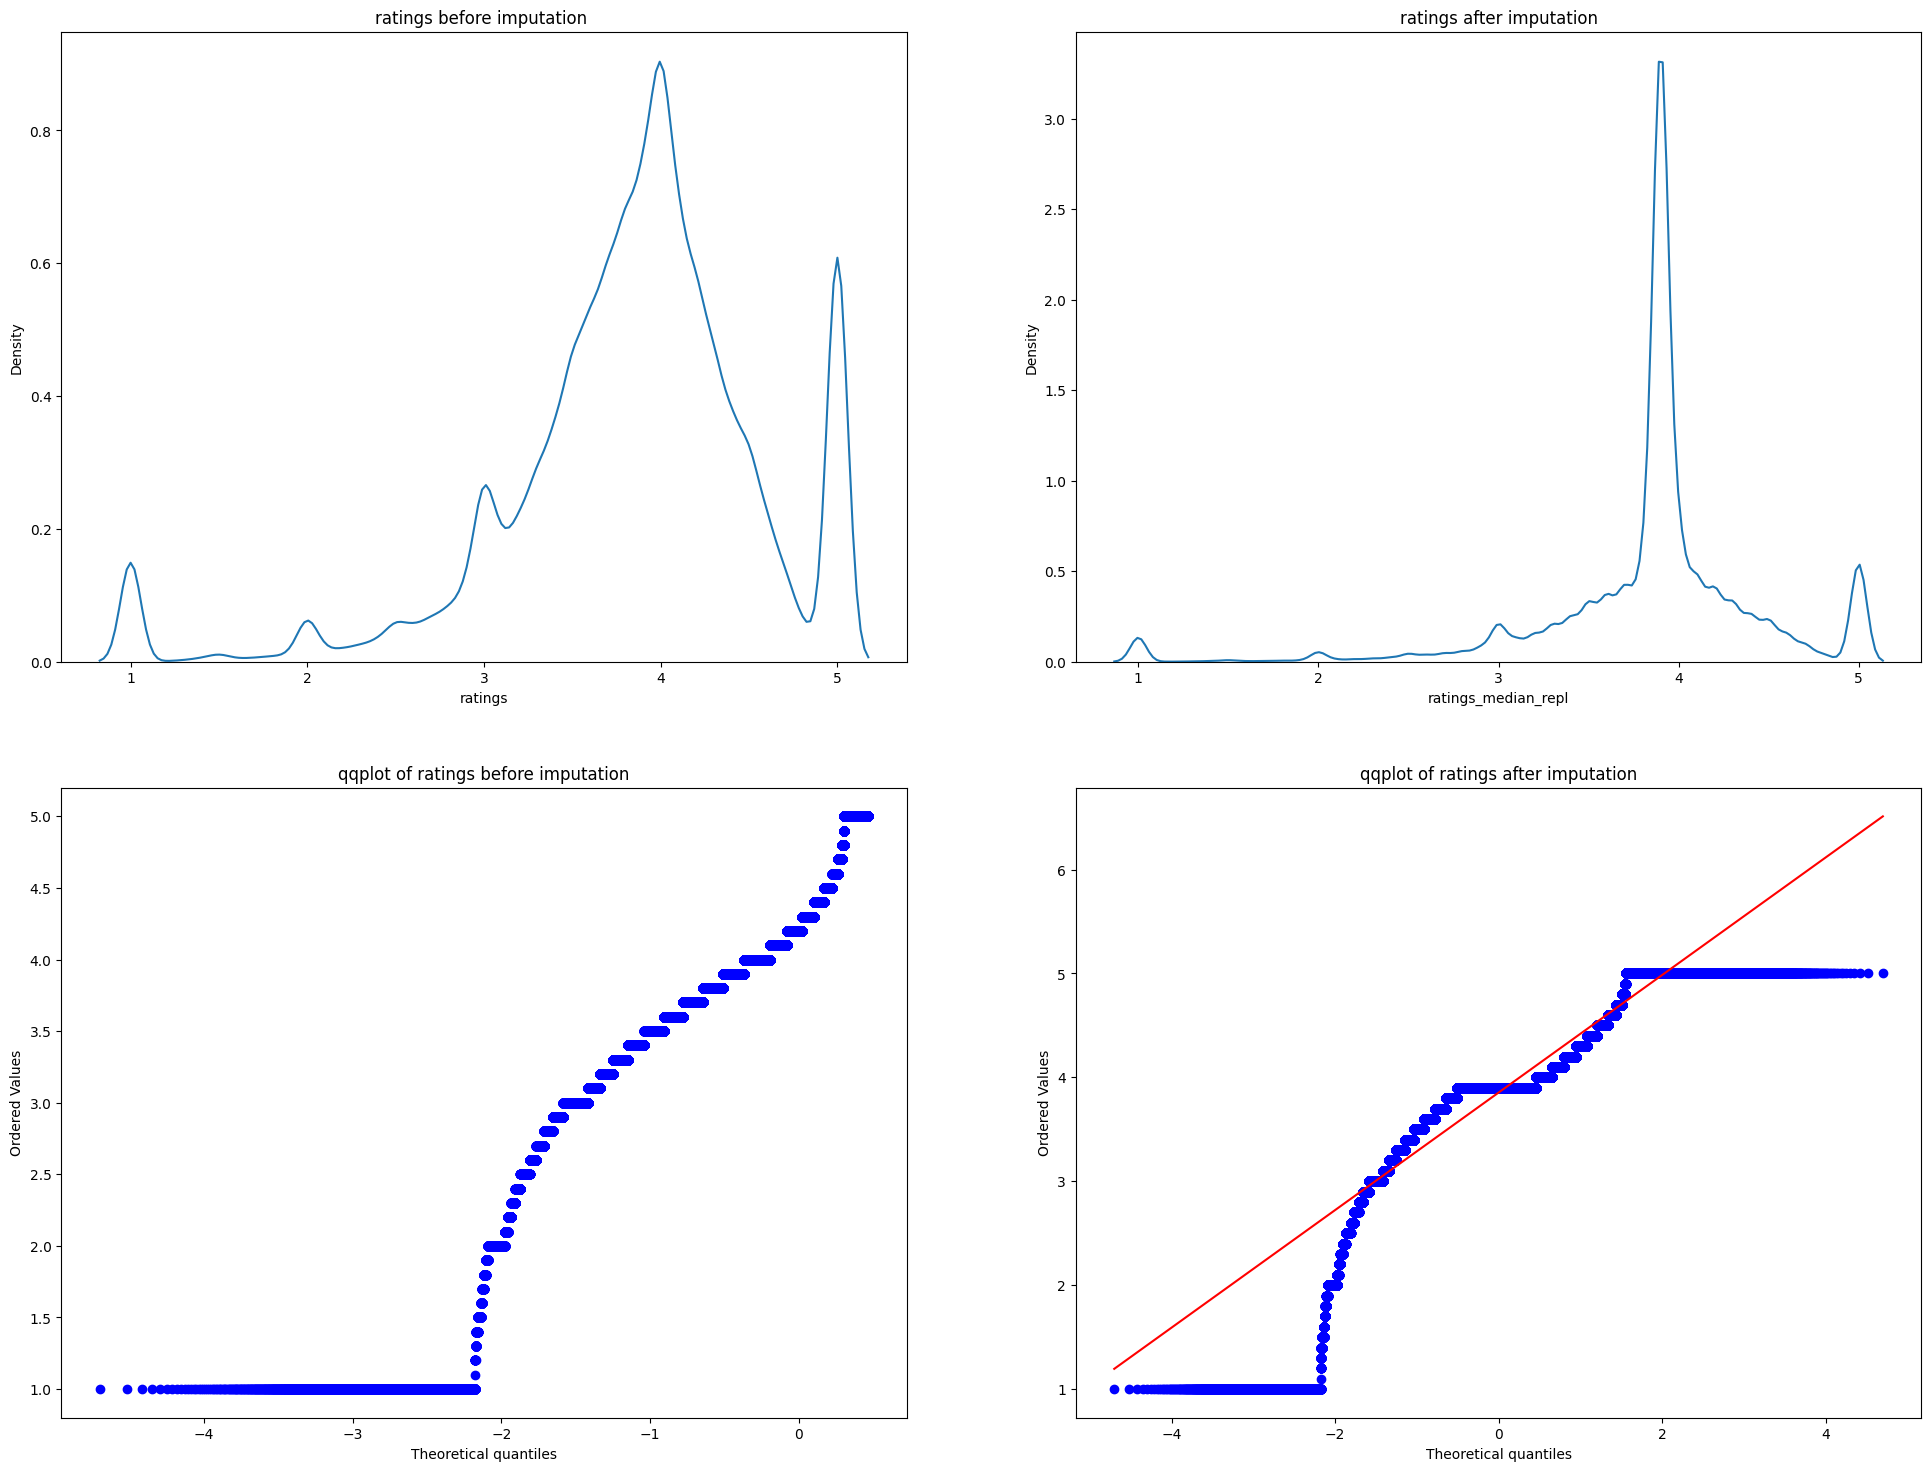






 ---------------------------------------- 4) FORWARD FILLING METHOD ---------------------------------------- 





ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_ffill_repl statistics after imputation:
 count    533772.00
mean          3.83
std           0.89
min           1.00
25%           3.50
50%           4.00
75%           4.40
max           5.00
Name: ratings_ffill_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_ffill_repl skewness after imputation:
 -1.24
--------------------------------------------------


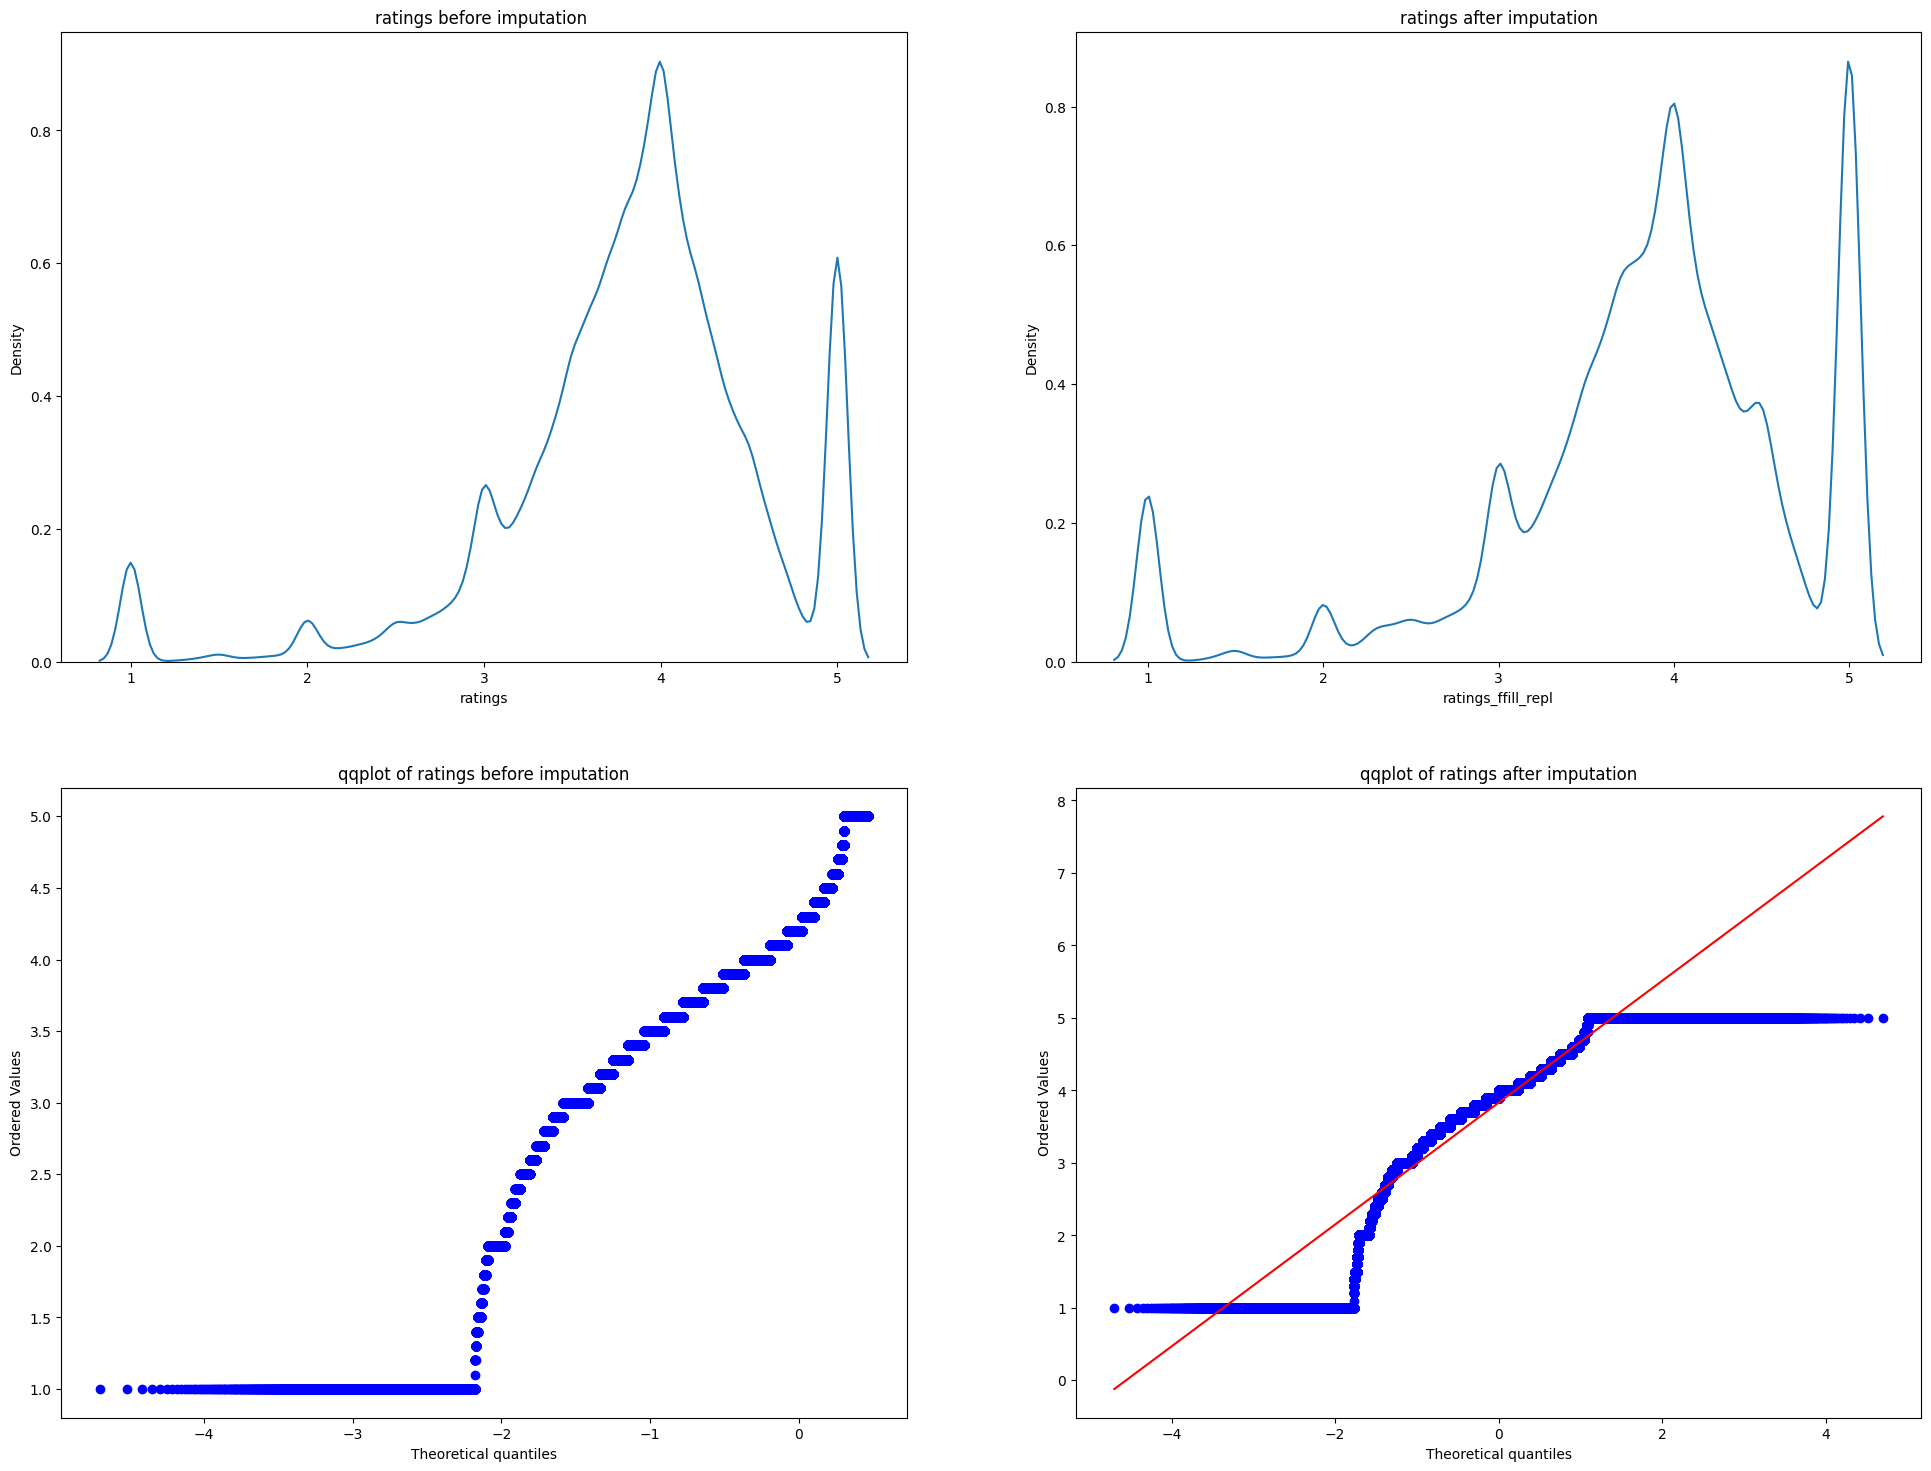






 ---------------------------------------- 5) BACKWARD FILLING METHOD ---------------------------------------- 





ratings statistics before imputation:
 count    362797.00
mean          3.83
std           0.75
min           1.00
25%           3.50
50%           3.90
75%           4.30
max           5.00
Name: ratings, dtype: float64
ratings_bfill_repl statistics after imputation:
 count    533772.00
mean          3.82
std           0.91
min           1.00
25%           3.50
50%           4.00
75%           4.40
max           5.00
Name: ratings_bfill_repl, dtype: float64
--------------------------------------------------
ratings skewness before imputation:
 -1.25
ratings_bfill_repl skewness after imputation:
 -1.23
--------------------------------------------------


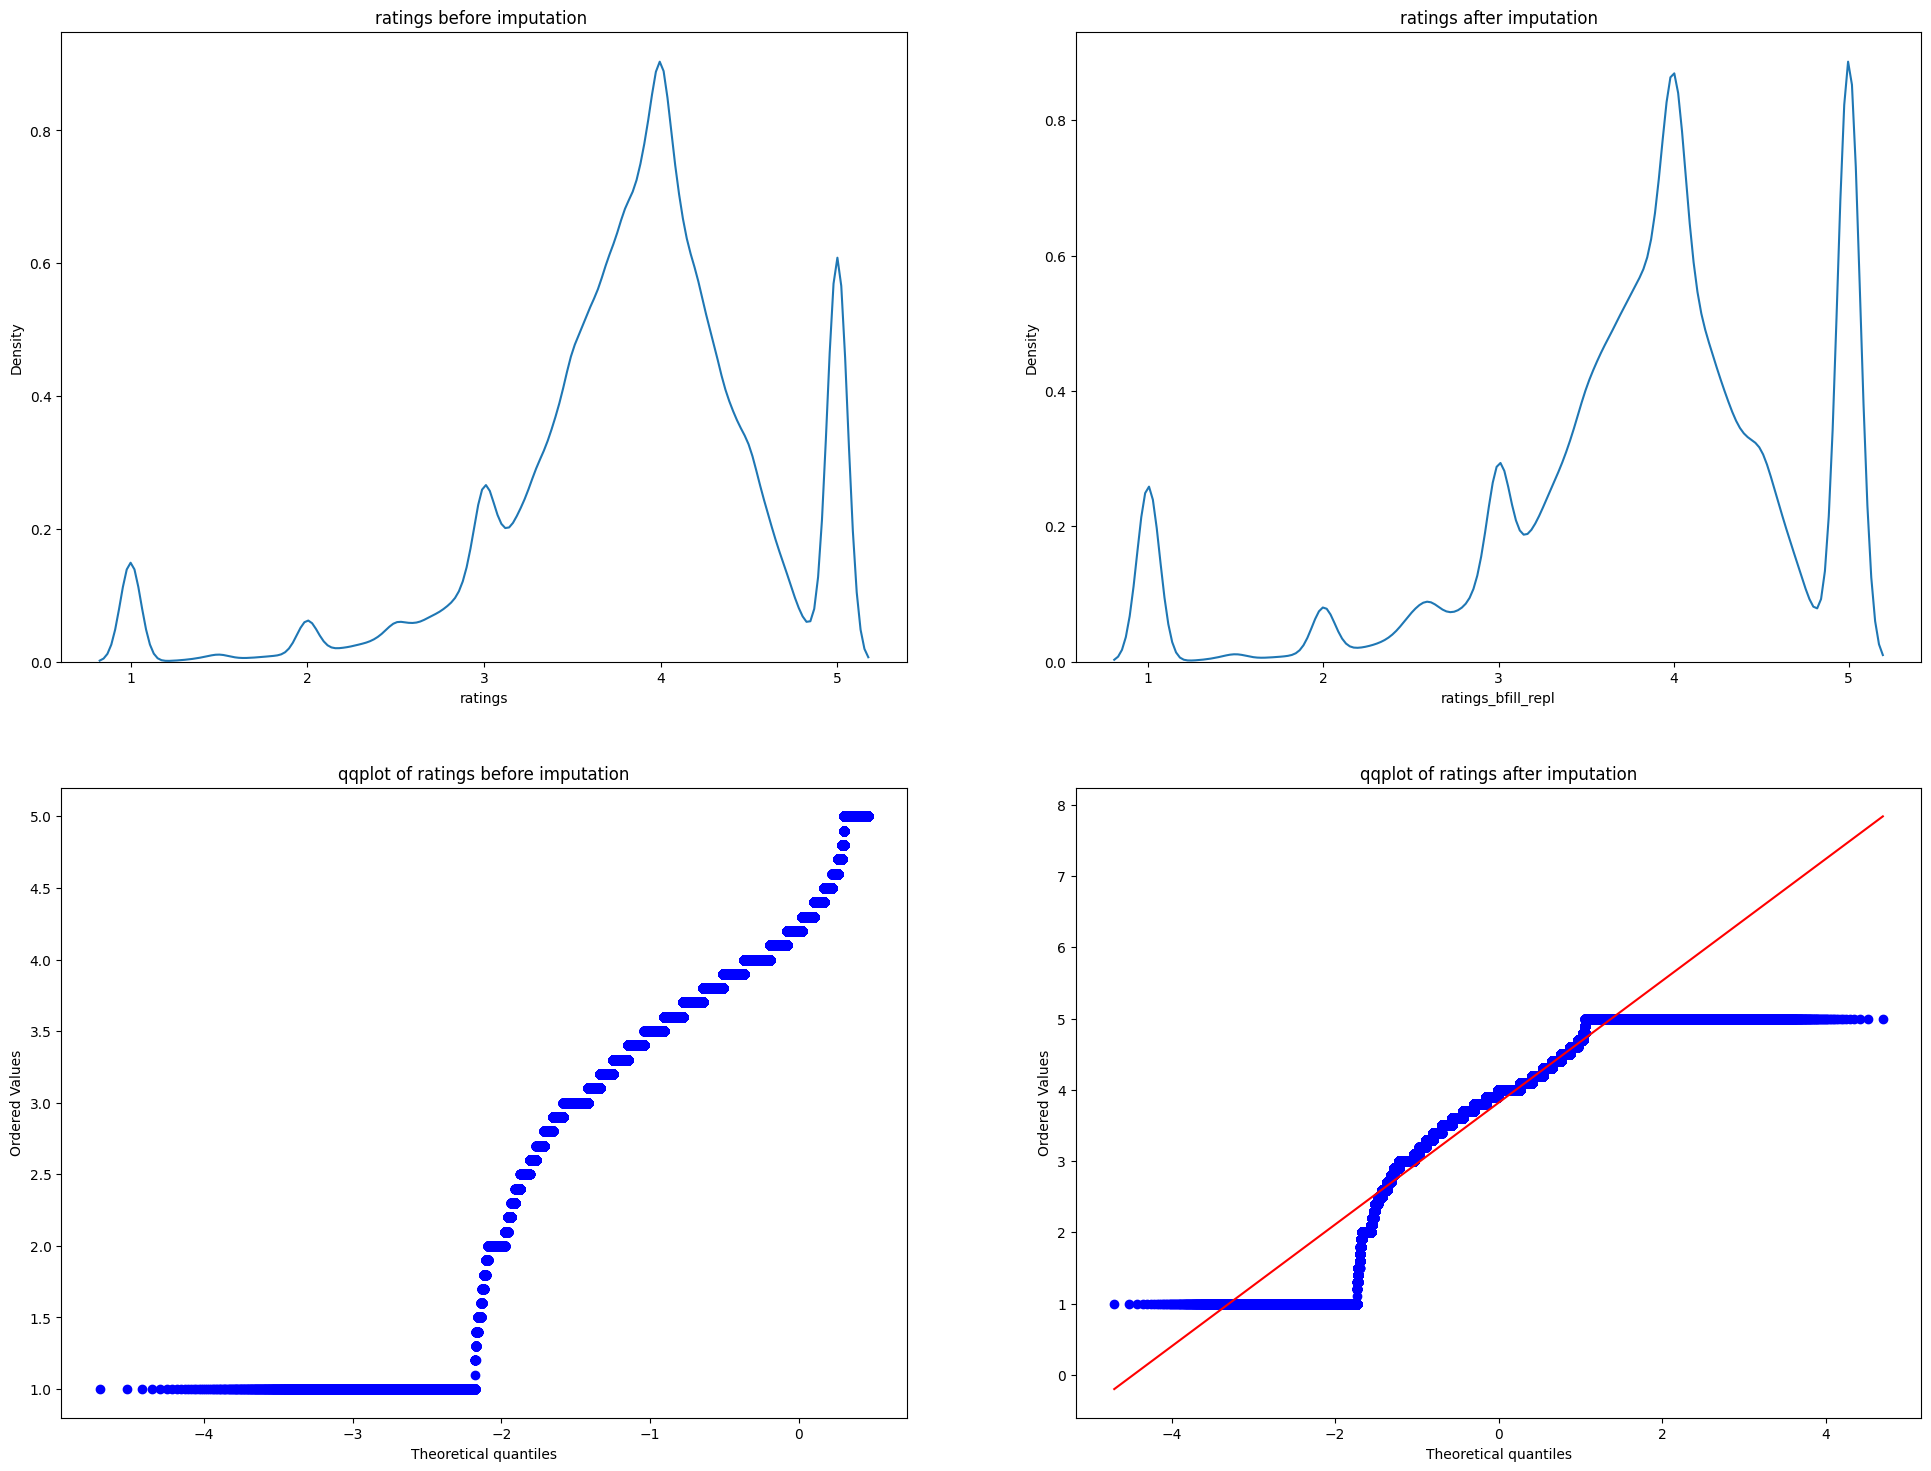

In [59]:
apply_all_strategies(data,'ratings',data_imputed)

>
<font color="grey">
<h4>
 
From above we can clearly see that it is 'forward fill' strategy that is bringing least change in statistics and characteristics of our data.  
Therefore, we impute nulls in rating column by 'ffill' method.

</h4>
</font>


### We'll find missing strategy for no_of_rating column

#### -> Before Imputation

no_of_ratings statistics:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
--------------------------------------------------


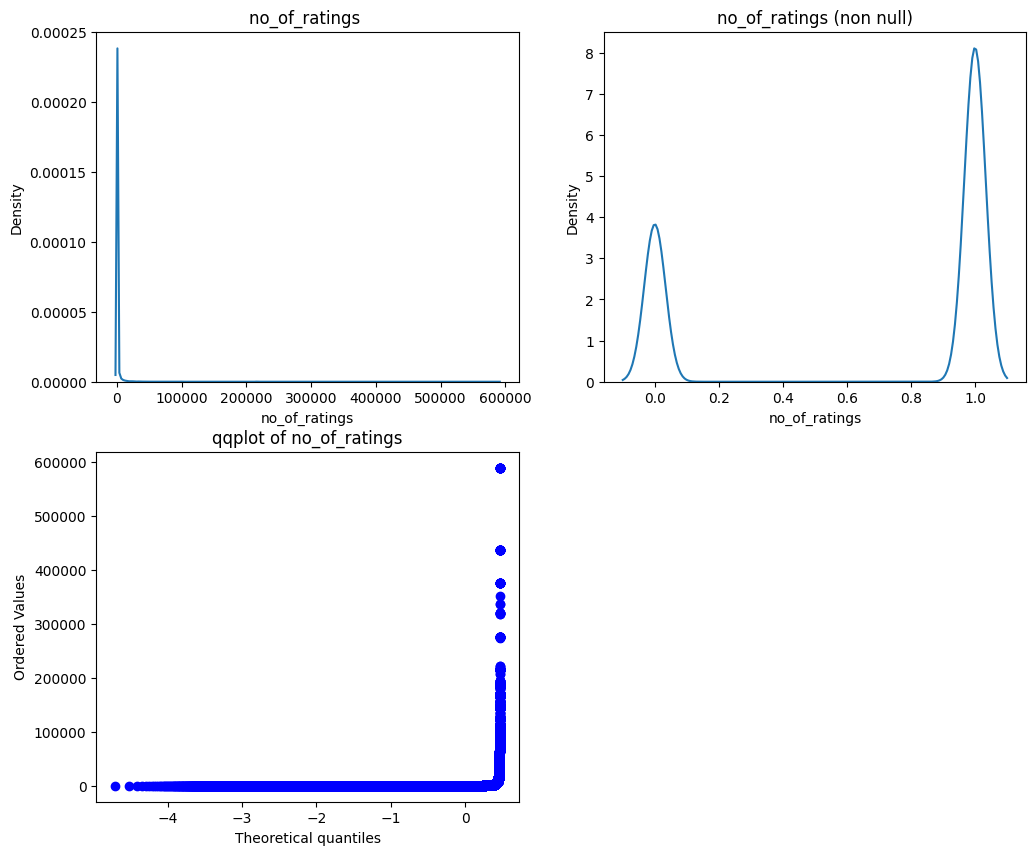

In [60]:
col_analysis(data,'no_of_ratings')

#### -> After Imputation






 ---------------------------------------- 1) APPLYING ITERATIVE IMPUTER ---------------------------------------- 





no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_itr_repl statistics after imputation:
 count    533772.00
mean        834.99
std        7097.33
min           1.00
25%           9.00
50%         117.00
75%         834.99
max      589547.00
Name: no_of_ratings_itr_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_itr_repl skewness after imputation:
 40.89
--------------------------------------------------


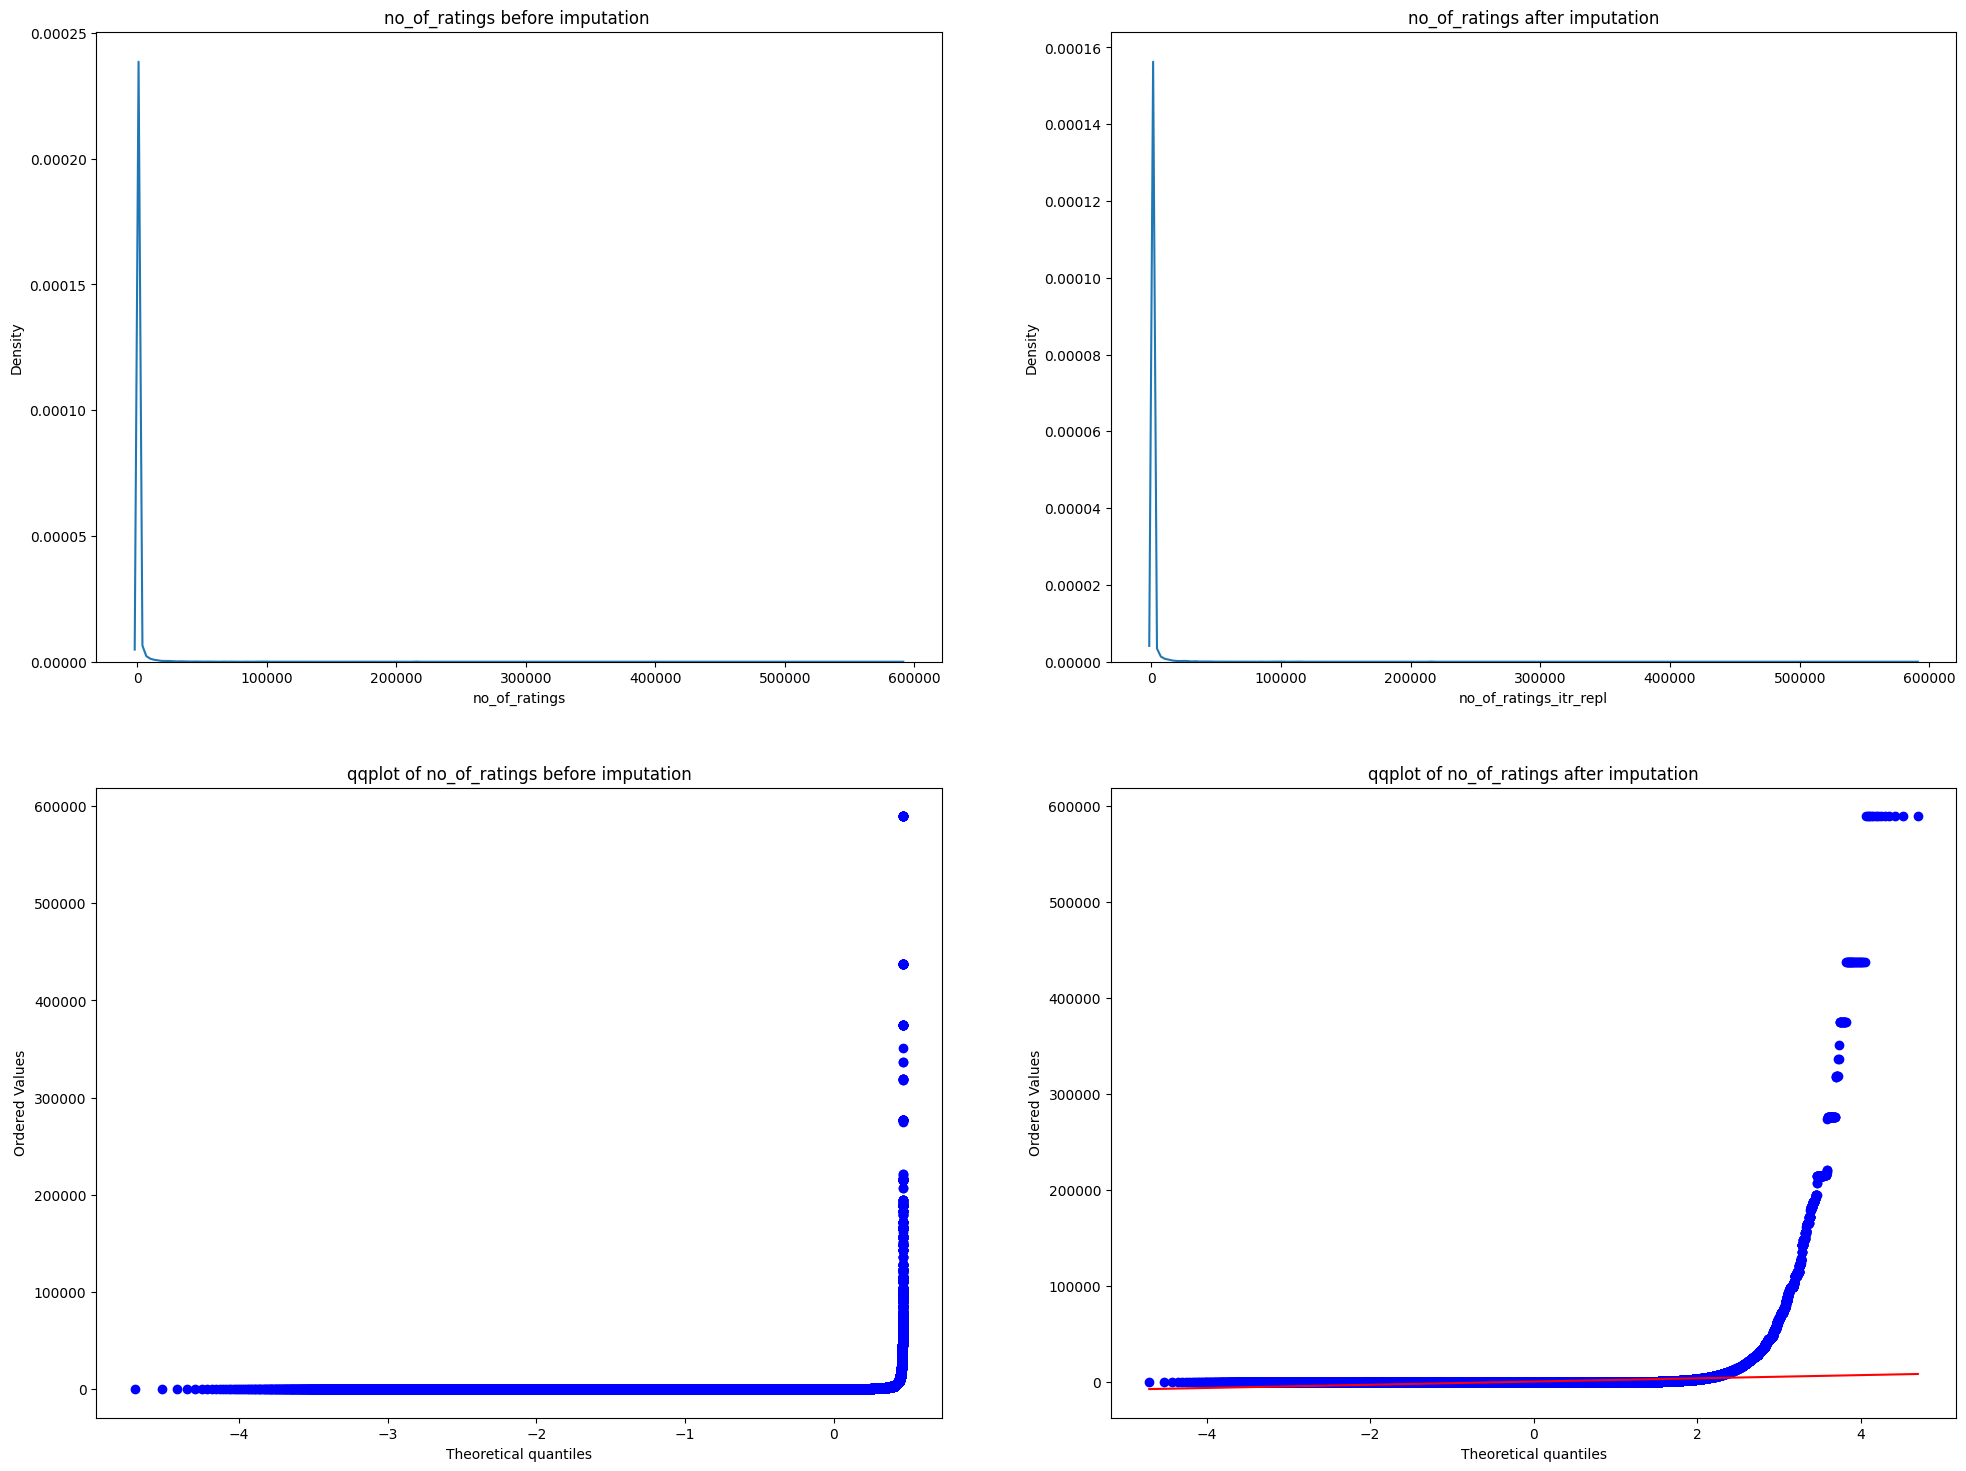






 -------------------------------------------------- 2a)  FILLING BY MEAN(SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Mean is 834.9941427299564
no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_SI_mean_repl statistics after imputation:
 count    533772.00
mean        834.99
std        7097.33
min           1.00
25%           9.00
50%         117.00
75%         834.99
max      589547.00
Name: no_of_ratings_SI_mean_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_SI_mean_repl skewness after imputation:
 40.89
--------------------------------------------------


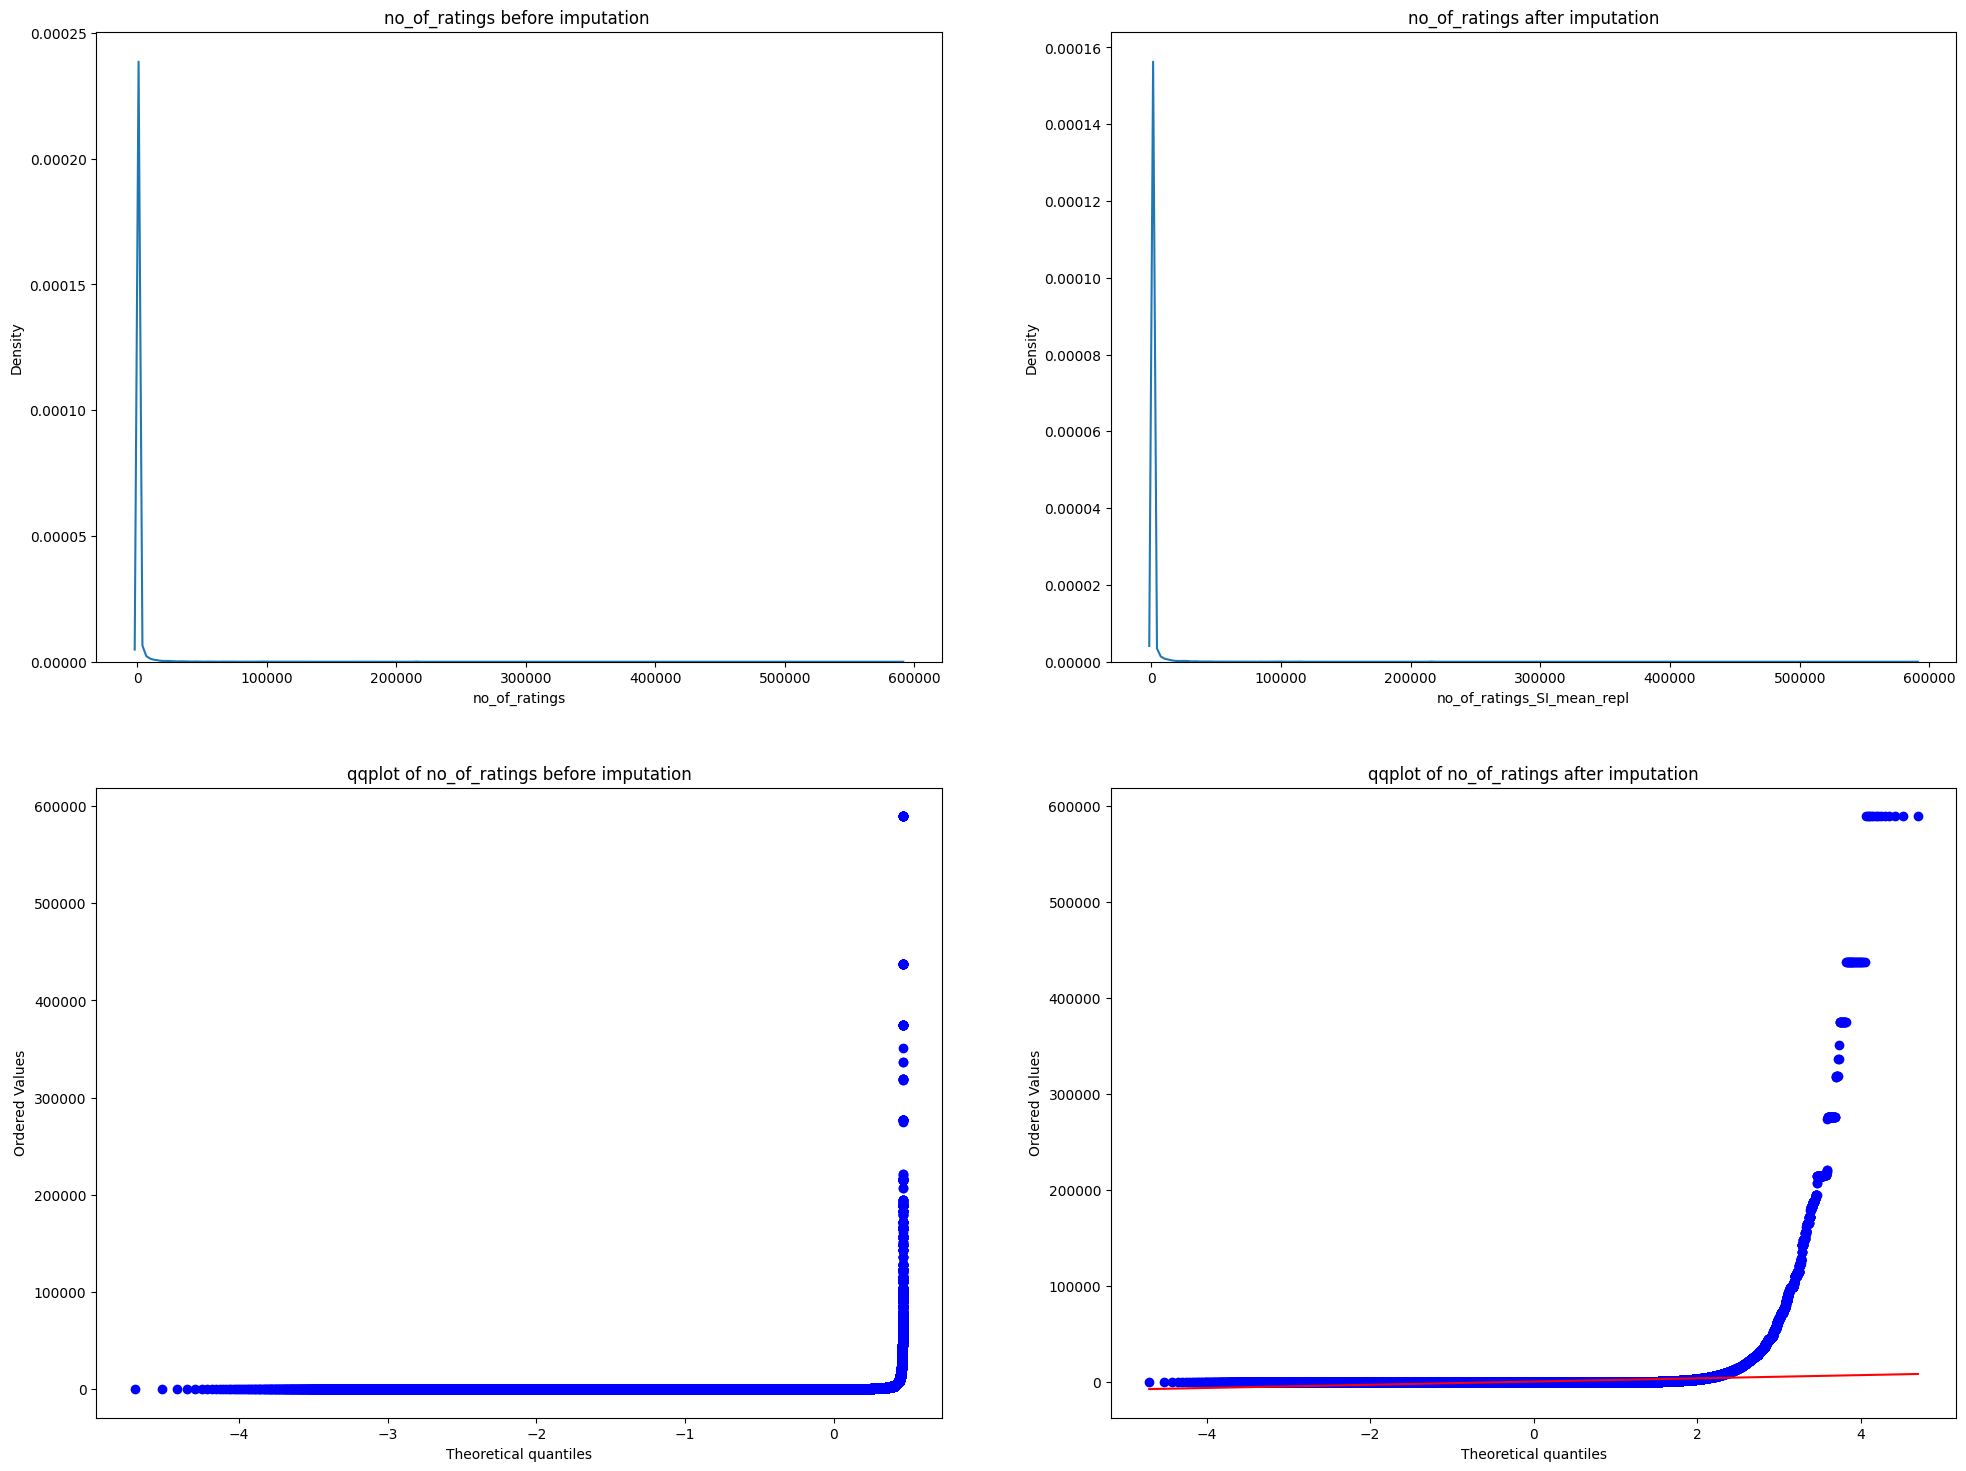






 -------------------------------------------------- 2b) FILLING BY MEAN(fillna METHOD) -------------------------------------------------- 





no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_mean_repl statistics after imputation:
 count    533772.00
mean        834.99
std        7097.33
min           1.00
25%           9.00
50%         117.00
75%         834.99
max      589547.00
Name: no_of_ratings_mean_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_mean_repl skewness after imputation:
 40.89
--------------------------------------------------


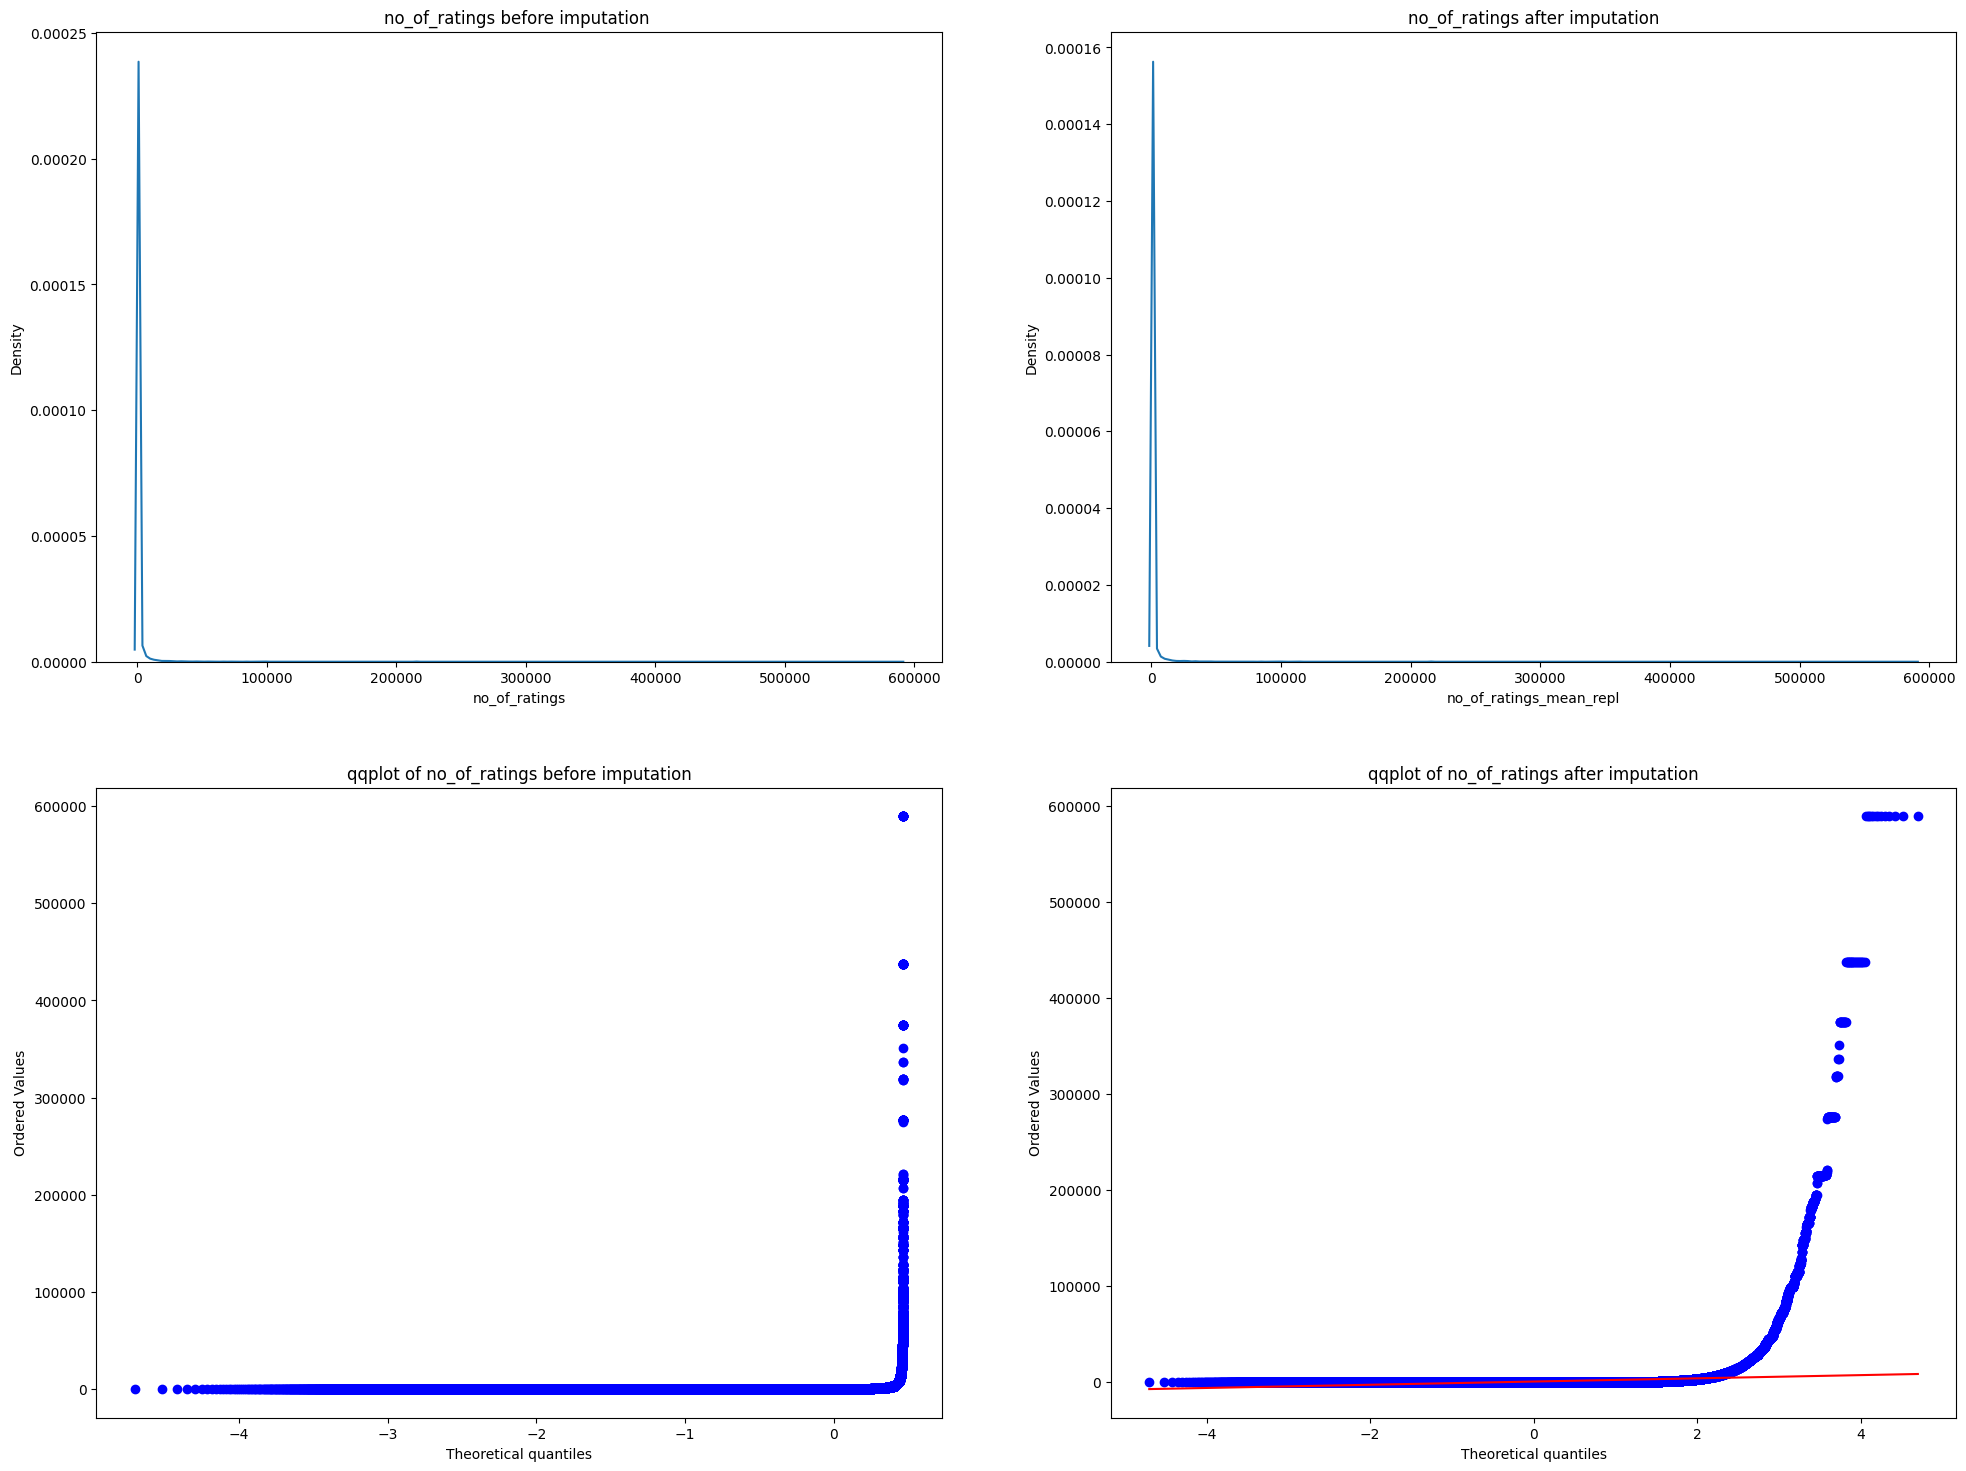






 -------------------------------------------------- 3a) FILLING BY MEDIAN (SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Median is 20.0
no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_SI_median_repl statistics after imputation:
 count    533772.00
mean        573.94
std        7107.51
min           1.00
25%           9.00
50%          20.00
75%          51.00
max      589547.00
Name: no_of_ratings_SI_median_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_SI_median_repl skewness after imputation:
 40.82
--------------------------------------------------


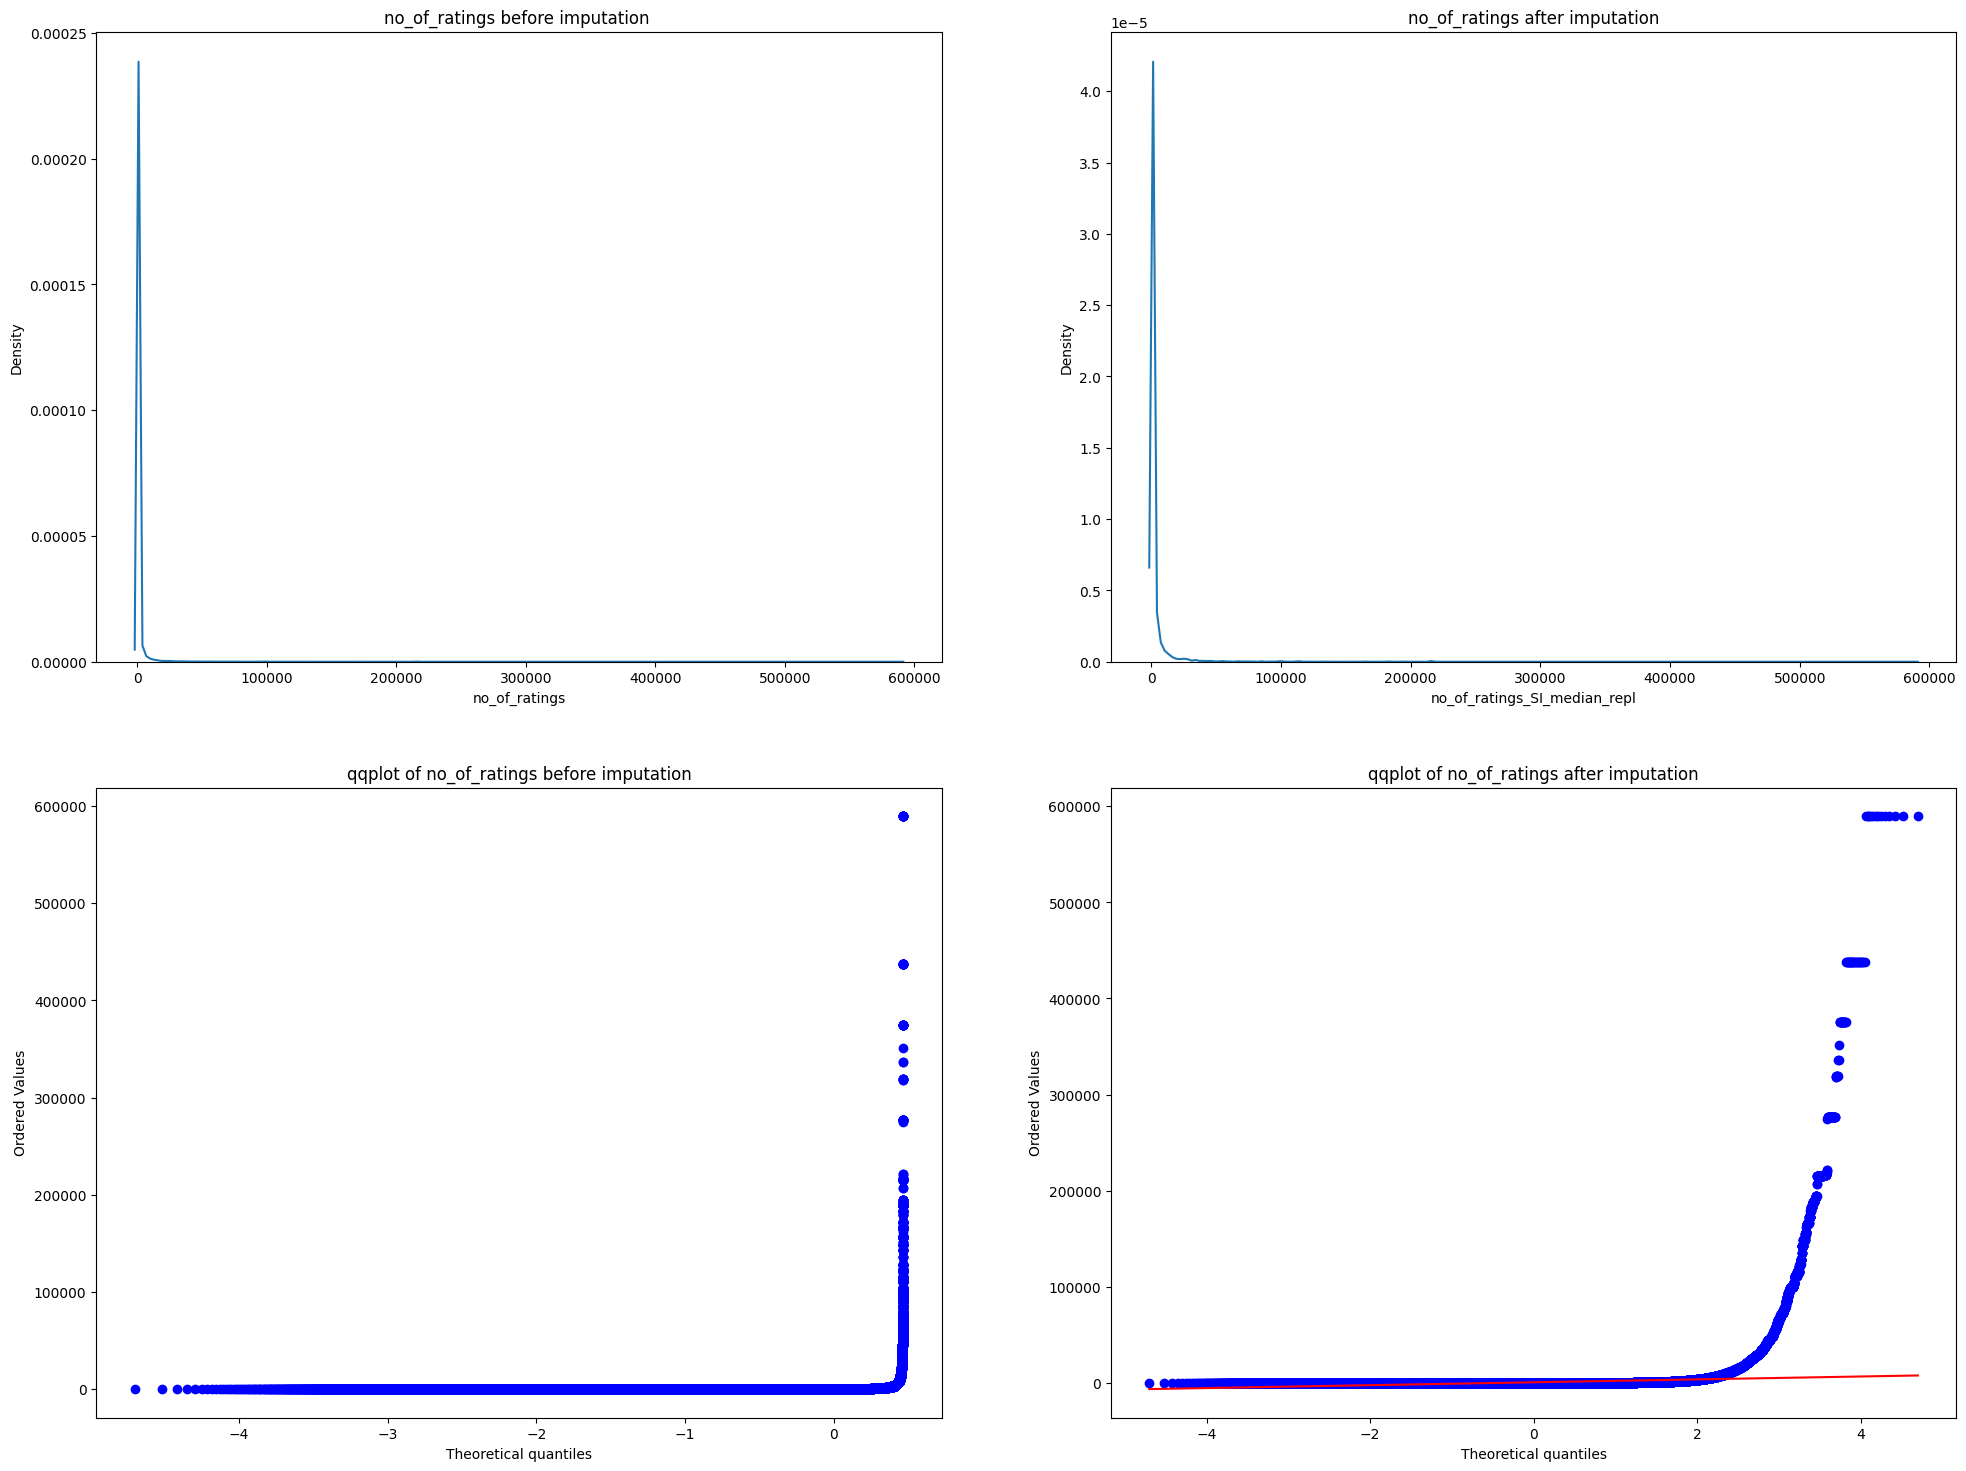






 -------------------------------------------------- 3b) FILLING BY MEDIAN (fillna METHOD) -------------------------------------------------- 





no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_median_repl statistics after imputation:
 count    533772.00
mean        573.94
std        7107.51
min           1.00
25%           9.00
50%          20.00
75%          51.00
max      589547.00
Name: no_of_ratings_median_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_median_repl skewness after imputation:
 40.82
--------------------------------------------------


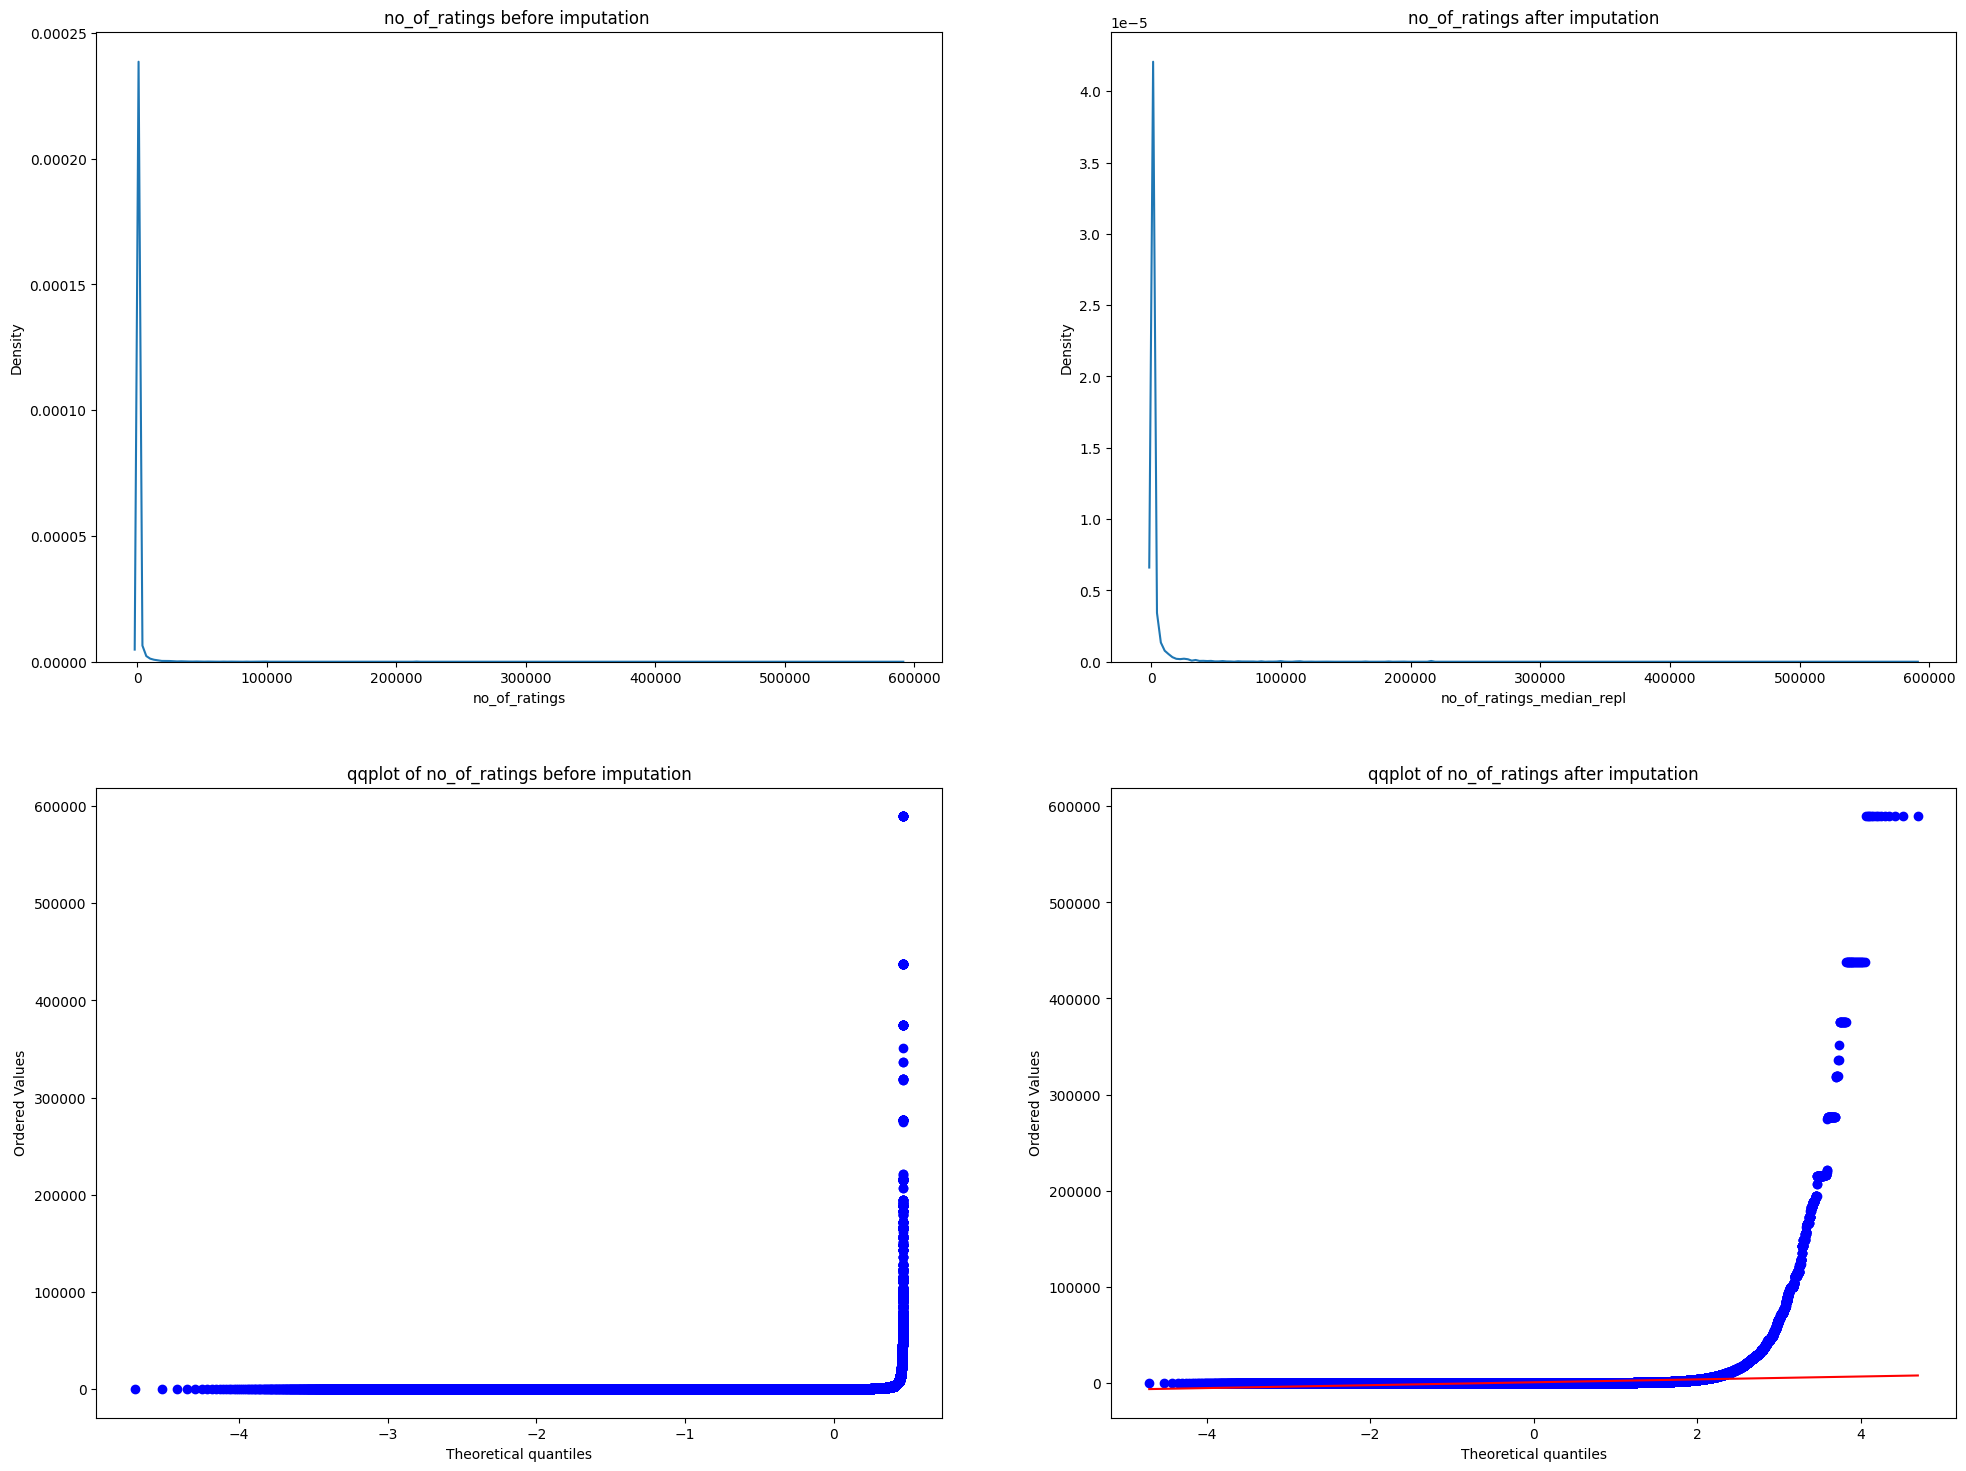






 ---------------------------------------- 4) FORWARD FILLING METHOD ---------------------------------------- 





no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_ffill_repl statistics after imputation:
 count    533772.00
mean        646.44
std        7306.82
min           1.00
25%           2.00
50%          12.00
75%          92.00
max      589547.00
Name: no_of_ratings_ffill_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_ffill_repl skewness after imputation:
 38.99
--------------------------------------------------


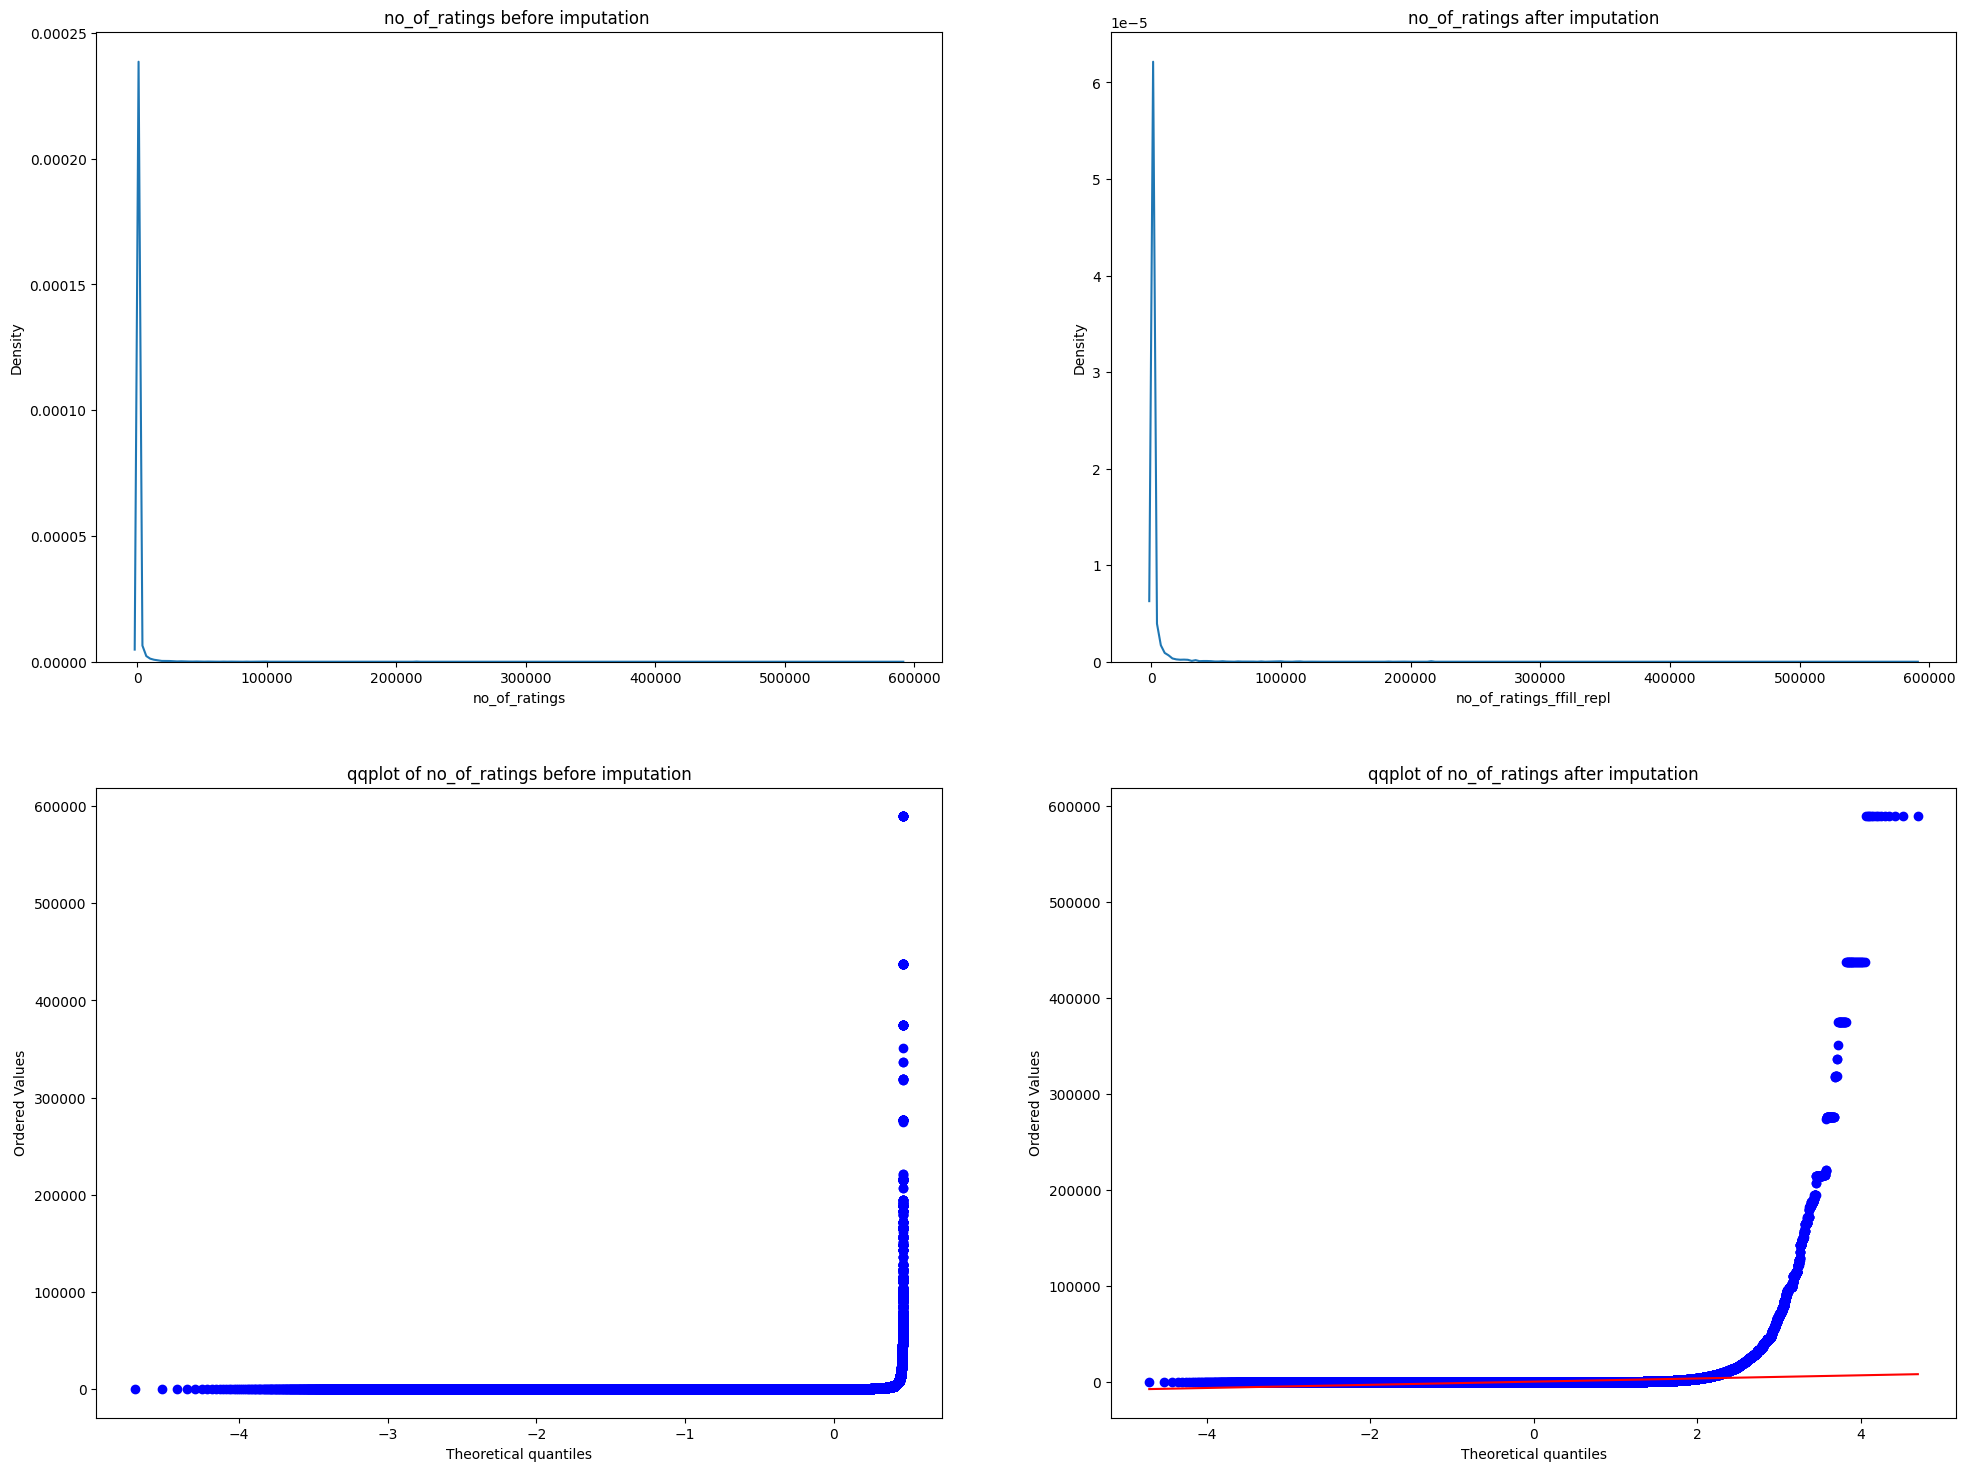






 ---------------------------------------- 5) BACKWARD FILLING METHOD ---------------------------------------- 





no_of_ratings statistics before imputation:
 count    362797.00
mean        834.99
std        8608.78
min           1.00
25%           4.00
50%          20.00
75%         133.00
max      589547.00
Name: no_of_ratings, dtype: float64
no_of_ratings_bfill_repl statistics after imputation:
 count    533772.00
mean       1332.75
std       10596.63
min           1.00
25%           2.00
50%          11.00
75%          83.00
max      589547.00
Name: no_of_ratings_bfill_repl, dtype: float64
--------------------------------------------------
no_of_ratings skewness before imputation:
 33.71
no_of_ratings_bfill_repl skewness after imputation:
 16.75
--------------------------------------------------


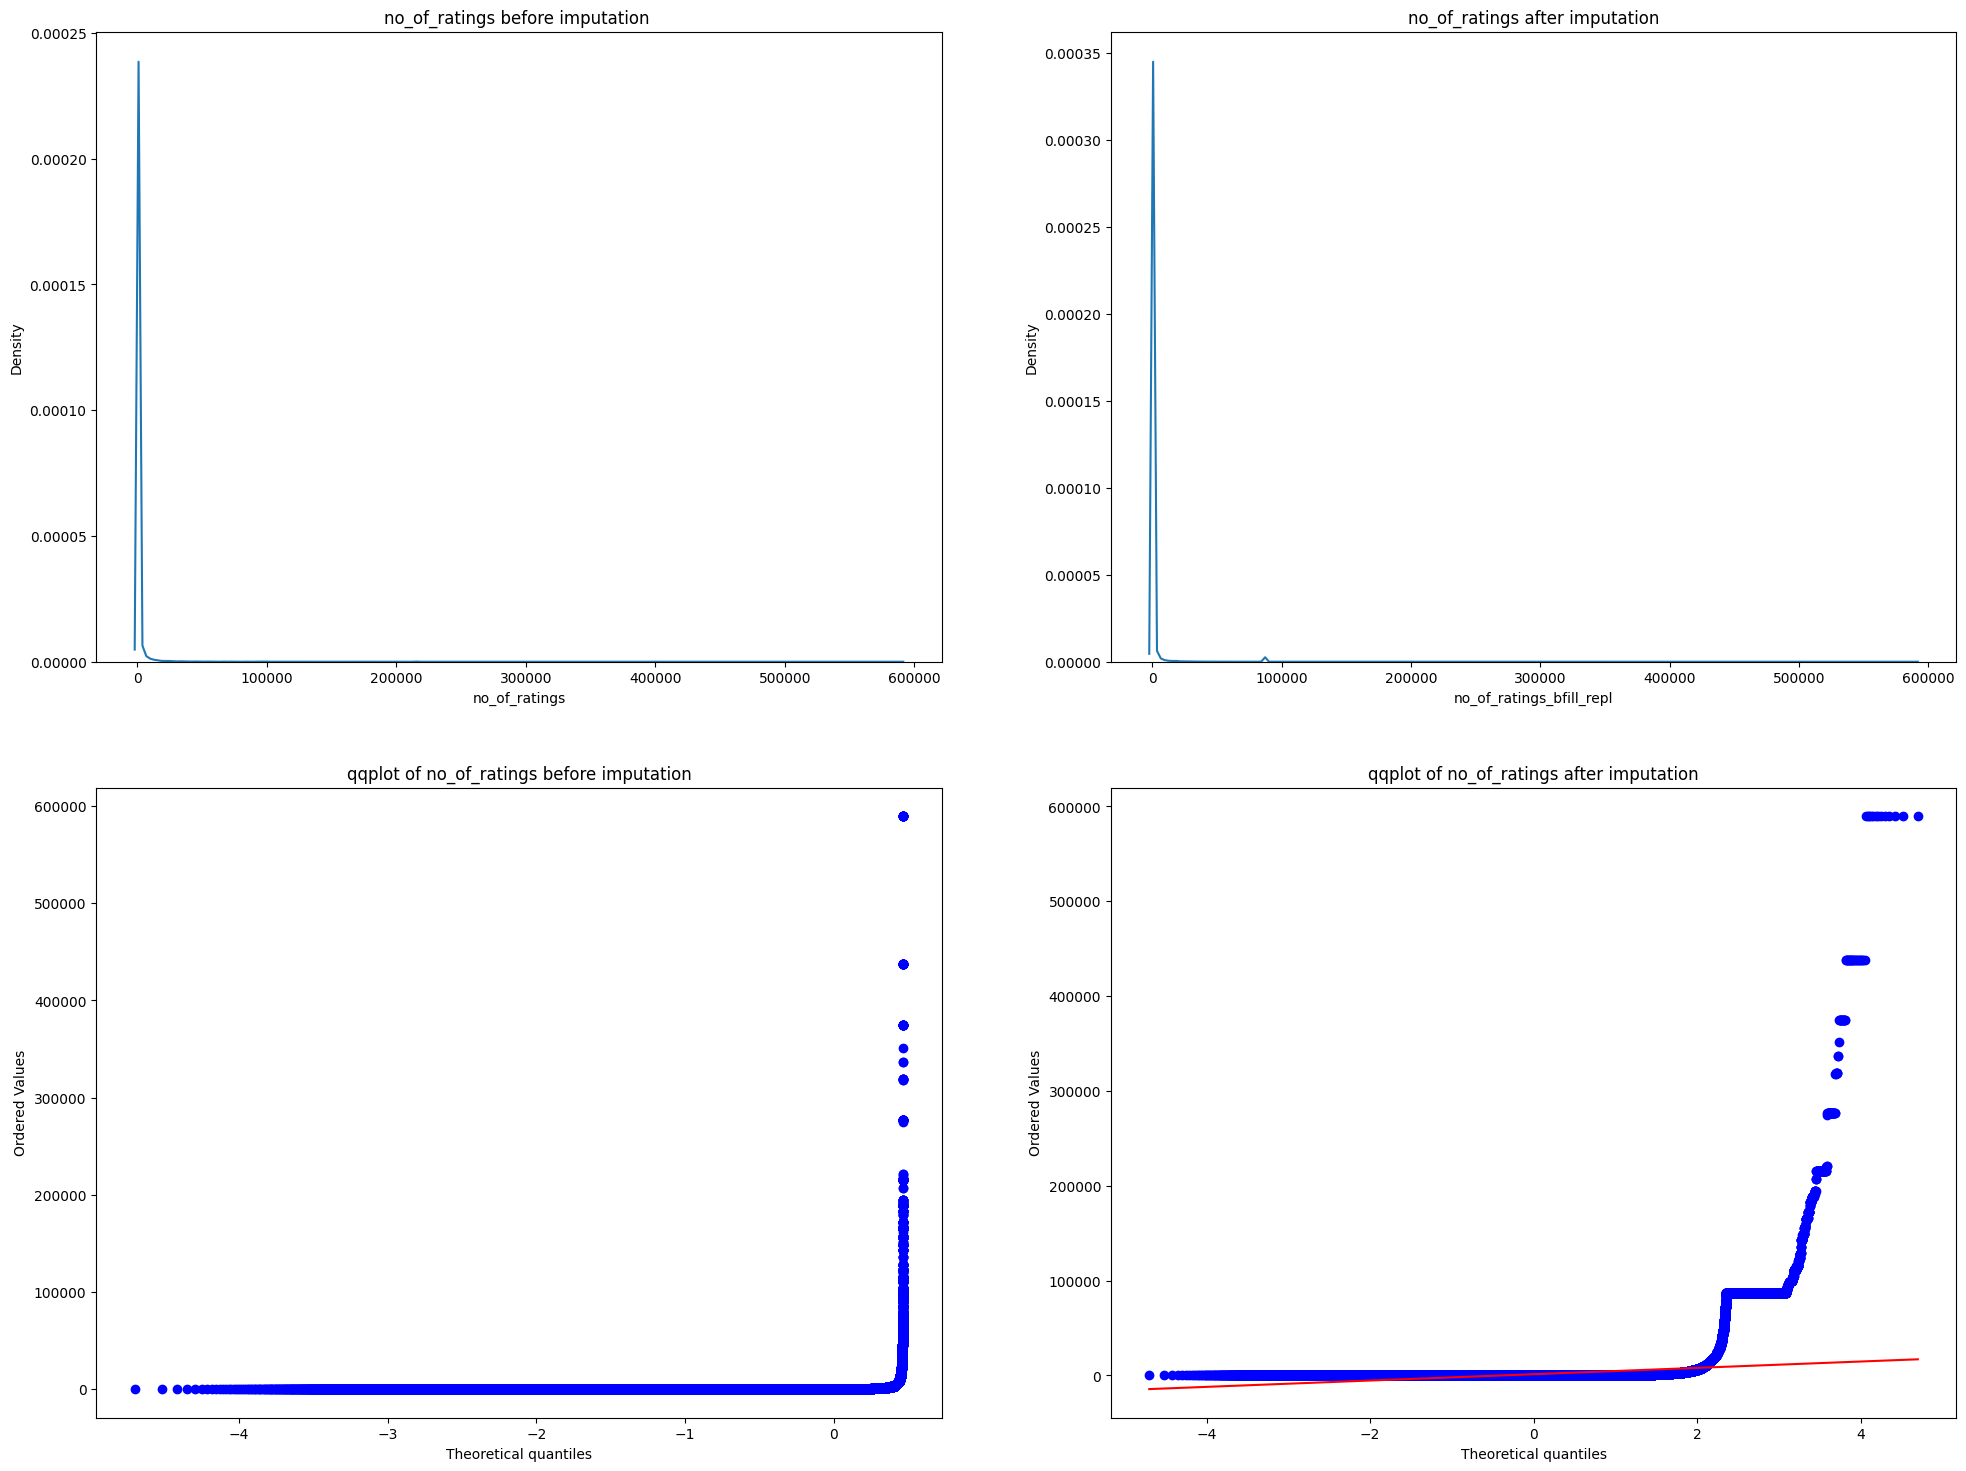

In [61]:
apply_all_strategies(data, 'no_of_ratings',data_imputed)

>
<font color="grey">
<h4>
 
From above we can clearly see that it is 'forward fill' strategy that is bringing least change in statistics and characteristics of our data.  
Therefore, we impute nulls in no_of_ratings column by 'ffill' method.

</h4>
</font>


### We'll impute missing strategy of discount_price column

#### -> Before Imputation






 ---------------------------------------- 1) APPLYING ITERATIVE IMPUTER ---------------------------------------- 





discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_itr_repl statistics after imputation:
 count     533772.00
mean        2623.16
std         9065.99
min            8.00
25%          399.00
50%          749.00
75%         1911.00
max      1249990.00
Name: discount_price_itr_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_itr_repl skewness after imputation:
 17.42
--------------------------------------------------


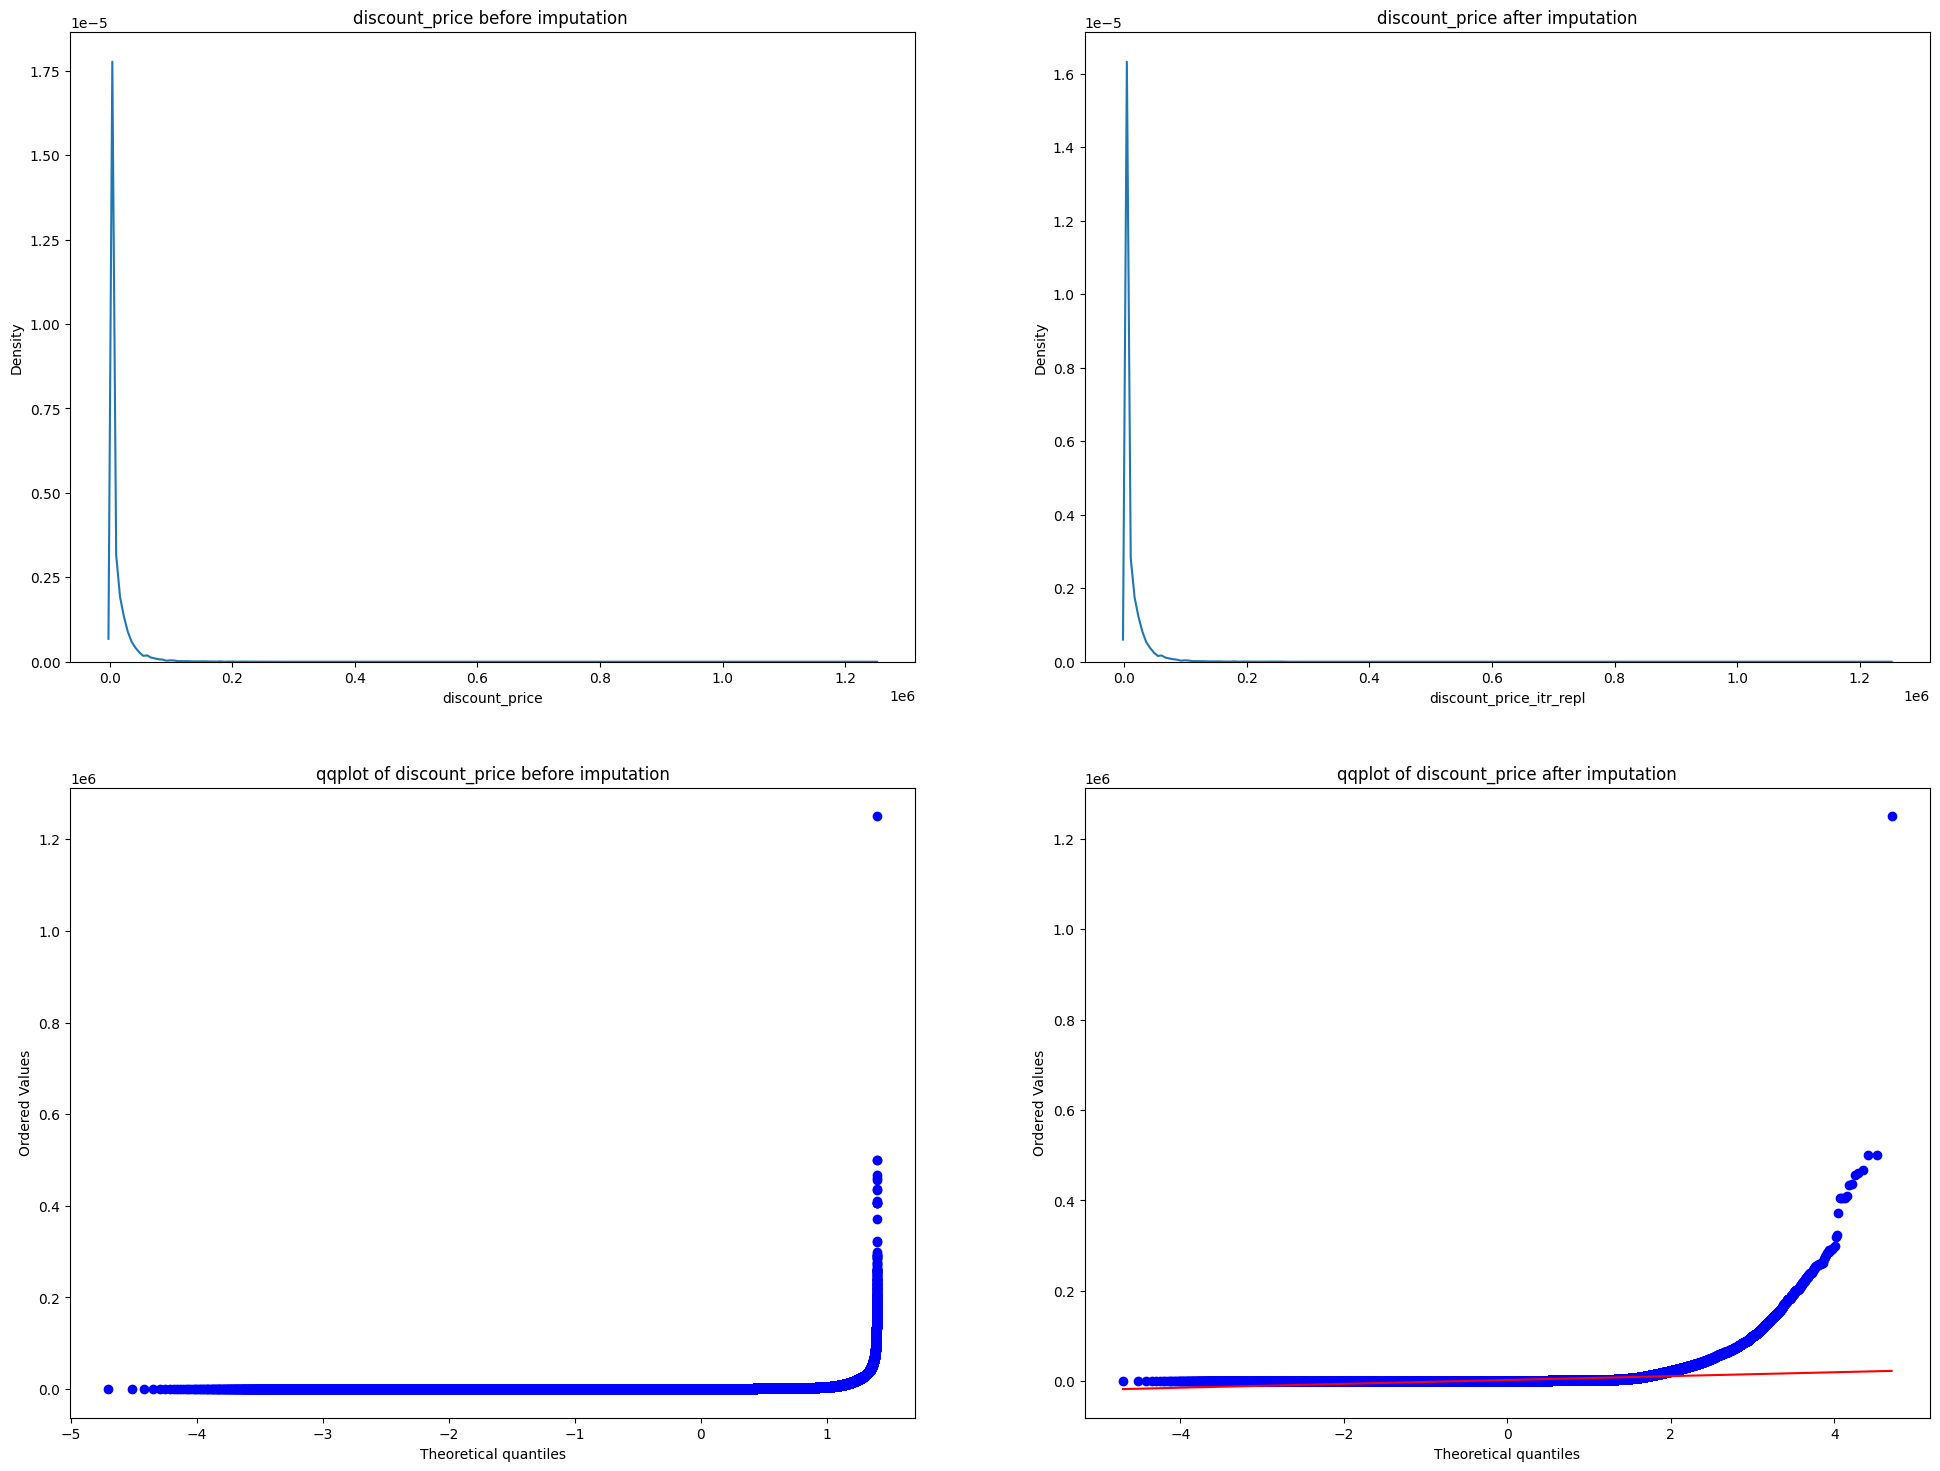






 -------------------------------------------------- 2a)  FILLING BY MEAN(SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Mean is 2623.1607410760535
discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_SI_mean_repl statistics after imputation:
 count     533772.00
mean        2623.16
std         9065.99
min            8.00
25%          399.00
50%          749.00
75%         1911.00
max      1249990.00
Name: discount_price_SI_mean_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_SI_mean_repl skewness after imputation:
 17.42
--------------------------------------------------


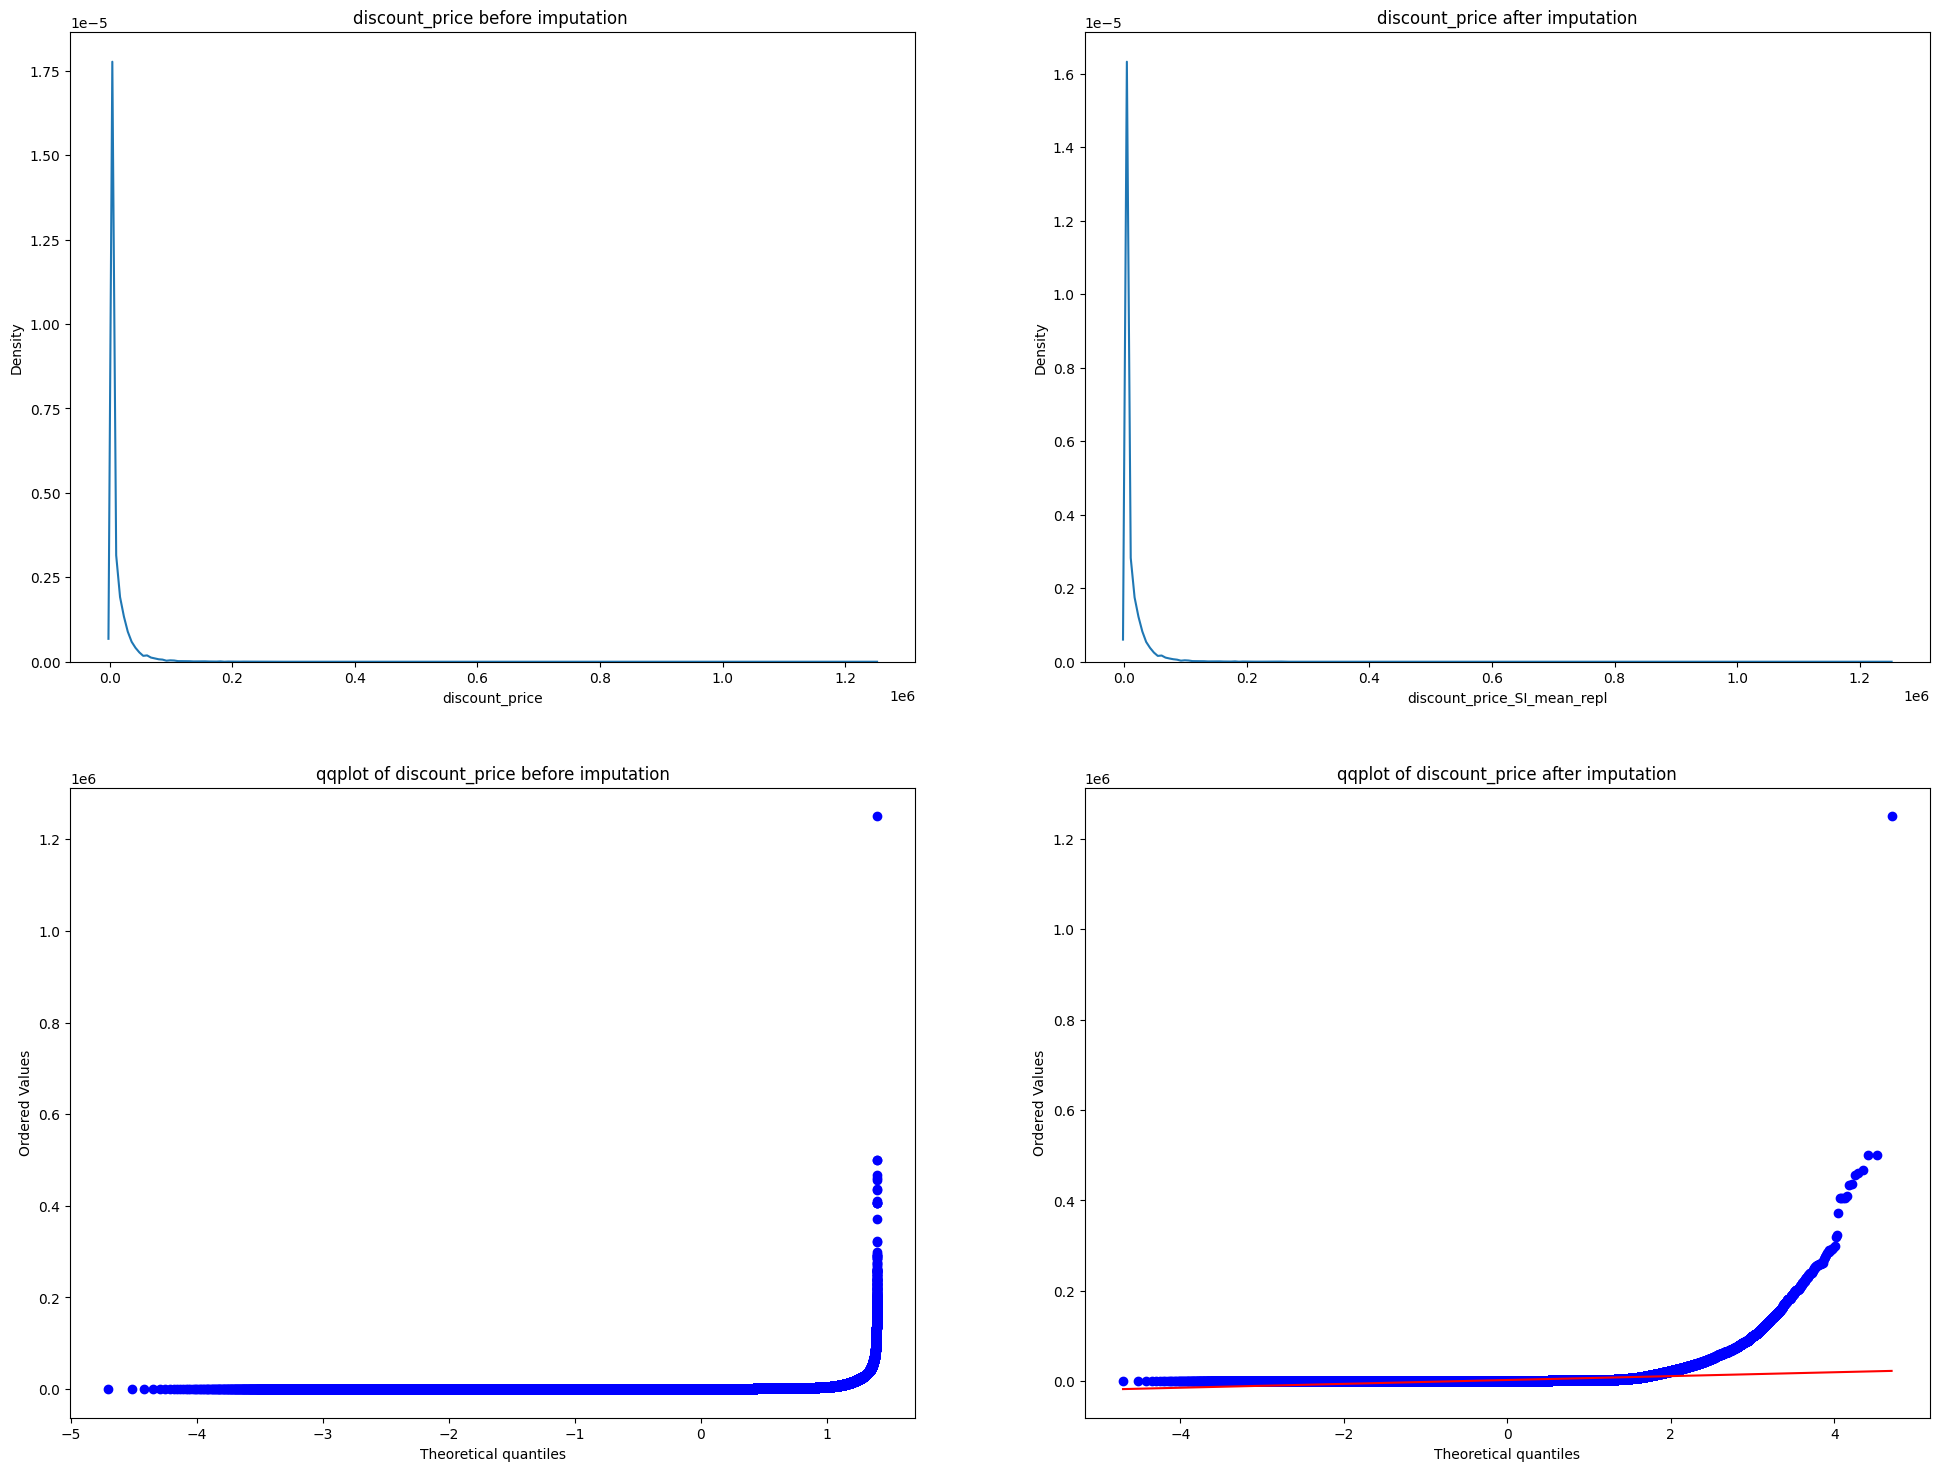






 -------------------------------------------------- 2b) FILLING BY MEAN(fillna METHOD) -------------------------------------------------- 





discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_mean_repl statistics after imputation:
 count     533772.00
mean        2623.16
std         9065.99
min            8.00
25%          399.00
50%          749.00
75%         1911.00
max      1249990.00
Name: discount_price_mean_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_mean_repl skewness after imputation:
 17.42
--------------------------------------------------


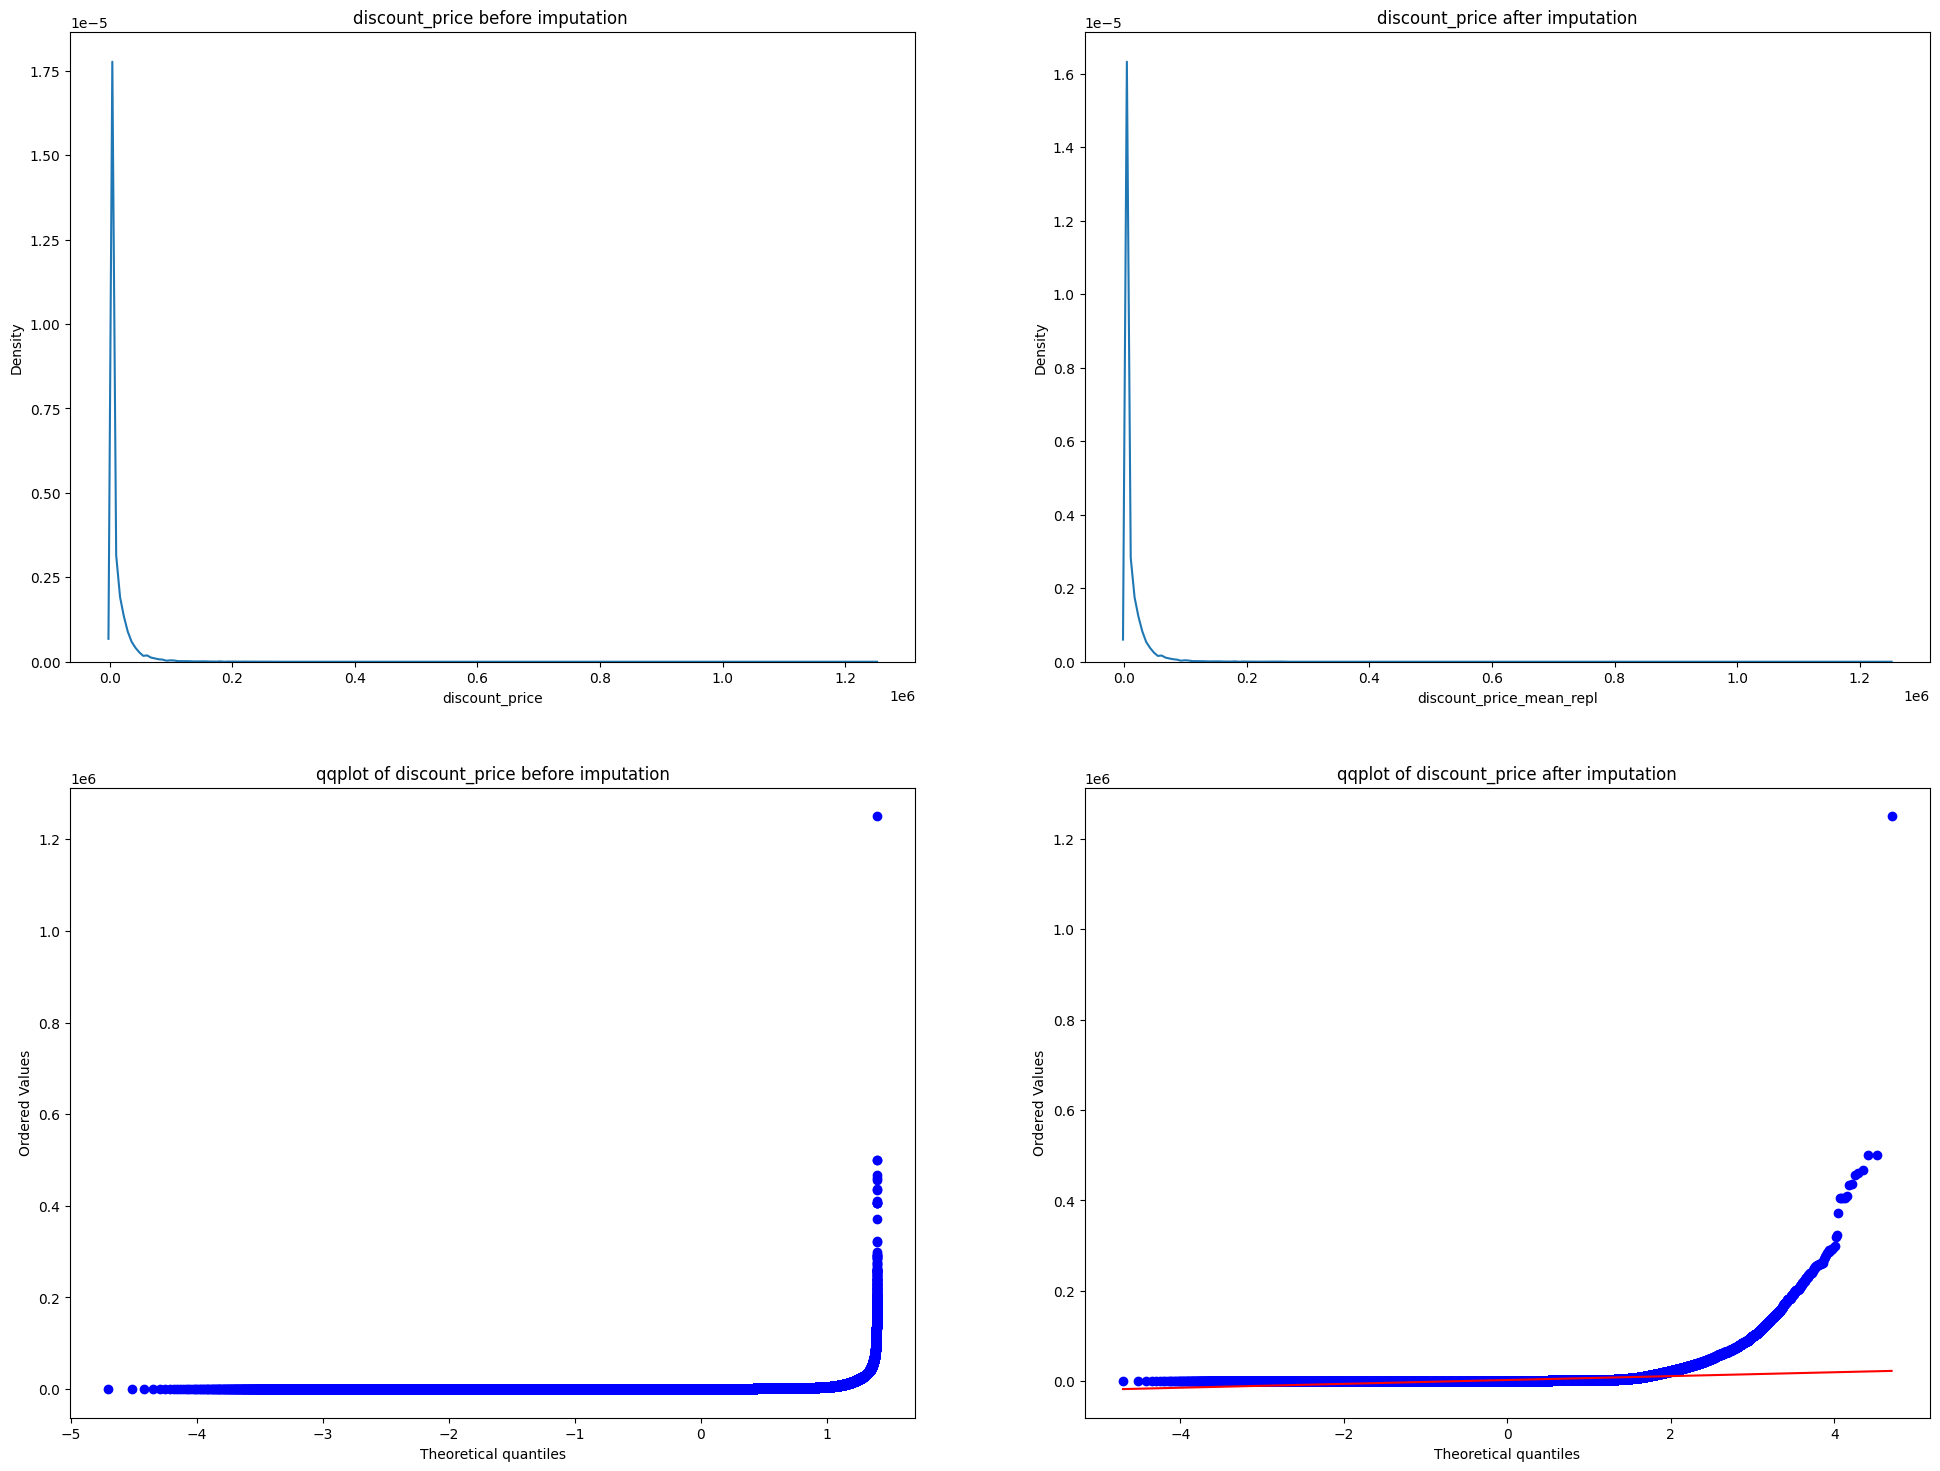






 -------------------------------------------------- 3a) FILLING BY MEDIAN (SIMPLE IMPUTER METHOD) -------------------------------------------------- 





Median is 679.0
discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_SI_median_repl statistics after imputation:
 count     533772.00
mean        2465.27
std         9081.53
min            8.00
25%          399.00
50%          679.00
75%         1299.00
max      1249990.00
Name: discount_price_SI_median_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_SI_median_repl skewness after imputation:
 17.38
--------------------------------------------------


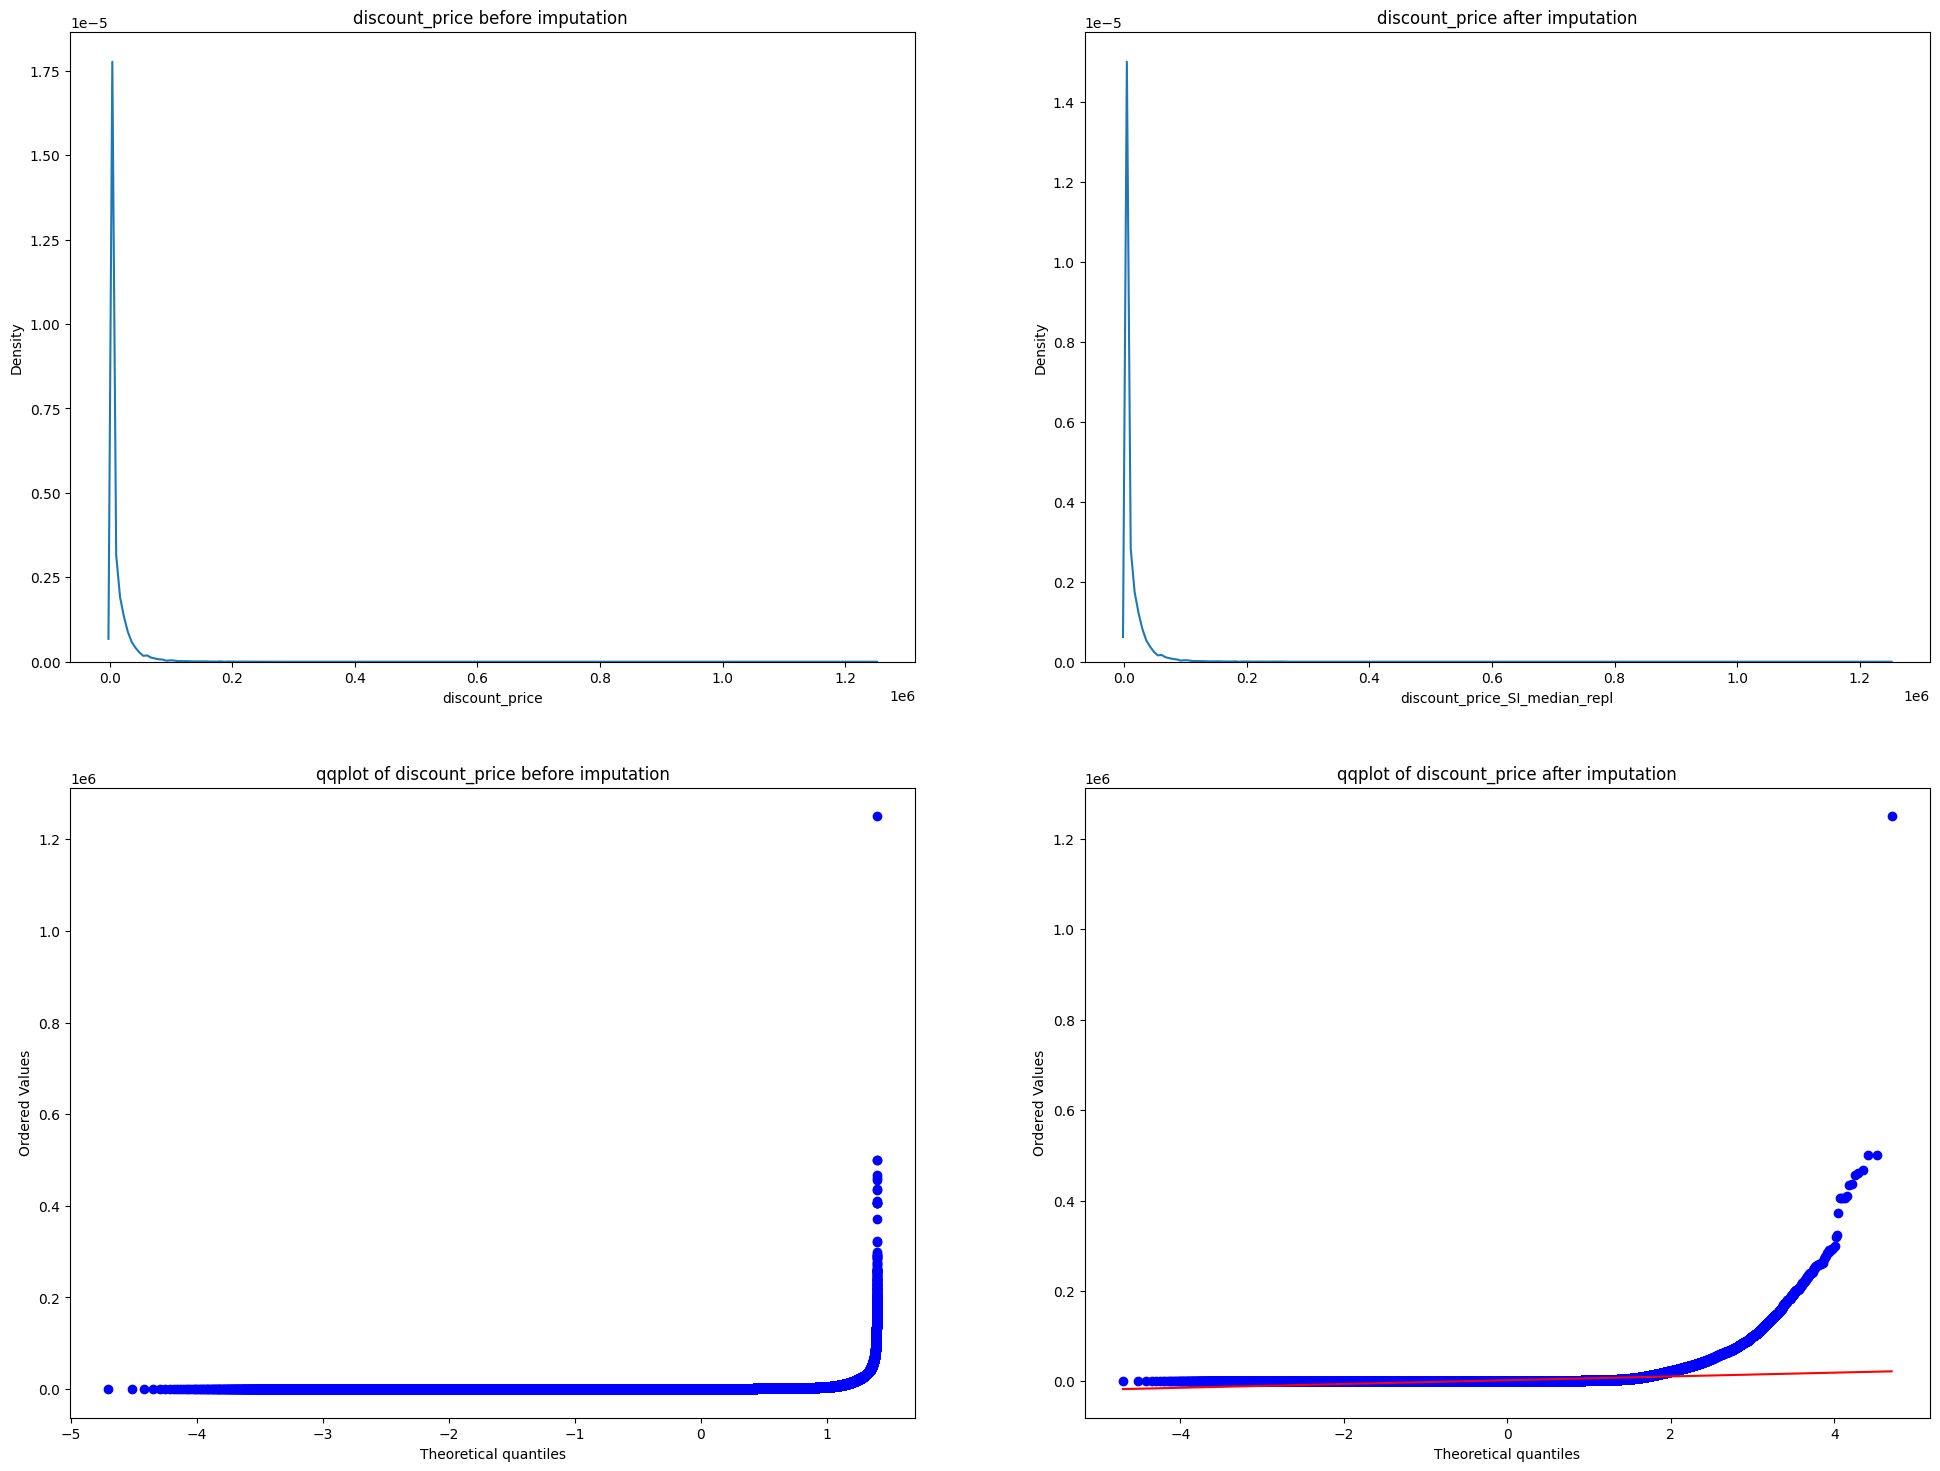






 -------------------------------------------------- 3b) FILLING BY MEDIAN (fillna METHOD) -------------------------------------------------- 





discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_median_repl statistics after imputation:
 count     533772.00
mean        2465.27
std         9081.53
min            8.00
25%          399.00
50%          679.00
75%         1299.00
max      1249990.00
Name: discount_price_median_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_median_repl skewness after imputation:
 17.38
--------------------------------------------------


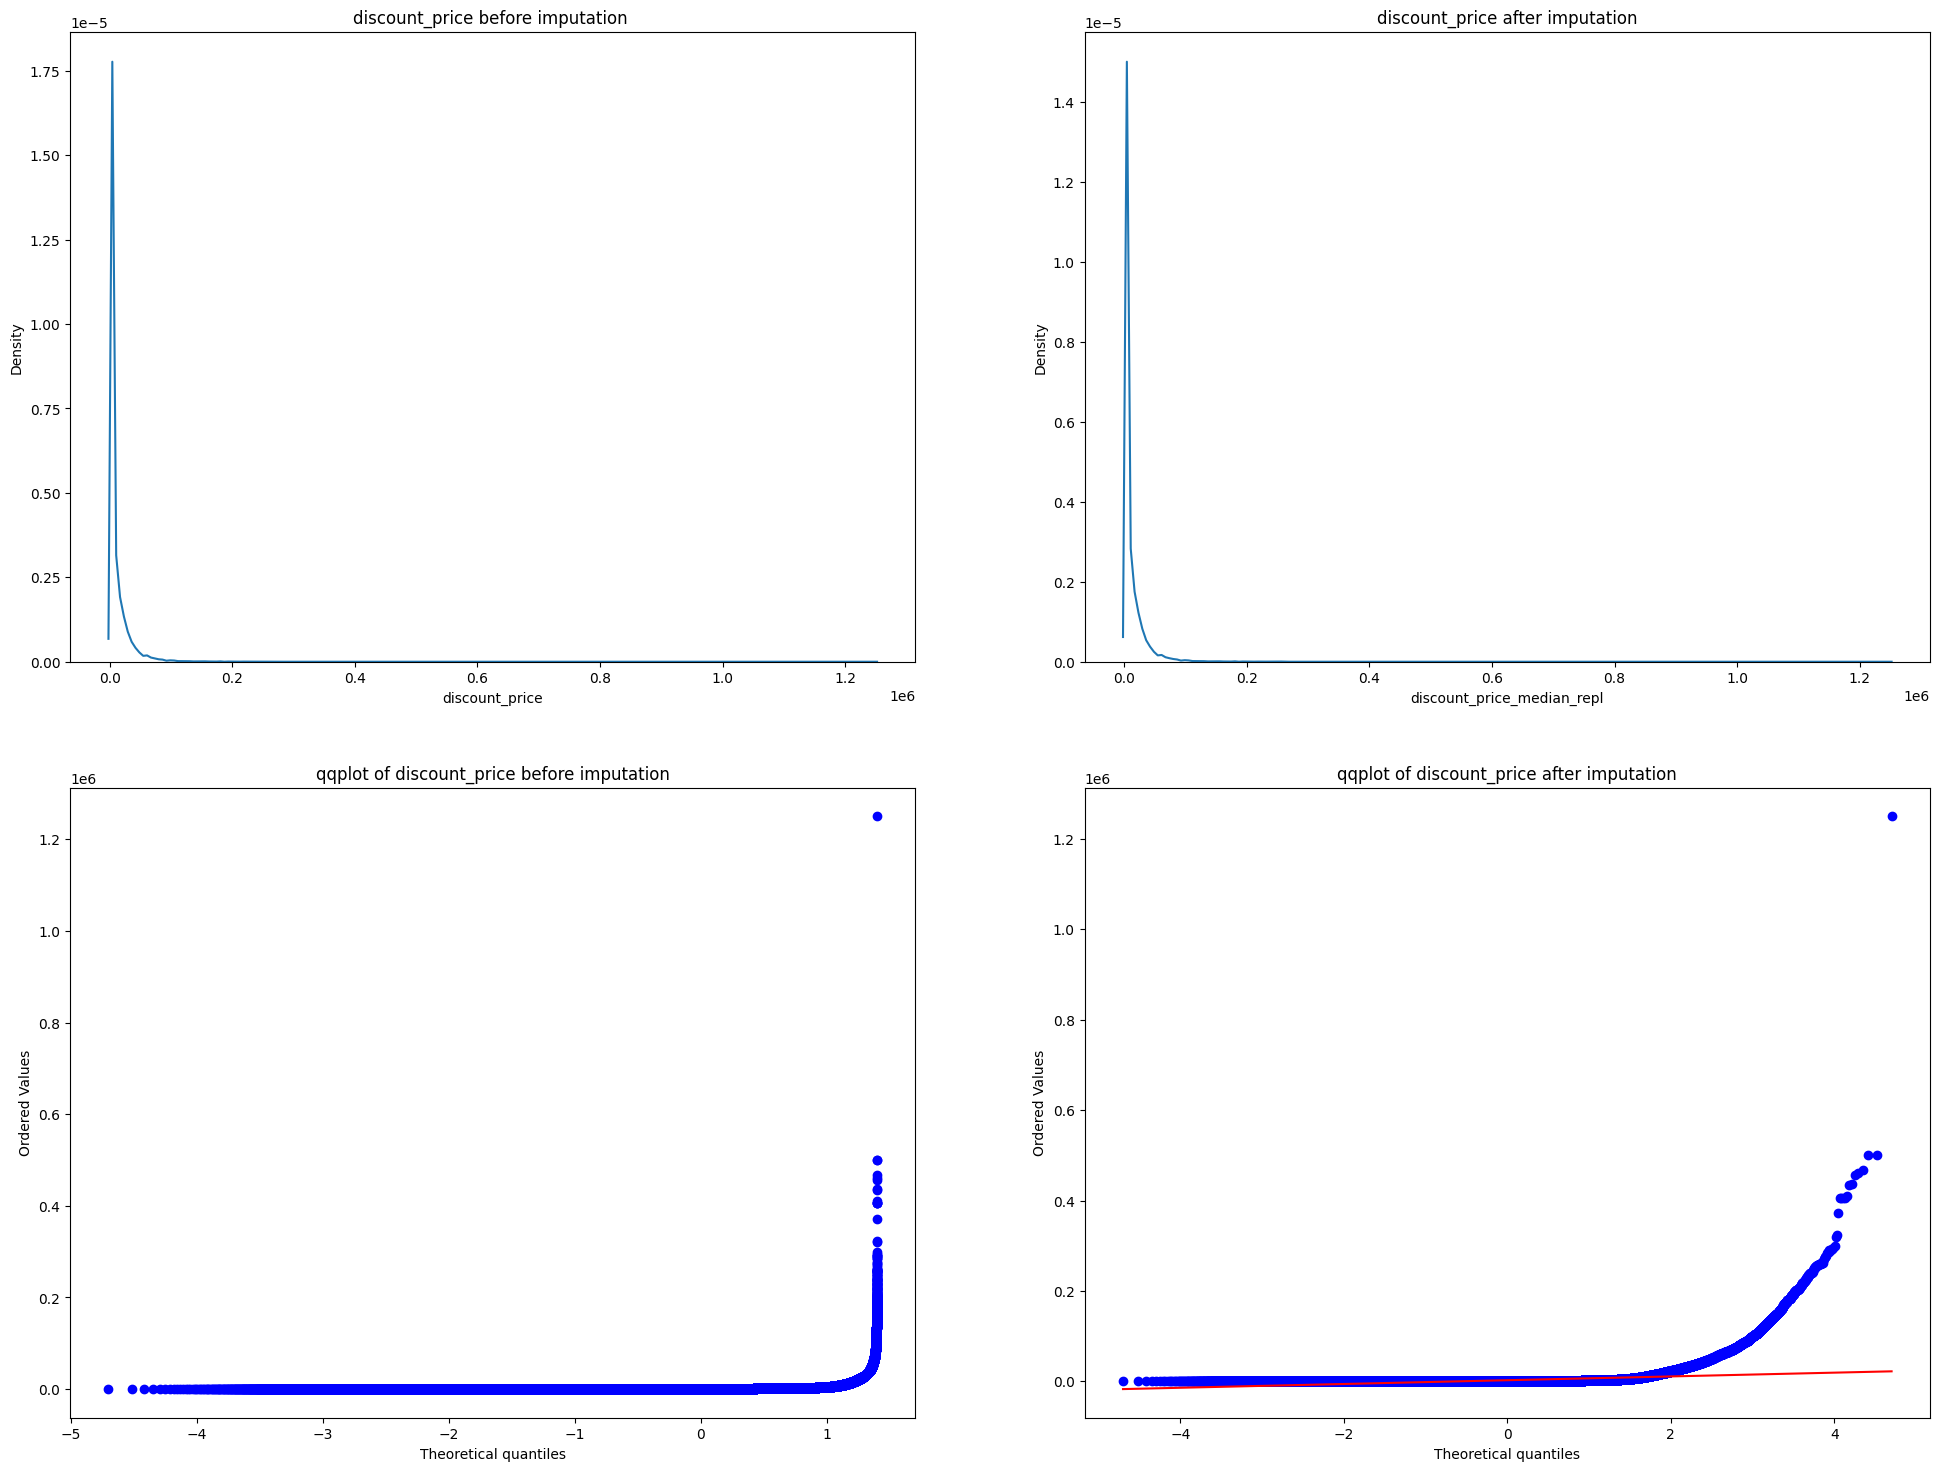






 ---------------------------------------- 4) FORWARD FILLING METHOD ---------------------------------------- 





discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_ffill_repl statistics after imputation:
 count     533772.00
mean        2588.71
std         9209.74
min            8.00
25%          396.00
50%          693.00
75%         1449.00
max      1249990.00
Name: discount_price_ffill_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_ffill_repl skewness after imputation:
 16.89
--------------------------------------------------


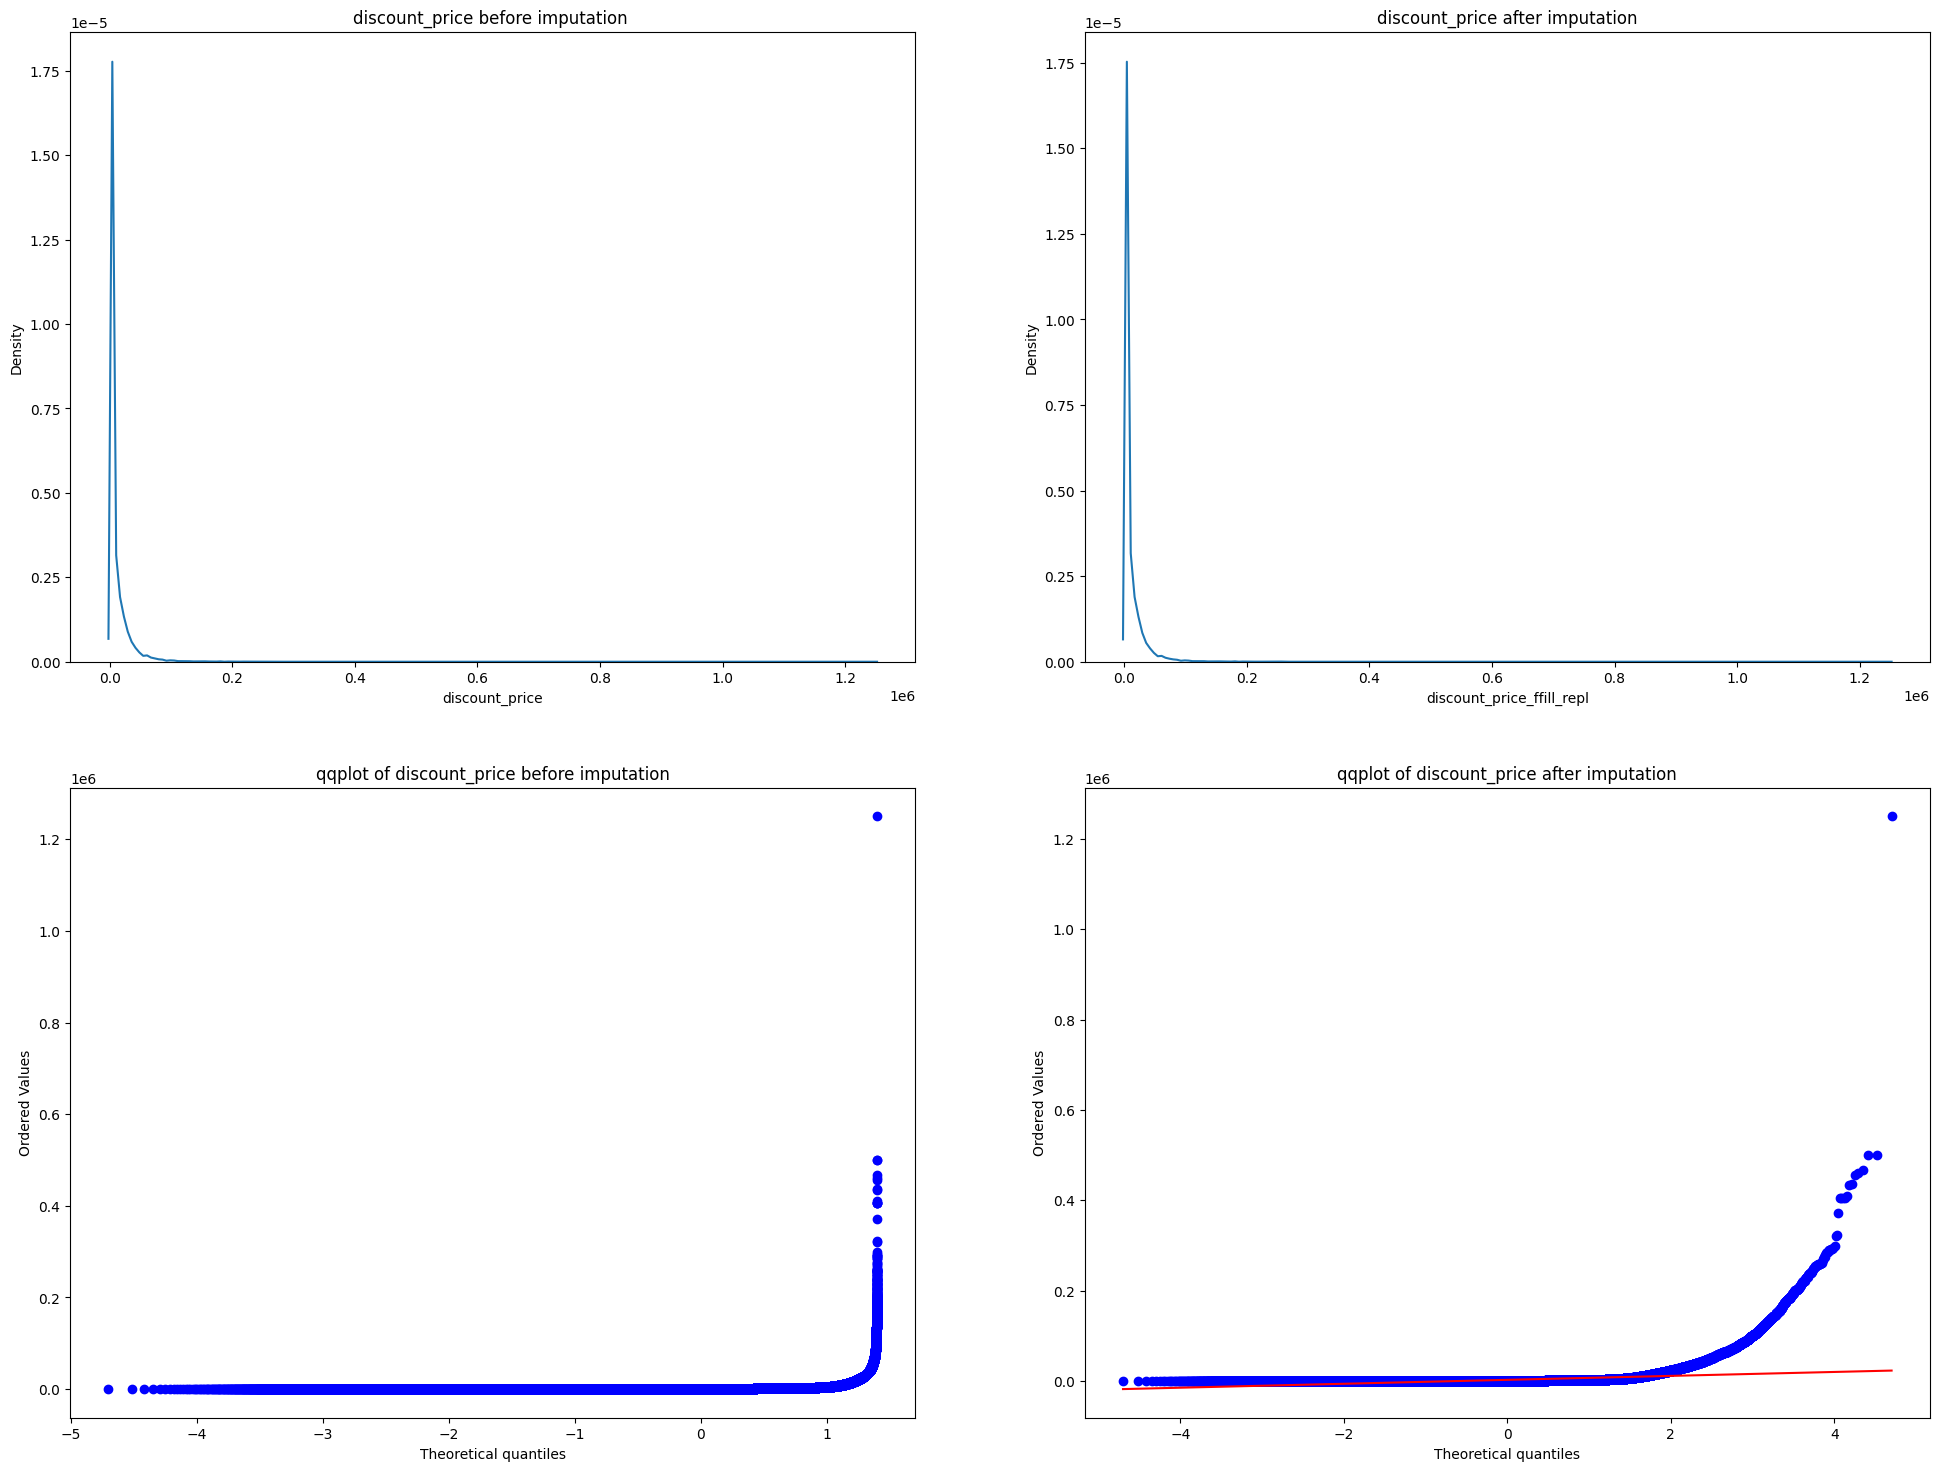






 ---------------------------------------- 5) BACKWARD FILLING METHOD ---------------------------------------- 





discount_price statistics before imputation:
 count     490422.00
mean        2623.16
std         9458.20
min            8.00
25%          389.00
50%          679.00
75%         1399.00
max      1249990.00
Name: discount_price, dtype: float64
discount_price_bfill_repl statistics after imputation:
 count     533772.00
mean        2593.77
std         9245.94
min            8.00
25%          396.00
50%          694.00
75%         1449.00
max      1249990.00
Name: discount_price_bfill_repl, dtype: float64
--------------------------------------------------
discount_price skewness before imputation:
 16.7
discount_price_bfill_repl skewness after imputation:
 16.96
--------------------------------------------------


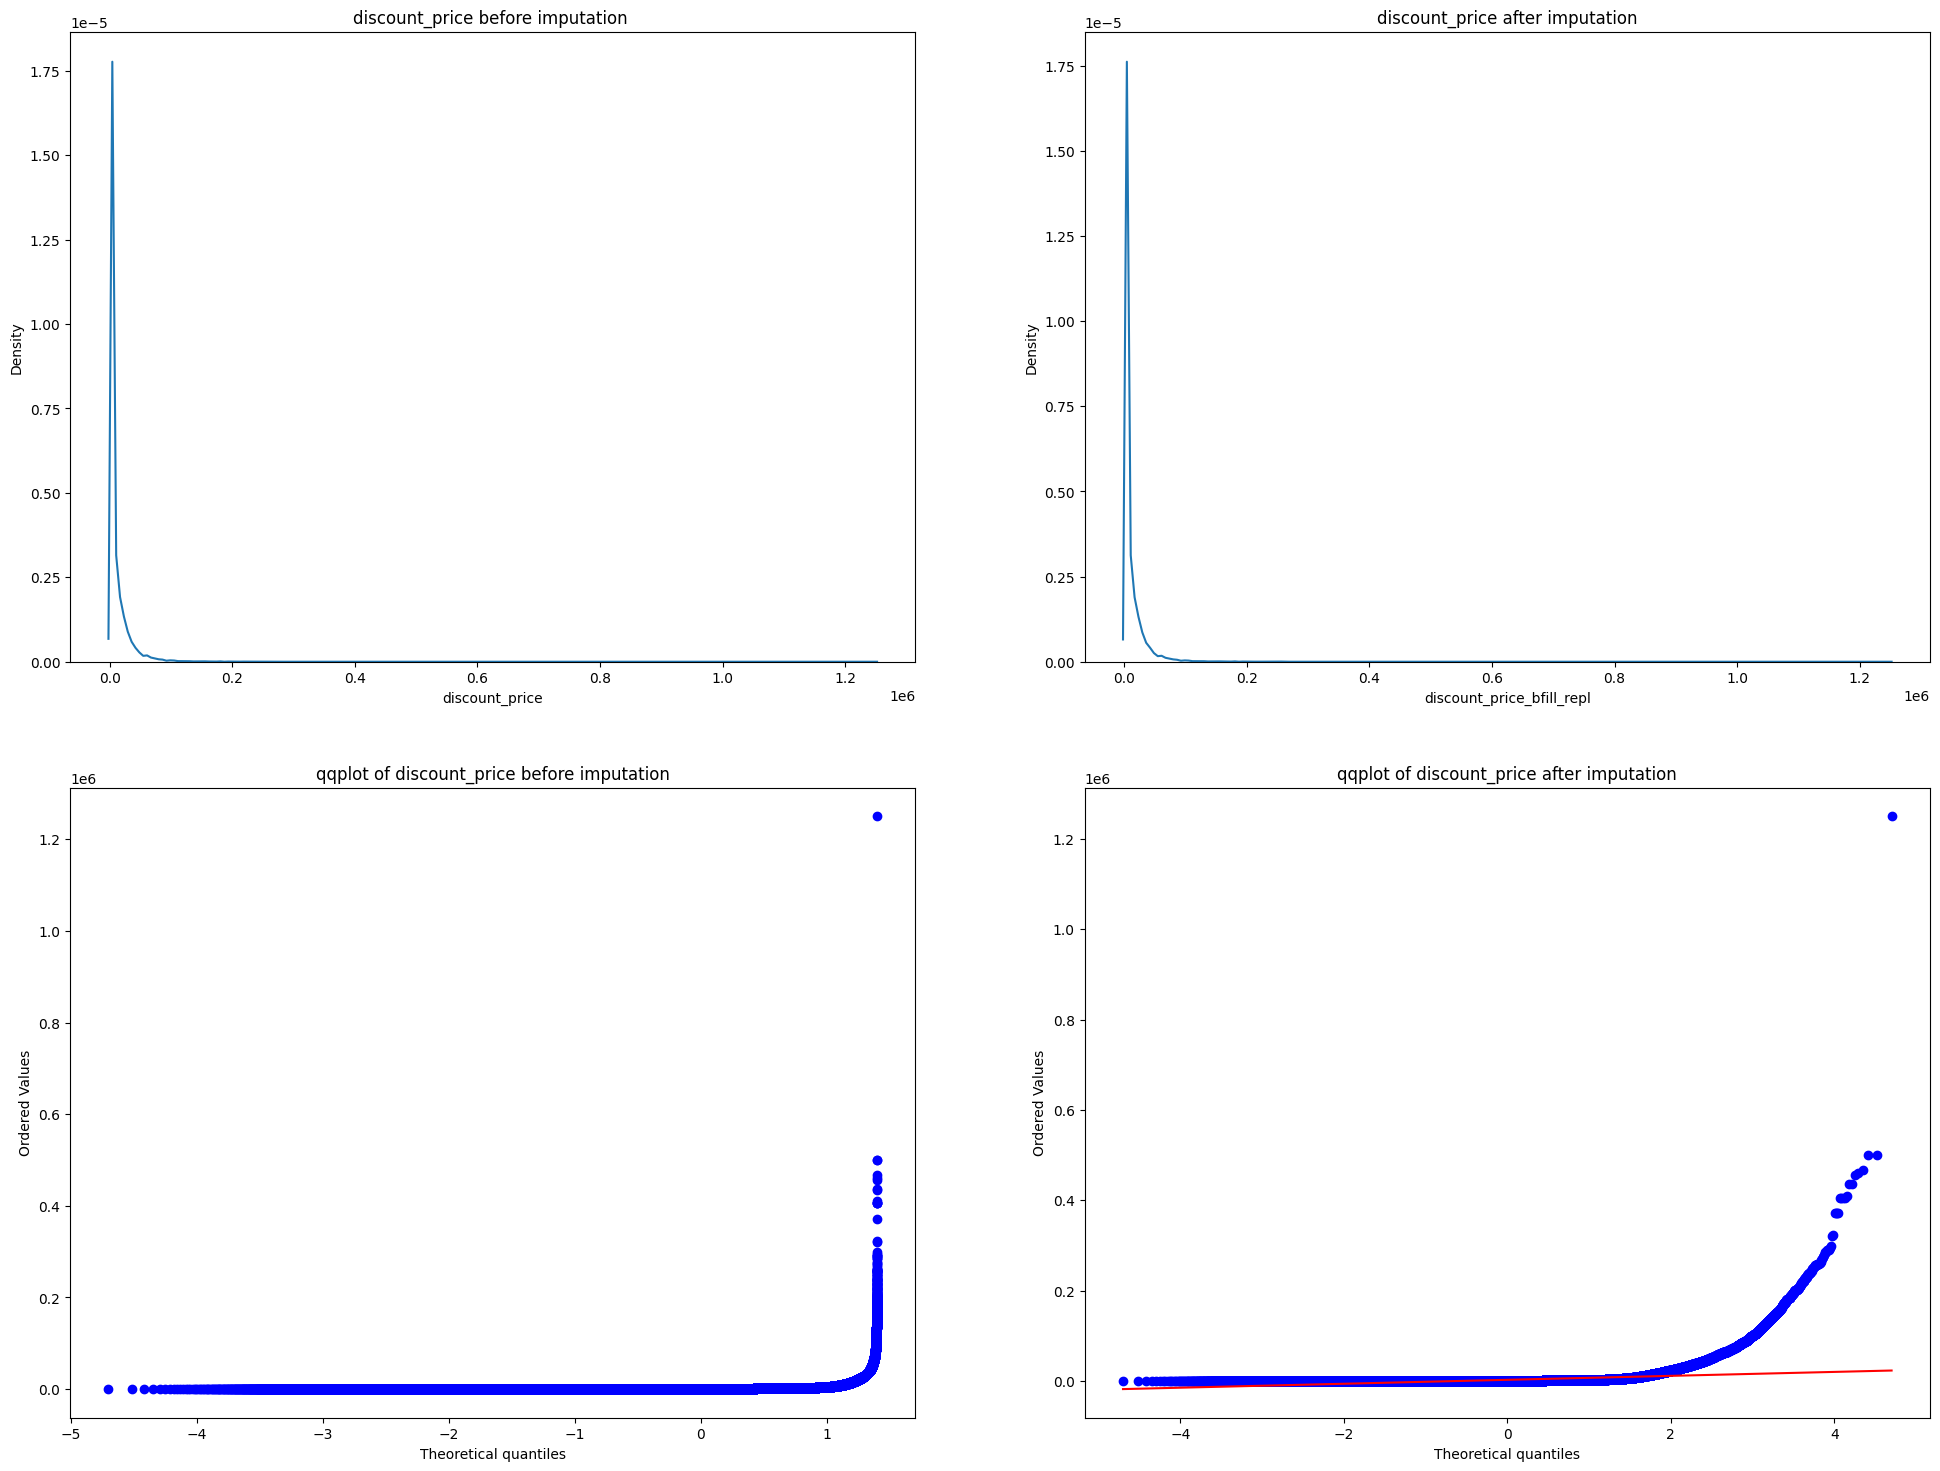

In [62]:
apply_all_strategies(data, 'discount_price',data_imputed)

>
<font color="grey">
<h4>
 
From above we can clearly see that it is 'forward fill' strategy that is bringing least change in statistics and characteristics of our data.  
Therefore, we impute nulls in discount_price column by 'ffill' method.

</h4>
</font>


### Lets impute missing values in our column by appropriate strategy found so far.

In [63]:
data['no_of_ratings']=data_imputed['no_of_ratings_ffill_repl']

In [64]:
data['ratings']=data_imputed['ratings_ffill_repl']

In [65]:
data['discount_price']=data_imputed['discount_price_ffill_repl']

In [66]:
data.shape

(533772, 8)

In [67]:
data.sample(10)

index                                               name  \
520493  538150  THE BLAZZE 1358 Women's Girl's Solid V Neck Dr...   
476826  492860       Duke Stardust Men Half Sleeve Cotton T-Shirt   
338584  349651  Cello Duro Tuff Steel Series Sprint Flask | Ho...   
188014  192106  Del Mondo Genuine Patent Leather Black/Bordo C...   
41186    41834  NEORAH – Pen Pouch Green Pencil Bag Stationery...   
317905  328779  Earthmine Gems Five Face Rudraksh Thread पांच ...   
207295  214799  ZOUK Tote Bags for Women - Handmade Bags for D...   
407432  420791                     Levi's Men's Regular Fit Shirt   
274571  283572               NOXXI Men's Solid V-Neck Thermal TOP   
60081    60983  SanDisk 32GB High Endurance Video MicroSDHC Ca...   

              main_category           sub_category  ratings  no_of_ratings  \
520493     women's clothing           western wear      2.6            4.0   
476826       men's clothing       t-shirts & polos      3.4            3.0   
338584       home & kitchen  uncommon mix category      3.9           26.0   
188014          men's shoes               footwear      5.0            1.0   
41186           accessories                   bags      4.4           43.0   
317905          accessories              jewellery      4.0            1.0   
207295          accessories                   bags      4.2          428.0   
407432       men's clothing                 shirts      3.8            8.0   
274571       men's clothing              Innerwear      5.0            1.0   
60081   tv, audio & cameras            Electronics      4.6        39541.0   

        discount_price  actual_price  
520493           299.0         999.0  
476826           507.0         845.0  
338584           884.3        1049.0  
188014          3374.0        5190.0  
41186            799.0        1199.0  
317905          1419.0        4840.0  
207295          1499.0        4140.0  
407432           920.0        2299.0  
274571           349.0         499.0  
60081            658.0        1050.0

In [68]:
data=data.iloc[:,1:]
data.sample(10)

name  \
519868                        Pepe Jeans Women Blue Jeans   
166691  Sparx Men's Fashionable & Trending sandals SS-...   
257621  AC 100-240V Drilling Polishing Machine Wood Pl...   
40305   K London Real Leather Men Women Waist Bag Fann...   
163622  EXCLUZO Astronomical Ball Ring Foldable Cosmic...   
256137  PIXEL HOME Cotton Multi-Purpose Superior Kitch...   
197789   PC Jeweller 22k (916) Yellow Gold Ring for Women   
394194  Lenofocus Small Spy Camera 1080P Full HD Hidde...   
166703  Denill Comfortable Fashion Sandal Collection F...   
125996  Nestle Resource Hepatic 400g Pet Jar Pack (Van...   

              main_category                sub_category  ratings  \
519868     women's clothing                western wear      3.5   
166691        women's shoes                    footwear      5.0   
257621       home & kitchen       uncommon mix category      2.9   
40305           accessories                        bags      4.0   
163622          accessories  fashion & silver jewellery      3.0   
256137       home & kitchen            Home and Kitchen      4.3   
197789          accessories    gold & diamond jewellery      5.0   
394194  tv, audio & cameras                 Electronics      3.7   
166703        women's shoes                    footwear      3.6   
125996      beauty & health       uncommon mix category      4.2   

        no_of_ratings  discount_price  actual_price  
519868           26.0         1429.00        2599.0  
166691            1.0          879.12         999.0  
257621          219.0          740.00        1299.0  
40305            92.0          330.00        1800.0  
163622            2.0          686.00        1372.0  
256137          658.0          319.00         599.0  
197789            1.0        24167.00       28626.0  
394194          847.0          500.00        7127.0  
166703           67.0          449.00        1499.0  
125996          230.0          899.00        1099.0

In [69]:
data.isnull().sum()

name              0
main_category     0
sub_category      0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

# <i> Let's handle outliers</i>

In [70]:
def handle_outlier(data,column):
    sns.boxplot(data[column])
    plt.title("outlier detection")
    plt.show()
    q1=data[column].quantile(0.25)
    q3=data[column].quantile(0.75)
    iqr=q3-q1
    upper_limit= q3+1.5*iqr
    lower_limit=q1-1.5*iqr

    data[column]=np.where(
        data[column]>upper_limit, upper_limit, np.where(data[column]<lower_limit,lower_limit,data[column])
    )
    
    sns.boxplot(data[column])
    plt.title("outliers removed") 
    plt.show()

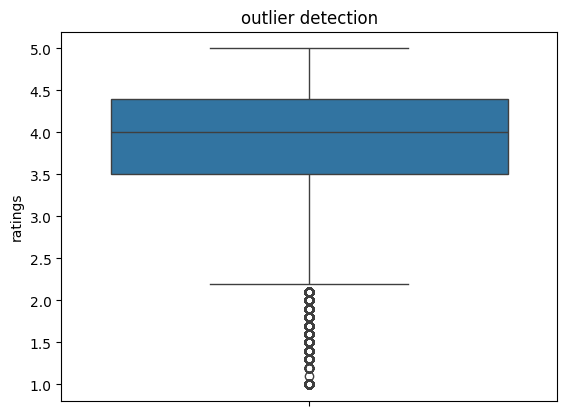

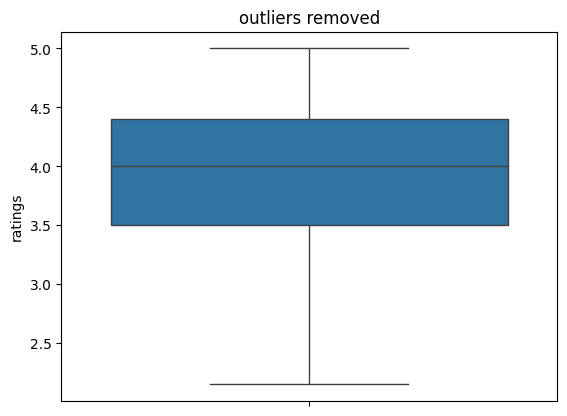

In [71]:
handle_outlier(data,'ratings')

In [72]:
#handle_outlier(data,'no_of_ratings')

In [73]:
#handle_outlier(data,'discount_price')

##### Clearly 75% and max value for no_of_ratings  and discount_price has too much difference so we should not remove our outliers for these features.
##### Moreover, outliers of these columns are important from analysis point of view. 

# <div style="background-color: #FFEFD5">Our dataset is now ready for analysis. Let's jump into analytics and visualization part.</div>

## <div style="background-color: lightgray"><b><i><font face="Courier New"> <u> 1) Descriptive Statistics</u> </font></b></i></div>

In [74]:
np.round(data.describe(),2)

ratings  no_of_ratings  discount_price  actual_price
count  533772.00      533772.00       533772.00  5.337720e+05
mean        3.88         646.44         2588.71  2.311128e+04
std         0.76        7306.82         9209.74  1.355082e+07
min         2.15           1.00            8.00  0.000000e+00
25%         3.50           2.00          396.00  9.900000e+02
50%         4.00          12.00          693.00  1.599000e+03
75%         4.40          92.00         1449.00  2.999000e+03
max         5.00      589547.00      1249990.00  9.900000e+09


## <div style="background-color: lightgray"><b><i><font face="Courier New">  2) Discount Analysis </font></b></i></div>

#### 2a) Overall Average discount

In [75]:
average_discount=np.mean(data['actual_price']-data['discount_price'])

In [76]:
print("Average discount given is ",np.round(average_discount,3))

Average discount given is  20522.574


#### 2b) Average discount across categories

In [77]:

# Calculate the discount amount and percentage
data['discount_amount'] = data['actual_price'] - data['discount_price']
data['discount_percentage'] = (data['discount_amount'] / data['actual_price']) * 100

In [78]:
data.loc[data['discount_percentage']==-np.inf]

name        main_category  \
244806  Learning The Basics Of Home Theater  tv, audio & cameras   
362968                        The Sugar Men               stores   
429329  Learning The Basics Of Home Theater  tv, audio & cameras   

                 sub_category  ratings  no_of_ratings  discount_price  \
244806  uncommon mix category      3.8           21.0          4159.0   
362968          men's fashion      4.3         4485.0           299.0   
429329            Electronics      3.8           21.0         19990.0   

        actual_price  discount_amount  discount_percentage  
244806           0.0          -4159.0                 -inf  
362968           0.0           -299.0                 -inf  
429329           0.0         -19990.0                 -inf

In [79]:
#note that since actual_price is zero.
#discount_percentage is getting infinity

In [80]:
# Handle infinity
data['discount_percentage'] = data['discount_percentage'].replace([np.inf, -np.inf], 0)
# discount_percentage below 0 are set to 0. 
data['discount_percentage'] = data['discount_percentage'].clip(lower=0)


In [81]:
discount_analysis = data.groupby(['main_category', 'sub_category']).agg({
    'discount_amount': 'mean',
    'discount_percentage': 'mean'
}).round(2).sort_values(by=['discount_percentage'])

In [82]:
discount_analysis

discount_amount  \
main_category           sub_category                                  
home, kitchen, pets     uncommon mix category                924.35   
grocery & gourmet foods uncommon mix category                129.26   
accessories             gold & diamond jewellery            8524.60   
beauty & health         Home and Kitchen                     289.49   
appliances              uncommon mix category               8702.96   
beauty & health         uncommon mix category                476.47   
kids' fashion           footwear                             565.85   
pet supplies            uncommon mix category                416.84   
toys & baby products    Home and Kitchen                     424.08   
men's clothing          Innerwear                            411.95   
industrial supplies     test, measure & inspect             1440.35   
toys & baby products    uncommon mix category                927.88   
tv, audio & cameras     uncommon mix category              15962.42   
music                   uncommon mix category               1714.34   
appliances              Electronics                         2351.28   
beauty & health         Cosmetics                            384.27   
women's shoes           uncommon mix category               1326.18   
men's clothing          jeans                               1278.56   
industrial supplies     uncommon mix category                982.56   
men's shoes             footwear                            2034.01   
car & motorbike         car accessories                      803.57   
women's shoes           footwear                             899.53   
car & motorbike         uncommon mix category                800.19   
bags & luggage          uncommon mix category               3789.26   
home & kitchen          uncommon mix category             842492.69   
kids' fashion           Kids                                 730.58   
sports & fitness        uncommon mix category               6396.95   
accessories             uncommon mix category               1894.15   
stores                  amazon fashion                      1039.63   
bags & luggage          bags                                2171.44   
tv, audio & cameras     Electronics                         2179.63   
home & kitchen          Home and Kitchen                    1524.57   
kids' fashion           bags                                1505.24   
women's clothing        Innerwear                            597.71   
stores                  the designer boutique               2801.32   
men's clothing          shirts                              1094.16   
bags & luggage          travel accessories                   590.05   
men's clothing          t-shirts & polos                     740.85   
stores                  men's fashion                       1370.02   
accessories             bags                                1484.17   
bags & luggage          wallets                             1151.23   
accessories             watches                             1948.60   
stores                  Sports                              9320.73   
women's clothing        western wear                         986.44   
accessories             jewellery                           2146.30   
stores                  women's fashion                     1349.41   
women's clothing        clothing                            1182.75   
stores                  uncommon mix category               2842.67   
women's clothing        ethnic wear                         1723.78   
accessories             fashion & silver jewellery          1474.71   

                                                    discount_percentage  
main_category           sub_category                                     
home, kitchen, pets     uncommon mix category                     20.09  
grocery & gourmet foods uncommon mix category                     22.00  
accessories             gold & diamond jewellery               

>
##### minimum discount of 20.09% is given to "home, kitchen, pets" section, specifically to uncommon category

>
##### maximum discount of 64.76% is given to "accessories" section specifically to "fashion & silver jewellery"

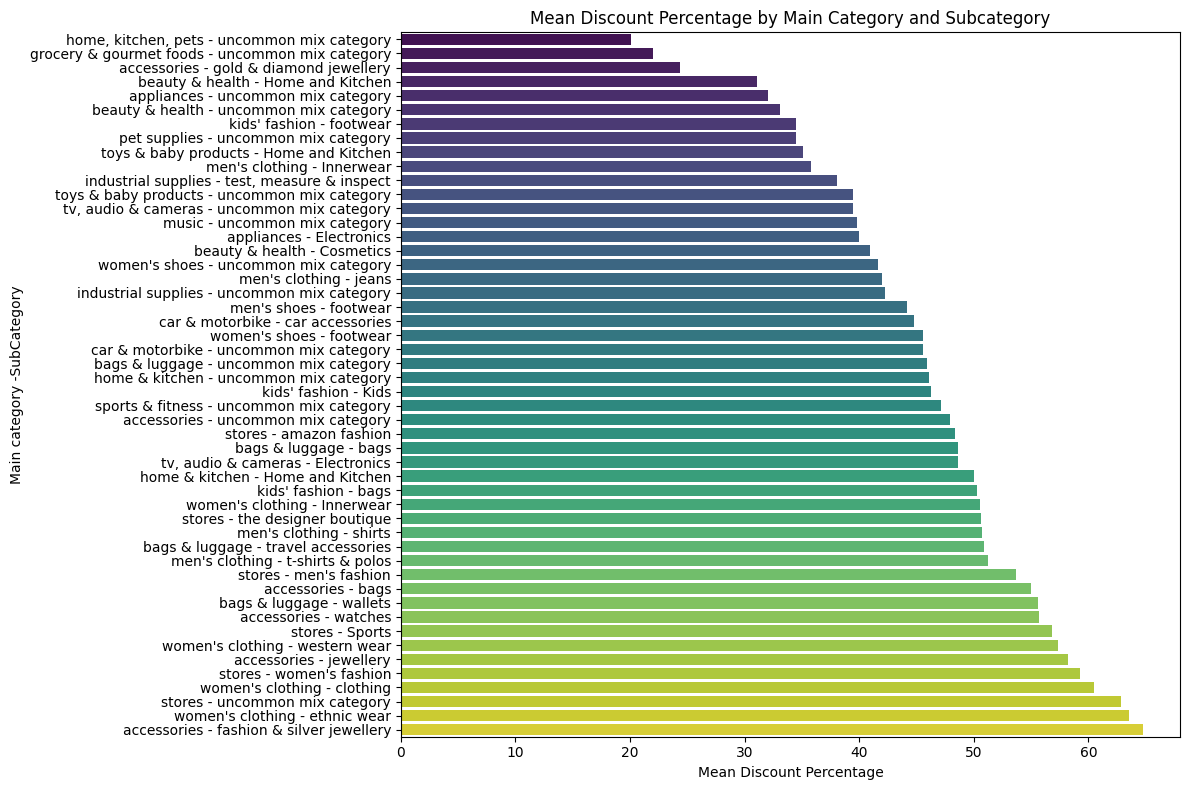

In [83]:

# Reset index for easier plotting
discount_analysis_reset = discount_analysis.reset_index()

# Plotting using seaborn barplot
plt.figure(figsize=(12, 8))
bars=sns.barplot(x=discount_analysis_reset['discount_percentage'], y=discount_analysis_reset['main_category'] + ' - ' + discount_analysis_reset['sub_category'],hue=discount_analysis_reset['main_category'] + ' - ' + discount_analysis_reset['sub_category']
            ,palette='viridis')

plt.title('Mean Discount Percentage by Main Category and Subcategory')
plt.xlabel('Mean Discount Percentage')
plt.ylabel('Main category -SubCategory')
plt.tight_layout()
plt.show()

#### 2c) Correlation between 'discount_price' and 'actual_price'

In [84]:
# Calculate the correlation between 'discount_price' and 'actual_price'
correlation = data['discount_price'].corr(data['actual_price'])

# Print the result
print(f"The correlation between discount_price and actual_price is: {correlation}")

The correlation between discount_price and actual_price is: 0.0005795132974428401


<Axes: >

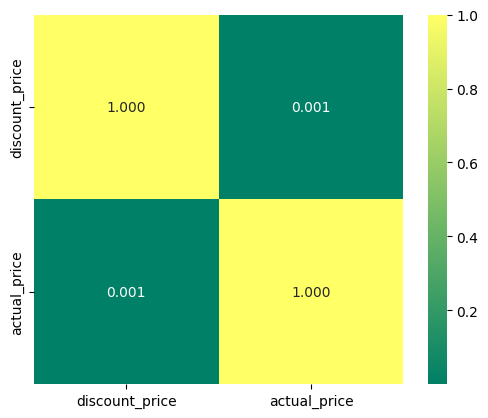

In [85]:
corr_mat=data[['discount_price' ,'actual_price']].corr()
sns.heatmap(corr_mat,annot=True, cmap='summer', fmt='.3f', square=True)

>
##### This shows that correlation between discount_price and actual_price is approximately zero.
##### Thus discount_price and actual_price are independent of each other

## <div style="background-color: lightgray"><b><i><font face="Courier New">  3) Ratings Analysis </font></b></i></div>

#### a) Calculate the average rating for each main_category .

In [86]:
main_category_grouped=data.groupby('main_category')
main_category_avg_rating=np.round(main_category_grouped['ratings'].mean(),2)
main_category_avg_rating=main_category_avg_rating.sort_values(ascending=True)
main_category_avg_rating

main_category
home, kitchen, pets        3.36
men's shoes                3.74
kids' fashion              3.75
car & motorbike            3.76
women's shoes              3.77
women's clothing           3.79
appliances                 3.85
sports & fitness           3.85
men's clothing             3.88
tv, audio & cameras        3.90
industrial supplies        3.94
stores                     3.95
bags & luggage             3.96
accessories                3.97
home & kitchen             3.98
music                      3.99
beauty & health            4.00
pet supplies               4.05
toys & baby products       4.06
grocery & gourmet foods    4.07
Name: ratings, dtype: float64

#### b) Identify category with the highest and lowest ratings.

In [87]:
# Find the highest and least rated categories

highest_rated_category = main_category_avg_rating.idxmax()
highest_rating = main_category_avg_rating.max()

least_rated_category = main_category_avg_rating.idxmin()
least_rating = main_category_avg_rating.min()

# Print the results
print(f"Highest rated category: '{highest_rated_category}' with a rating of {highest_rating}")
print(f"Least rated category: '{least_rated_category}' with a rating of {least_rating}")

Highest rated category: 'grocery & gourmet foods' with a rating of 4.07
Least rated category: 'home, kitchen, pets' with a rating of 3.36


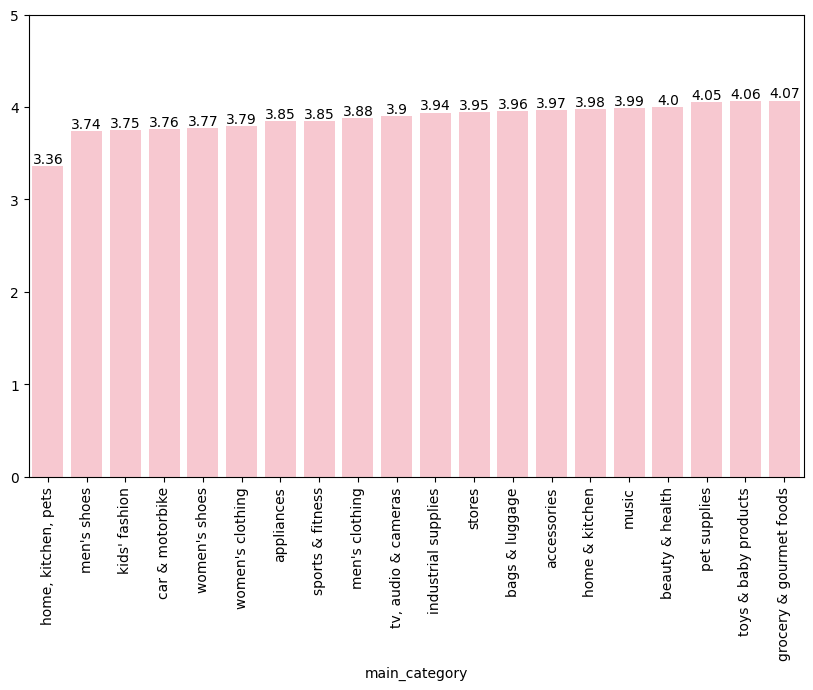

In [88]:
# Plotting
plt.figure(figsize=(10, 6))
bars=sns.barplot(x=main_category_avg_rating.index,y=main_category_avg_rating.values,color='pink')
plt.bar_label(bars.containers[0], labels=main_category_avg_rating,fontsize=10,color='black')
plt.xticks(rotation=90)
plt.ylim(0,5)
plt.show()

>

##### least rated category- "home, kitchen, pets" 

>
#####  Clearly,  highest rated category-"grocery & gourmet foods"
        

#### c) Calculate the average rating for each main_category and sub_category 

In [89]:
# Group by 'main_category' and 'sub_category' and calculate the mean ratings
grouped = data.groupby(['main_category', 'sub_category'])
avg_ratings = np.round(grouped['ratings'].mean(), 2)
# Print the result
print(avg_ratings)

main_category            sub_category              
accessories              bags                          3.98
                         fashion & silver jewellery    3.91
                         gold & diamond jewellery      4.07
                         jewellery                     3.86
                         uncommon mix category         4.13
                         watches                       3.99
appliances               Electronics                   3.86
                         uncommon mix category         3.73
bags & luggage           bags                          3.87
                         travel accessories            3.93
                         uncommon mix category         4.03
                         wallets                       4.10
beauty & health          Cosmetics                     3.94
                         Home and Kitchen              4.07
                         uncommon mix category         4.00
car & motorbike          car accessories        

In [90]:
sub_category_grouped=data.groupby('sub_category')
sub_category_avg_rating=np.round(sub_category_grouped['ratings'].mean(),2)
sub_category_avg_rating=sub_category_avg_rating.sort_values(ascending=True)
sub_category_avg_rating

sub_category
Kids                          3.60
footwear                      3.75
ethnic wear                   3.75
western wear                  3.79
car accessories               3.80
shirts                        3.80
clothing                      3.81
Innerwear                     3.83
jewellery                     3.86
the designer boutique         3.87
t-shirts & polos              3.88
test, measure & inspect       3.89
men's fashion                 3.89
Electronics                   3.89
fashion & silver jewellery    3.91
women's fashion               3.91
uncommon mix category         3.93
travel accessories            3.93
Cosmetics                     3.94
jeans                         3.95
bags                          3.98
watches                       3.99
amazon fashion                4.02
Home and Kitchen              4.03
gold & diamond jewellery      4.07
wallets                       4.10
Sports                        4.11
Name: ratings, dtype: float64

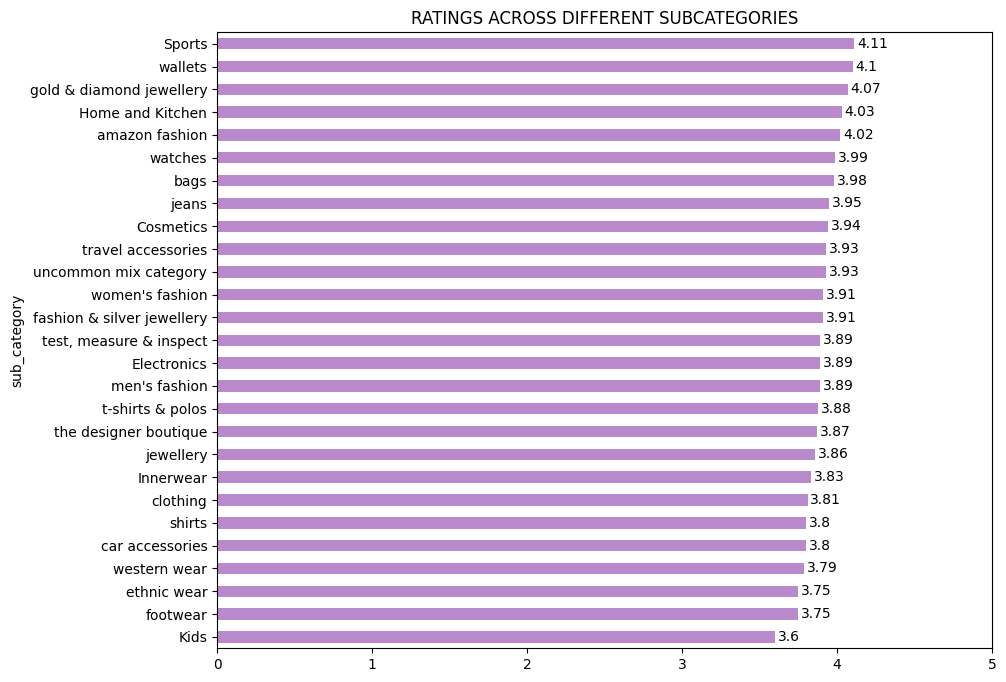

In [91]:
bars=sub_category_avg_rating.sort_values().plot(kind='barh',figsize=(10,8),title="RATINGS ACROSS DIFFERENT SUBCATEGORIES",color='#9B59B6',alpha=0.7)
plt.bar_label(bars.containers[0], labels=sub_category_avg_rating, padding=2)
plt.xlim(0,5)
plt.show()

##### "Kids" is least rated subcategory and "Sports" is highly rated

##### It is important to note that every category has got avg rating >3.5

#### 3 d) the relationship between ratings and no._of_ratings.

In [92]:
correlation = data['ratings'].corr(data['no_of_ratings'])
print(f"The correlation between ratings and no._of_ratings is: {correlation:.2f}")

The correlation between ratings and no._of_ratings is: 0.03


##### Correlation of 0.03 suggests that knowing the rating of a product does not give useful information about the number of ratings it has received.

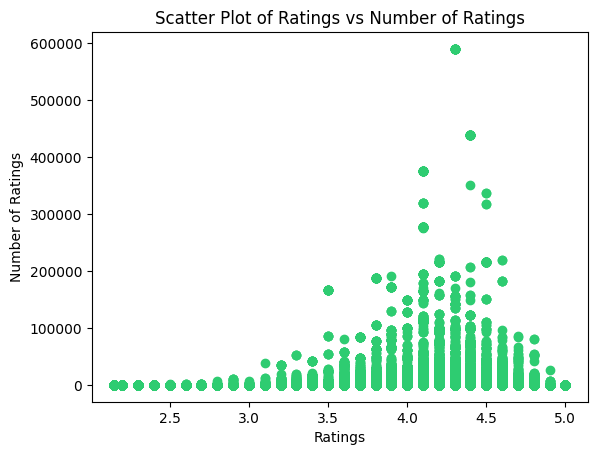

In [93]:
import matplotlib.pyplot as plt

plt.scatter(data['ratings'], data['no_of_ratings'],c='#2ECC71')
plt.title('Scatter Plot of Ratings vs Number of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Number of Ratings')
plt.show()

## <div style="background-color: lightgray"><b><i><font face="Courier New"> 4) Product Analysis </font></b></i></div>

#### 4 a) Number Of Products in different Categories

In [94]:
data_group = data.groupby(['main_category']).agg({'name':'count'}).reset_index()
data_group.columns = ['main_category', 'No_of_products']

# Print the result
print(data_group)


              main_category  No_of_products
0               accessories          111171
1                appliances           31326
2            bags & luggage            9982
3           beauty & health            9908
4           car & motorbike            6987
5   grocery & gourmet foods            3282
6            home & kitchen           14473
7       home, kitchen, pets              17
8       industrial supplies            4010
9             kids' fashion           13206
10           men's clothing           73778
11              men's shoes           54863
12                    music            1038
13             pet supplies            1619
14         sports & fitness           12253
15                   stores           32335
16     toys & baby products            6098
17      tv, audio & cameras           66357
18         women's clothing           75812
19            women's shoes            5257


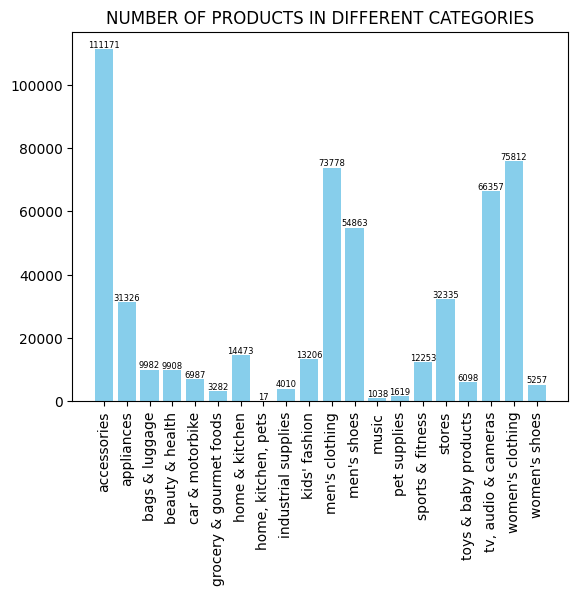

In [95]:
bars=plt.bar(data_group['main_category'],data_group['No_of_products'],color='skyblue',alpha=1)
plt.bar_label(bars, label=data_group['No_of_products'],label_type='edge',fontsize=6,color='black')
plt.xticks(rotation=90)
plt.title("NUMBER OF PRODUCTS IN DIFFERENT CATEGORIES")
plt.show()

#### 4b) Products with the highest number of ratings (TOP 10 PRODUCTS)

In [96]:
data_gr=data.groupby(['name']).agg({'no_of_ratings': 'sum'}).sort_values(by='no_of_ratings',ascending=False)

# Assign ranks, ensuring that products with the same number of ratings get the same rank
data_gr['rank'] = data_gr['no_of_ratings'].rank(method='dense', ascending=False)

top_n = 10
top_products = data_gr[data_gr['rank'] <= top_n]
top_products.columns=['no_of_ratings','rank']

In [97]:
print(top_products)

                                                    no_of_ratings  rank
name                                                                   
Amazon Basics High-Speed HDMI Cable - 10 Feet (...      1750606.0   1.0
Amazon Basics Flexible Premium HDMI Cable (Blac...      1750606.0   1.0
Amazon Basics High-Speed HDMI Cable, 6 Feet (2-...      1750606.0   1.0
Amazon Basics High-Speed HDMI Cable, 6 Feet - S...      1750606.0   1.0
Amazon Basics High-Speed HDMI Cable - 10 Feet (...      1312955.0   2.0
Amazon Basics High-Speed HDMI Cable, 3 Feet (Bl...      1312955.0   2.0
JBL Go 3, Wireless Ultra Portable Bluetooth Spe...      1224748.0   3.0
SanDisk 400GB Class 10 MicroSD Card (SDSQUAR-40...      1179094.0   4.0
SanDisk 128GB Class 10 microSDXC Memory Card wi...      1179094.0   4.0
SanDisk 16GB Ultra MicroSDHC Memory Card (SDSQU...      1179094.0   4.0
SanDisk 256GB Class 10 MicroSD Card with Adapte...      1179094.0   4.0
SanDisk UHS-I A1 98Mbps 32GB Ultra MicroSD Memo...      1179094.

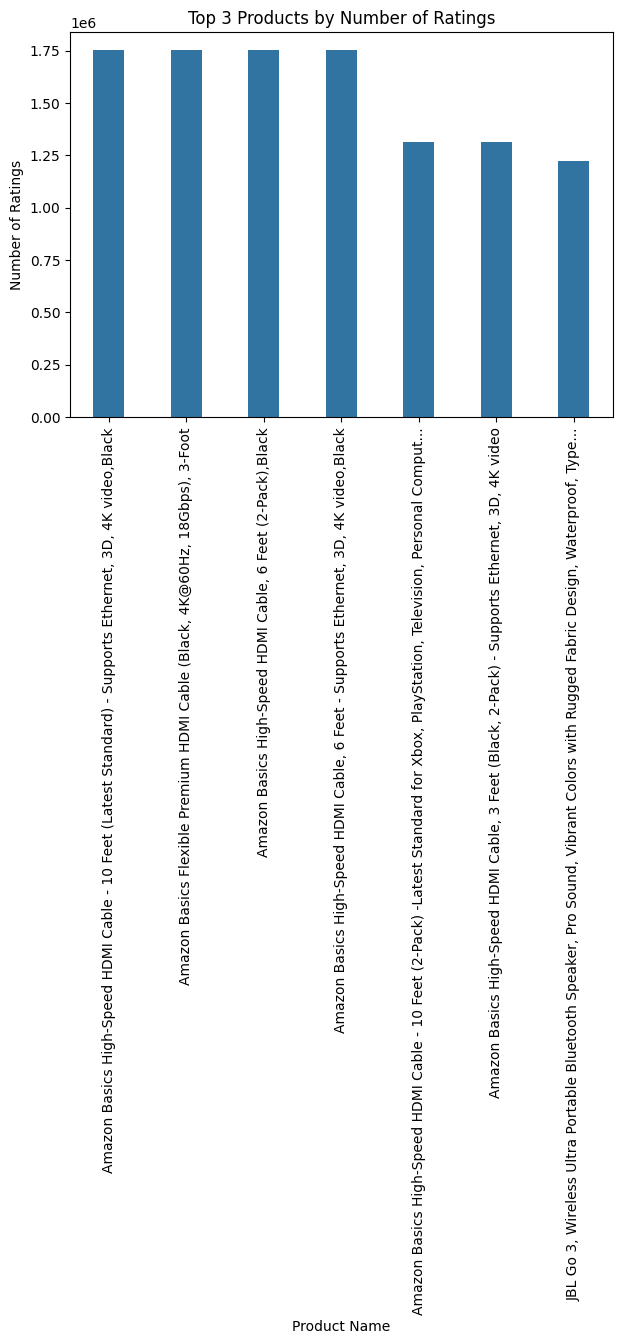

In [98]:
# plot top 3 products

top_3_products = data_gr[data_gr['rank'] <= 3]

# Plotting the top 3 products
plt.figure(figsize=(7, 5))
sns.barplot(x=top_3_products.index, y='no_of_ratings', data=top_3_products,width=0.4)
plt.title('Top 3 Products by Number of Ratings')
plt.xlabel('Product Name')
plt.ylabel('Number of Ratings')
                                                                                   
plt.xticks(rotation=90)

plt.show()

## <div style="background-color: lightgray"><b><i><font face="Courier New"> 5) Correlation Analysis </font></b></i></div>

In [99]:
correlation_matrix = data[['ratings', 'no_of_ratings', 'discount_price', 'actual_price']].corr()
print(correlation_matrix)

                 ratings  no_of_ratings  discount_price  actual_price
ratings         1.000000       0.033163        0.042672     -0.003091
no_of_ratings   0.033163       1.000000       -0.002269     -0.000122
discount_price  0.042672      -0.002269        1.000000      0.000580
actual_price   -0.003091      -0.000122        0.000580      1.000000


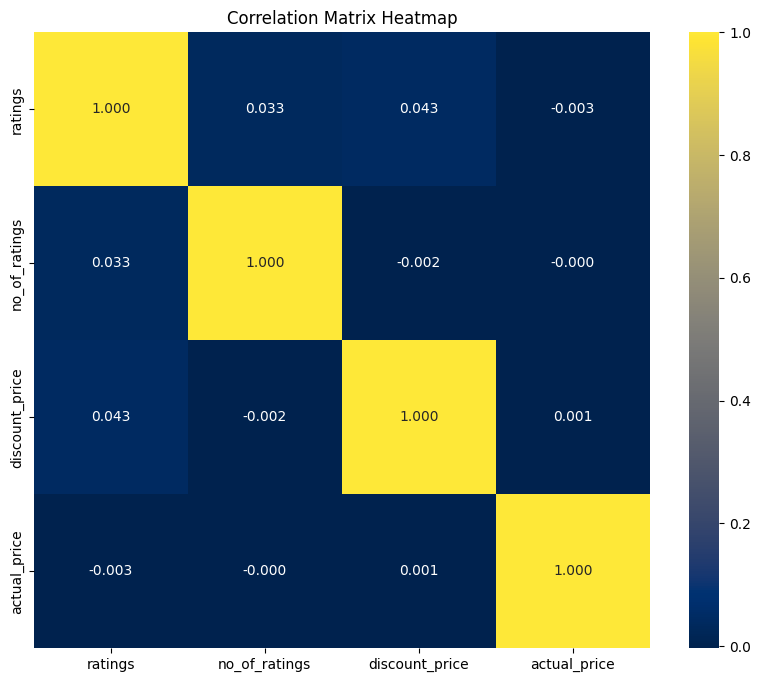

In [100]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt='.3f', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### Clearly these values are close to zero. Hence, there is no linear relationship between variables.

## <div style="background-color: lightgray"><b><i><font face="Courier New"> 6)Revenue Analysis </font></b></i></div>

##### We'll estimate minimum revenue based on no. of ratings.

##### It assumes that the number of ratings directly correlates with the number of sales.
##### This may not always be true, as not every customer who buys a product leaves a rating.
##### This approach can give an idea of minimum revenue generated.

#### 6a) Revenue across main_categories

In [101]:

# Calculate revenue
data['revenue'] = data['no_of_ratings'] * data['actual_price']


# Aggregating revenue by main_category
category_revenue = data.groupby('main_category')['revenue'].sum().sort_values(ascending=False)

print(category_revenue)

main_category
tv, audio & cameras        1.061160e+12
appliances                 1.342710e+11
stores                     7.018828e+10
men's shoes                5.699817e+10
accessories                5.465810e+10
home & kitchen             3.135233e+10
toys & baby products       2.821721e+10
women's clothing           2.687812e+10
men's clothing             2.046191e+10
beauty & health            1.372058e+10
bags & luggage             1.352163e+10
sports & fitness           9.945158e+09
kids' fashion              6.151306e+09
industrial supplies        5.241818e+09
car & motorbike            4.304382e+09
music                      2.732981e+09
grocery & gourmet foods    1.879931e+09
pet supplies               1.789090e+09
women's shoes              1.652184e+09
home, kitchen, pets        3.175160e+05
Name: revenue, dtype: float64


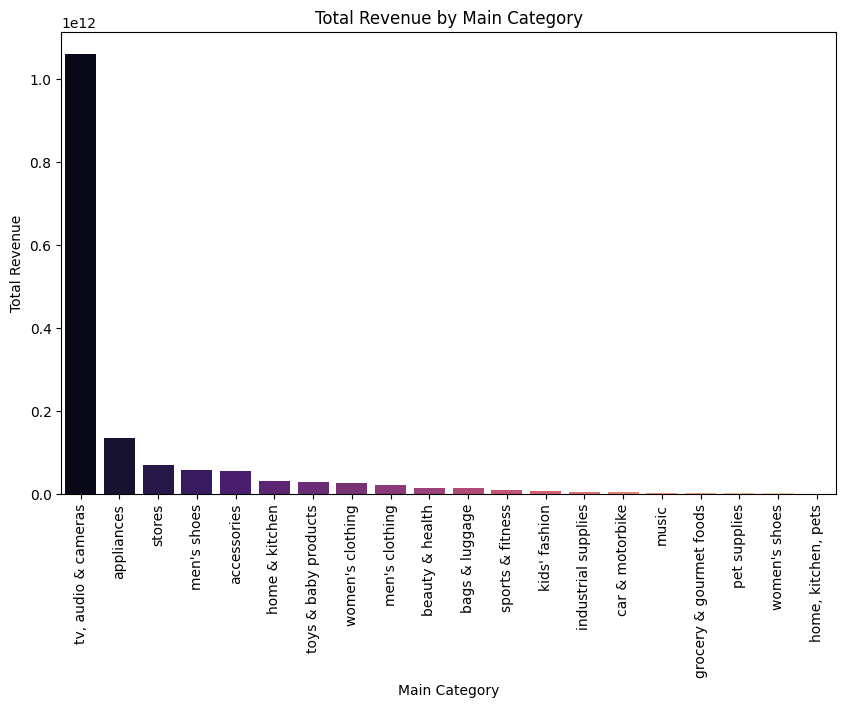

In [102]:

# Plotting revenue distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=category_revenue.index, y=category_revenue.values,hue=category_revenue.index,palette='magma')
plt.title('Total Revenue by Main Category')
plt.xlabel('Main Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=90)
plt.show()


#### 6b) Top 10 products by revenue

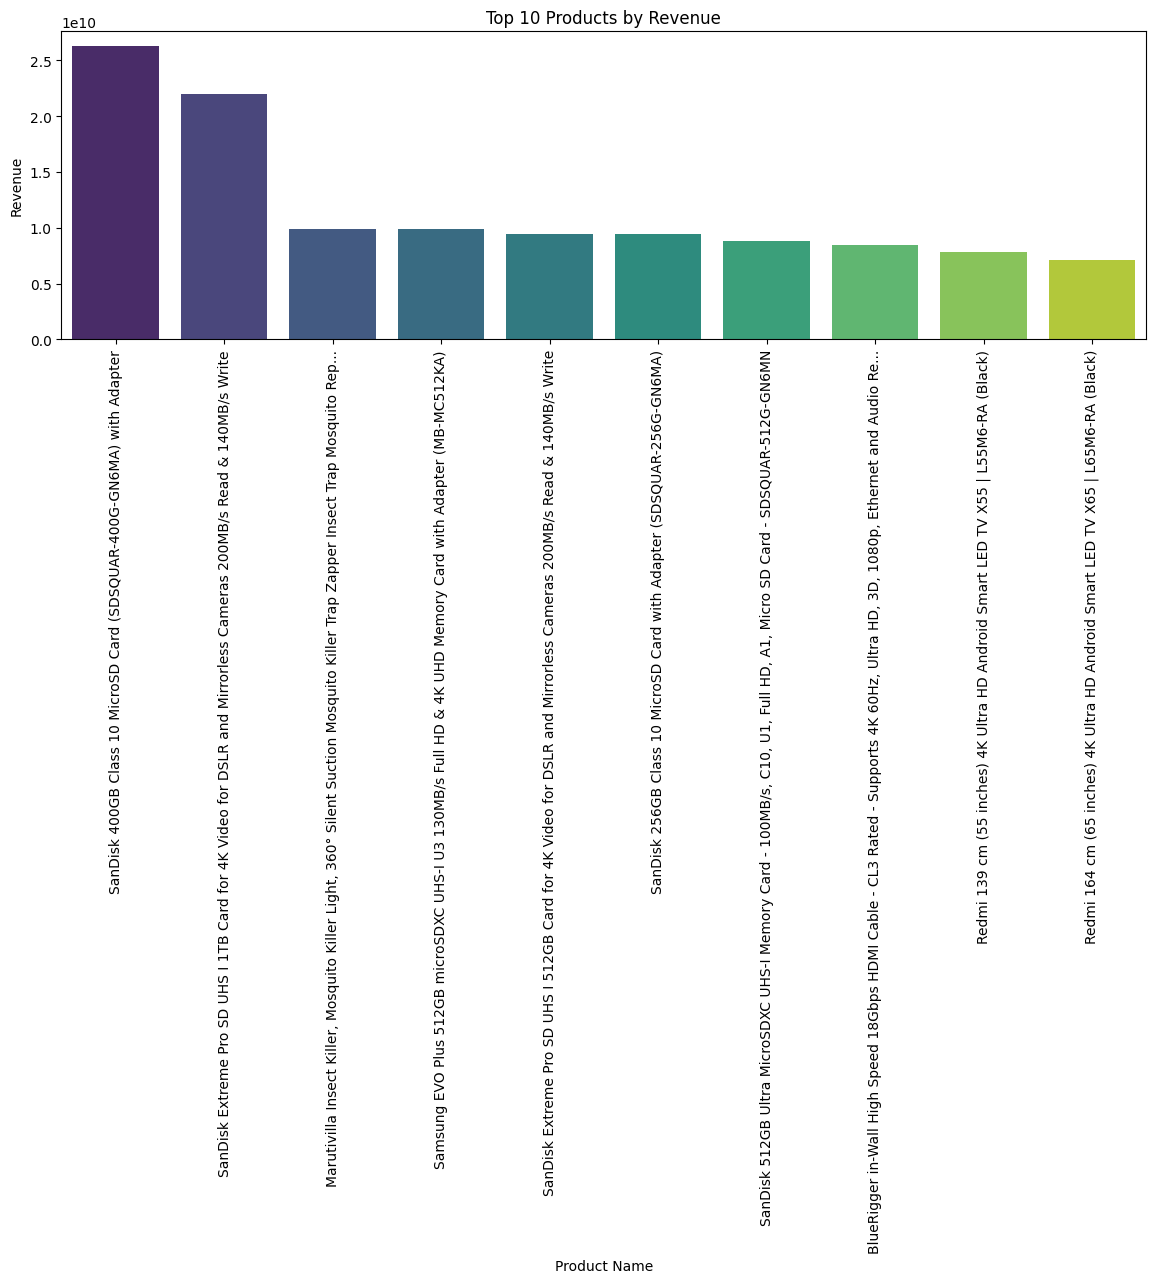

In [103]:
# Plotting top products by revenue
top_products = data.groupby(['name']).agg({'revenue':'sum'}).sort_values(by='revenue',ascending=False).head(10)


plt.figure(figsize=(14, 4))
sns.barplot(x='name', y='revenue',hue='name',data=top_products,palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()



## ***<font color="green">Thank you for taking the time to view my project.</font>***
## ***<font color="green">I hope you found the insights and analysis valuable :-) </font>*** 
